In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('polls.csv')

# Trump & Biden only
candidates = df.loc[:,'candidate_name'].unique()[0:2]
df = df[df['candidate_name'].isin(candidates)]

In [10]:
date_cols = ['start_date', 'end_date', 'election_date','created_at',]
df.loc[:,date_cols] = df.loc[:,date_cols].apply(pd.to_datetime)

In [11]:
df['diff'] = df.groupby('question_id')['pct'].diff(-1)

In [12]:
# separate out national polls
national_polls = df[df['state'].isnull()]
national_pollsters = national_polls['pollster'].unique()

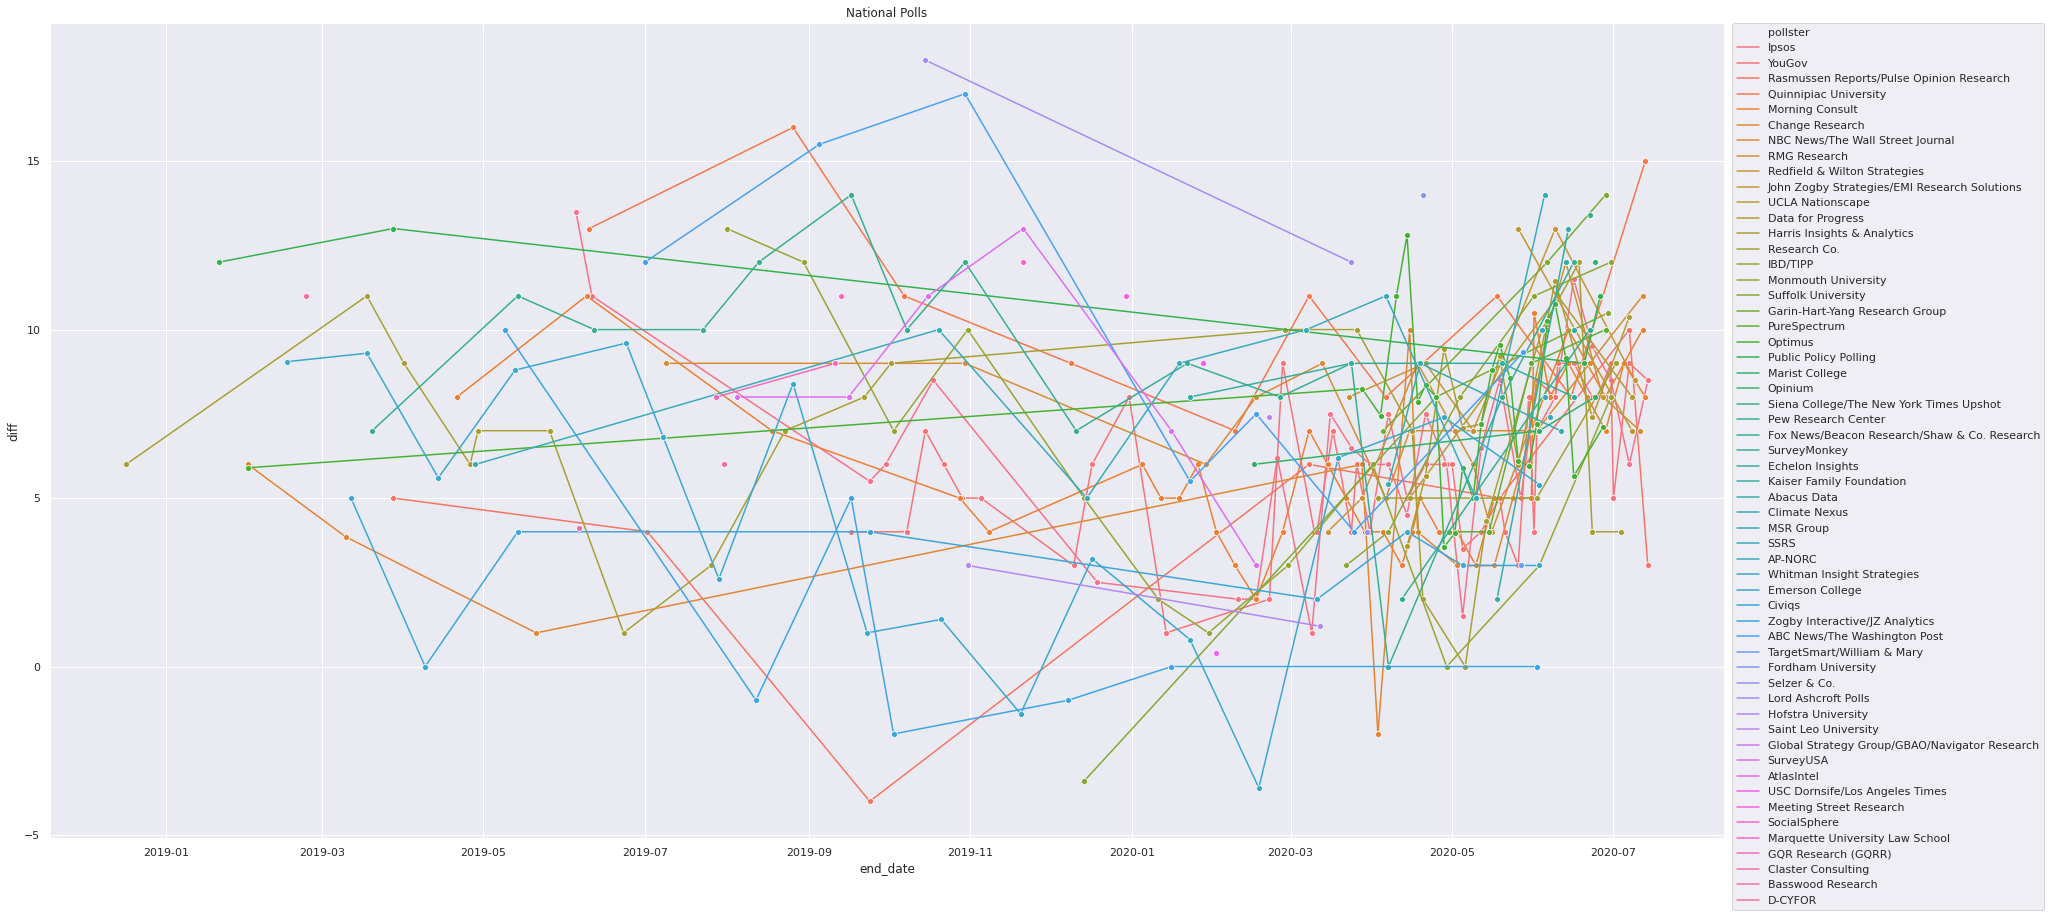

In [30]:
# All national polls
plt.figure(figsize=(30,15))
sns.set()
plot = sns.lineplot(x='end_date', y='diff', hue='pollster', ci=None, marker='o', data=national_polls).set_title("National Polls")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
fig = plot.get_figure()
fig.savefig('src/images/national/all.png')

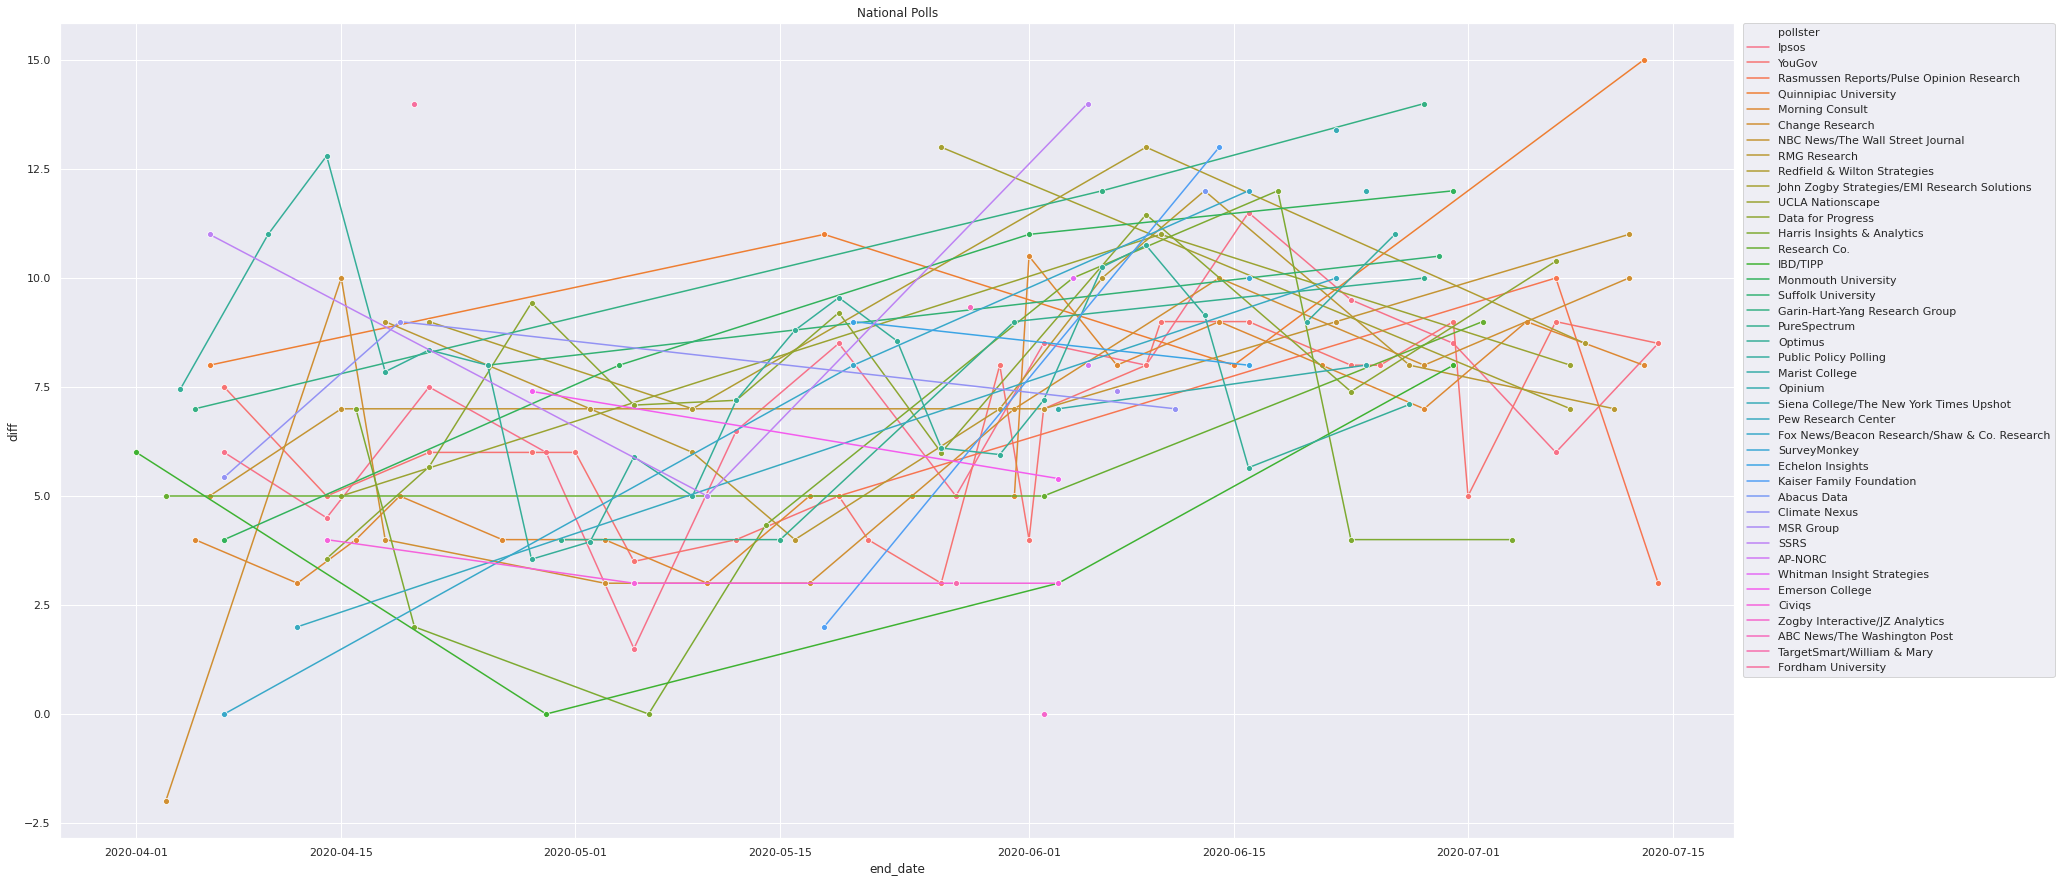

In [29]:
# All national polls
plt.figure(figsize=(30,15))
sns.set()
plot = sns.lineplot(x='end_date', y='diff', hue='pollster', ci=None, marker='o', data=national_polls[national_polls['end_date'] >= '4/1/2020']).set_title("National Polls")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
fig = plot.get_figure()
fig.savefig('src/images/national/since_april.png')

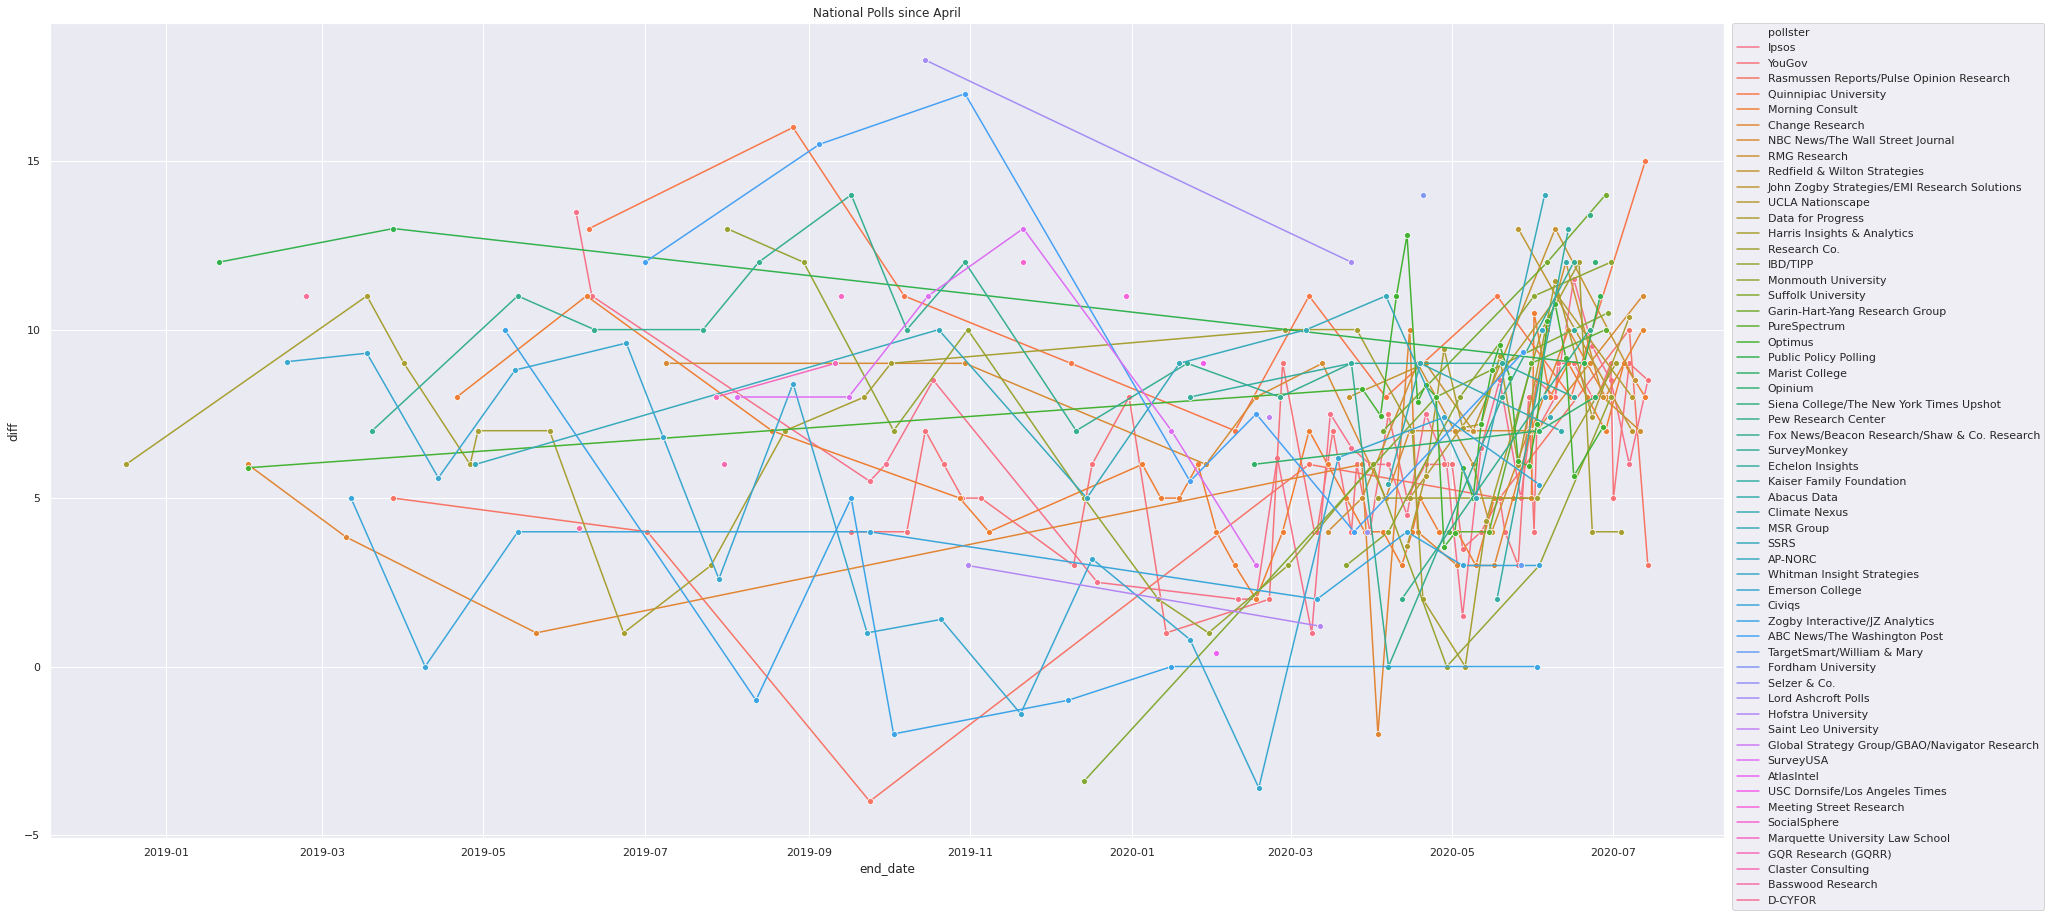

In [31]:
# All national polls
plt.figure(figsize=(30,15))
sns.set()
plot = sns.lineplot(x='end_date', y='diff', hue='pollster', ci=None, marker='o', data=national_polls).set_title("National Polls since April")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
fig = plot.get_figure()
fig.savefig('src/images/national/all.png')

In [43]:
pollsters = national_polls.pollster.unique()

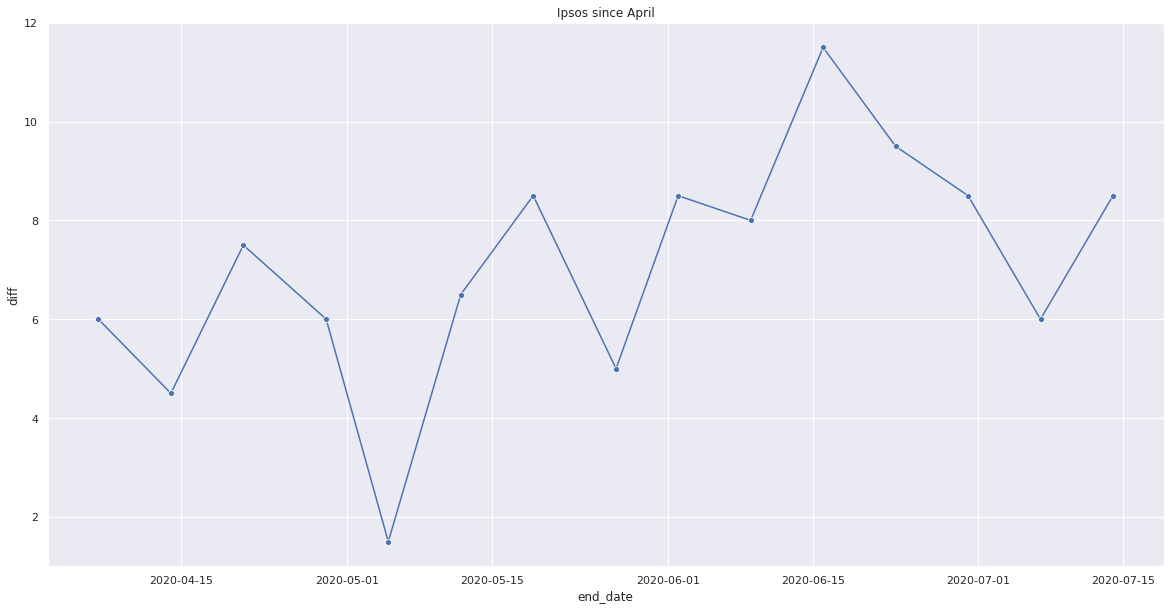

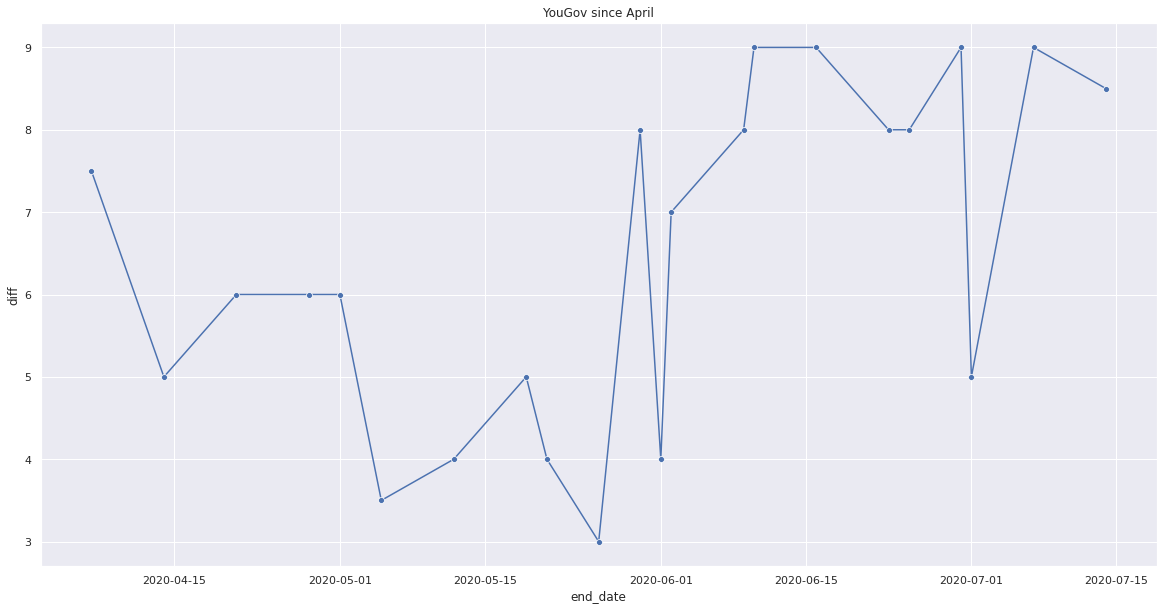

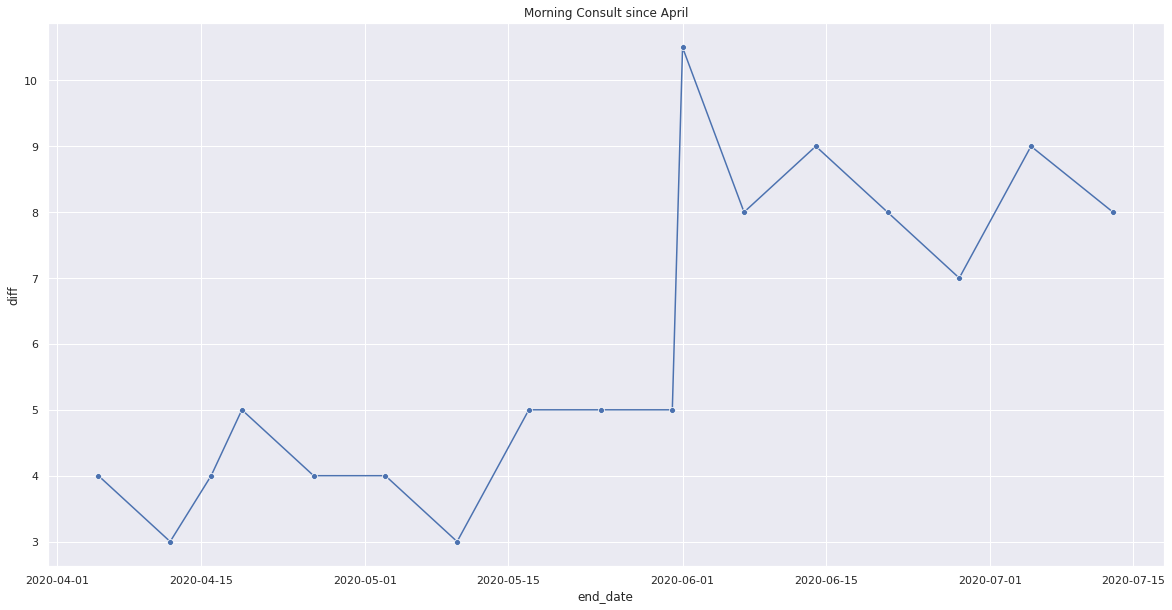

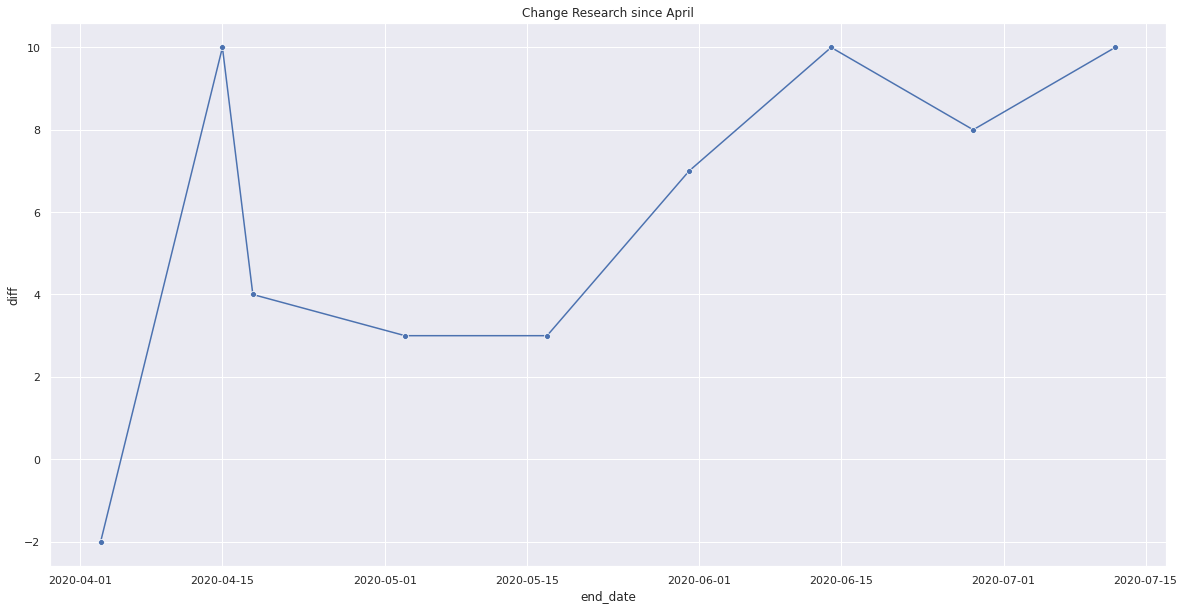

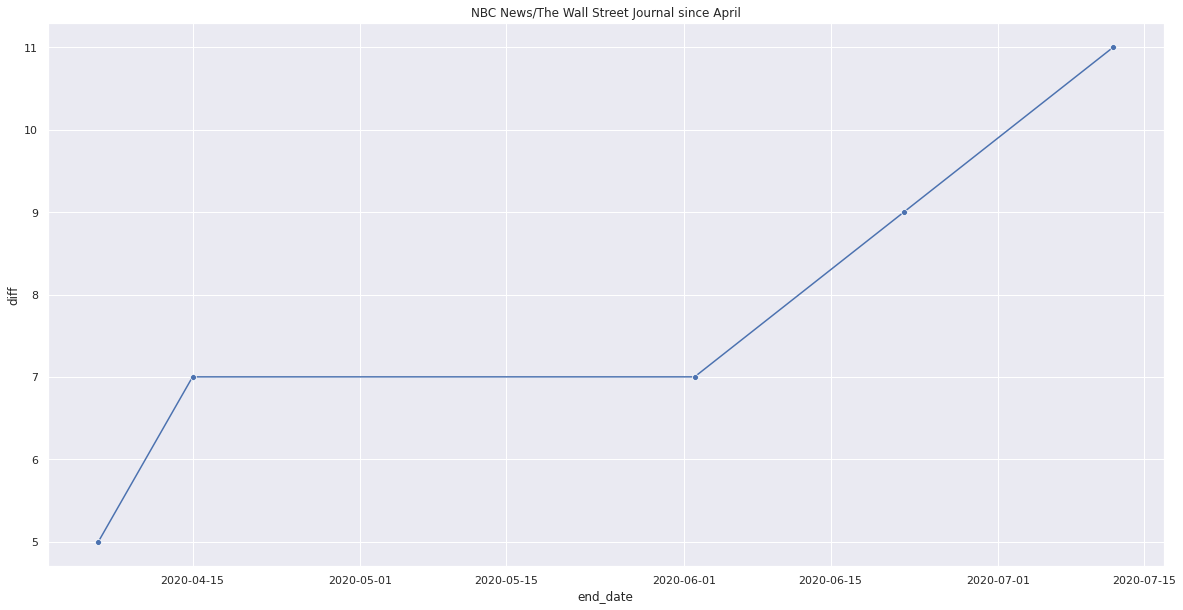

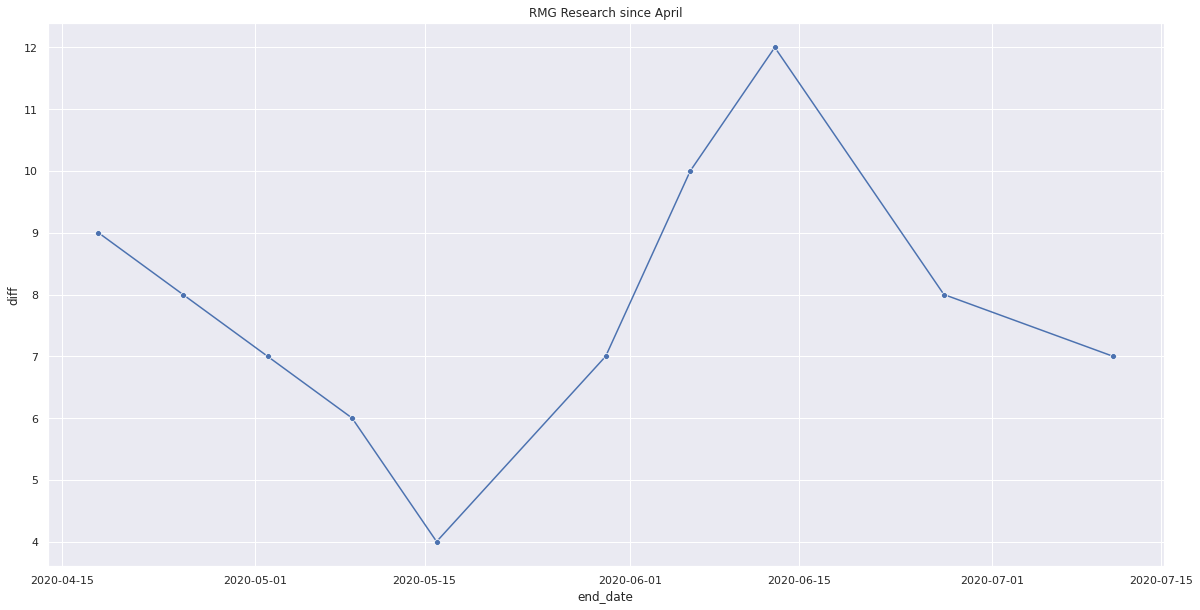

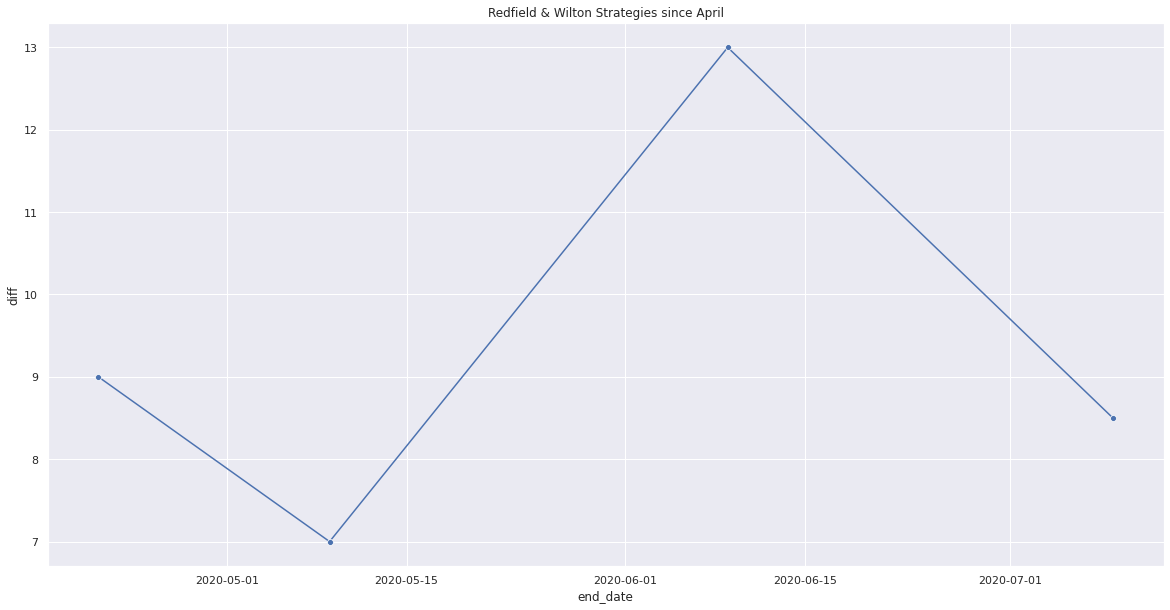

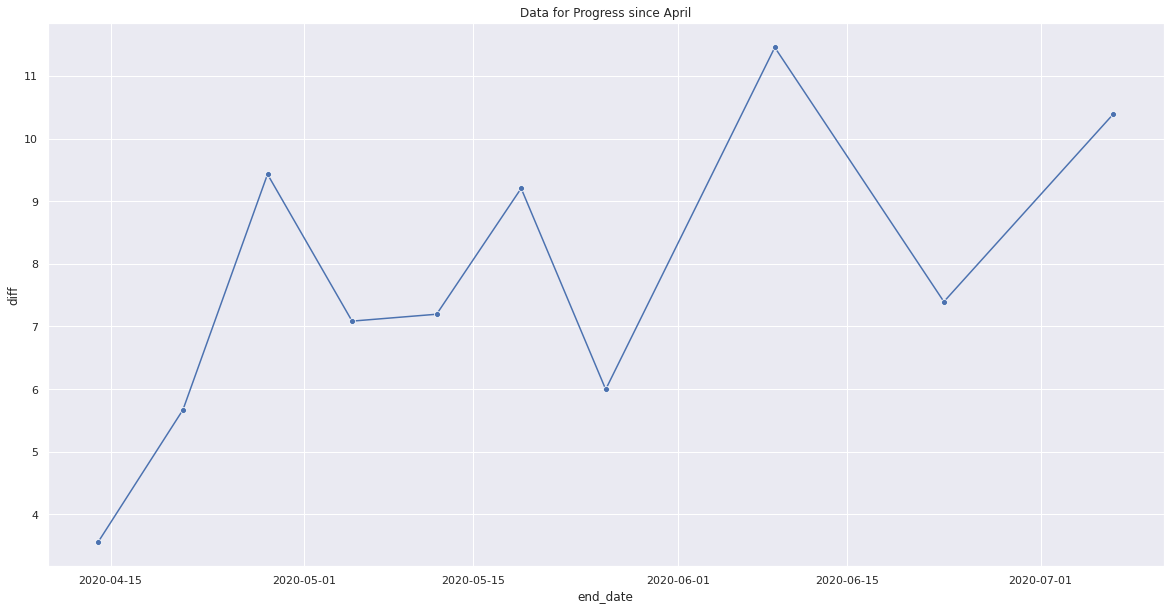

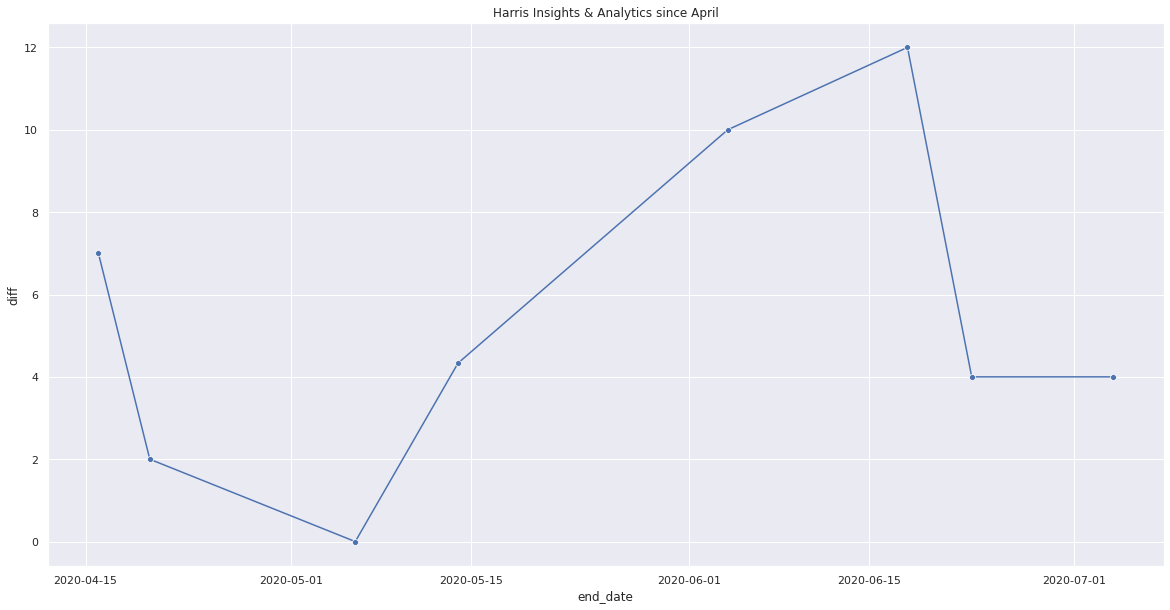

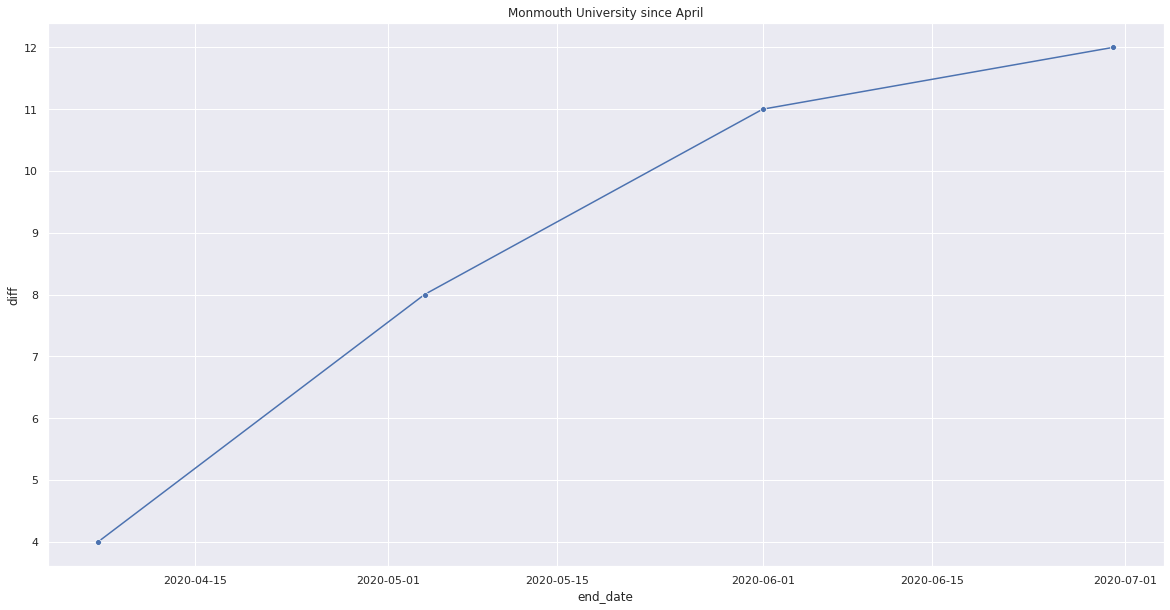

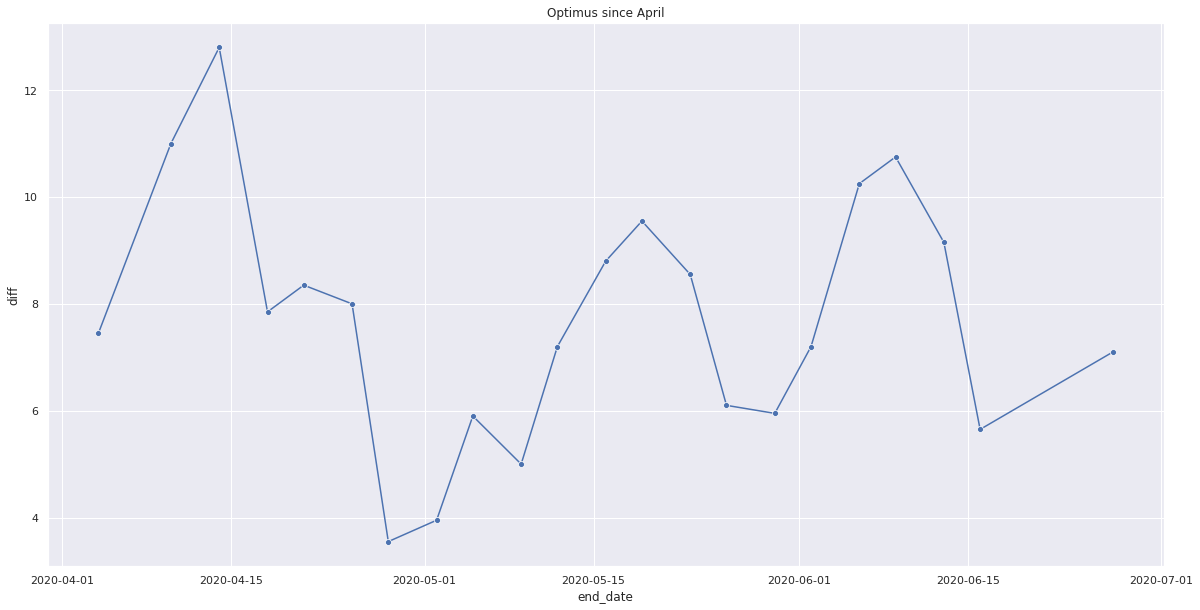

In [61]:
for i, pollster in enumerate(pollsters):
    pollster_polls = national_polls[(national_polls['pollster'] == pollster) & (national_polls['end_date'] >= '4/1/2020') & national_polls['diff'].notnull()]
    if pollster_polls.shape[0] >= 5:
        plt.figure(i, figsize=(20,10))
        plot = sns.lineplot(x='end_date', y='diff', data=pollster_polls, marker='o', ci=None).set_title(pollster + ' since April')
        fig = plot.get_figure()
        filename = pollster.replace('/','').replace('&','and').replace('.','').replace(' ','_').lower()
        fig.savefig(f'src/images/national/pollster/{filename}.png')

In [45]:
statepolls = df[df['state'].notna()]

question_id  poll_id  cycle         state  pollster_id  \
10       125342    67081   2020       Florida          801   
11       125342    67081   2020       Florida          801   
12       125335    67079   2020       Montana         1447   
13       125335    67079   2020       Montana         1447   
14       125388    67101   2020  Pennsylvania          320   

               pollster sponsor_ids   sponsors         display_name  \
10     Gravis Marketing         NaN        NaN     Gravis Marketing   
11     Gravis Marketing         NaN        NaN     Gravis Marketing   
12               Civiqs         185  Daily Kos               Civiqs   
13               Civiqs         185  Daily Kos               Civiqs   
14  Monmouth University         NaN        NaN  Monmouth University   

    pollster_rating_id  ...          created_at notes  \
10               124.0  ... 2020-07-14 10:34:00   NaN   
11               124.0  ... 2020-07-14 10:34:00   NaN   
12               471.0  ... 2020-07-14 08:17:00   NaN   
13               471.0  ... 2020-07-14 08:17:00   NaN   
14               215.0  ... 2020-07-15 11:00:00   NaN   

                                                  url    stage race_id answer  \
10  https://www.scribd.com/document/469124461/Flor...  general    6220  Biden   
11  https://www.scribd.com/document/469124461/Flor...  general    6220  Trump   
12  https://civiqs.com/documents/Civiqs_DailyKos_M...  general    6237  Biden   
13  https://civiqs.com/documents/Civiqs_DailyKos_M...  general    6237  Trump   
14  https://www.monmouth.edu/polling-institute/doc...  general    6249  Biden   

         candidate_name  candidate_party   pct  diff  
10  Joseph R. Biden Jr.              DEM  53.0  10.0  
11         Donald Trump              REP  43.0   NaN  
12  Joseph R. Biden Jr.              DEM  45.0  -4.0  
13         Donald Trump              REP  49.0   NaN  
14  Joseph R. Biden Jr.              DEM  53.0  13.0  

[5 rows x 38 columns]

In [52]:
states = statepolls.state.unique()

array(['Florida', 'Montana', 'Pennsylvania', 'Arizona', 'Michigan',
       'North Carolina', 'Wisconsin', 'Kentucky', 'Texas', 'Alabama',
       'Alaska', 'Nebraska CD-2', 'Maine', 'Georgia', 'Missouri',
       'Colorado', 'New York', 'Ohio', 'Minnesota', 'New Hampshire',
       'New Mexico', 'Arkansas', 'Iowa', 'Oklahoma', 'Mississippi',
       'Kansas', 'South Carolina', 'California', 'Indiana', 'Maryland',
       'Tennessee', 'Washington', 'Virginia', 'Utah', 'Massachusetts',
       'New Jersey', 'Connecticut', 'Nevada', 'North Dakota', 'Delaware',
       'West Virginia', 'Maine CD-1', 'Maine CD-2'], dtype=object)

<ipython-input-59-ef05f7a057c4>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i, figsize=(30,20))
<ipython-input-59-ef05f7a057c4>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i, figsize=(30,20))
<ipython-input-59-ef05f7a057c4>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i, figsiz

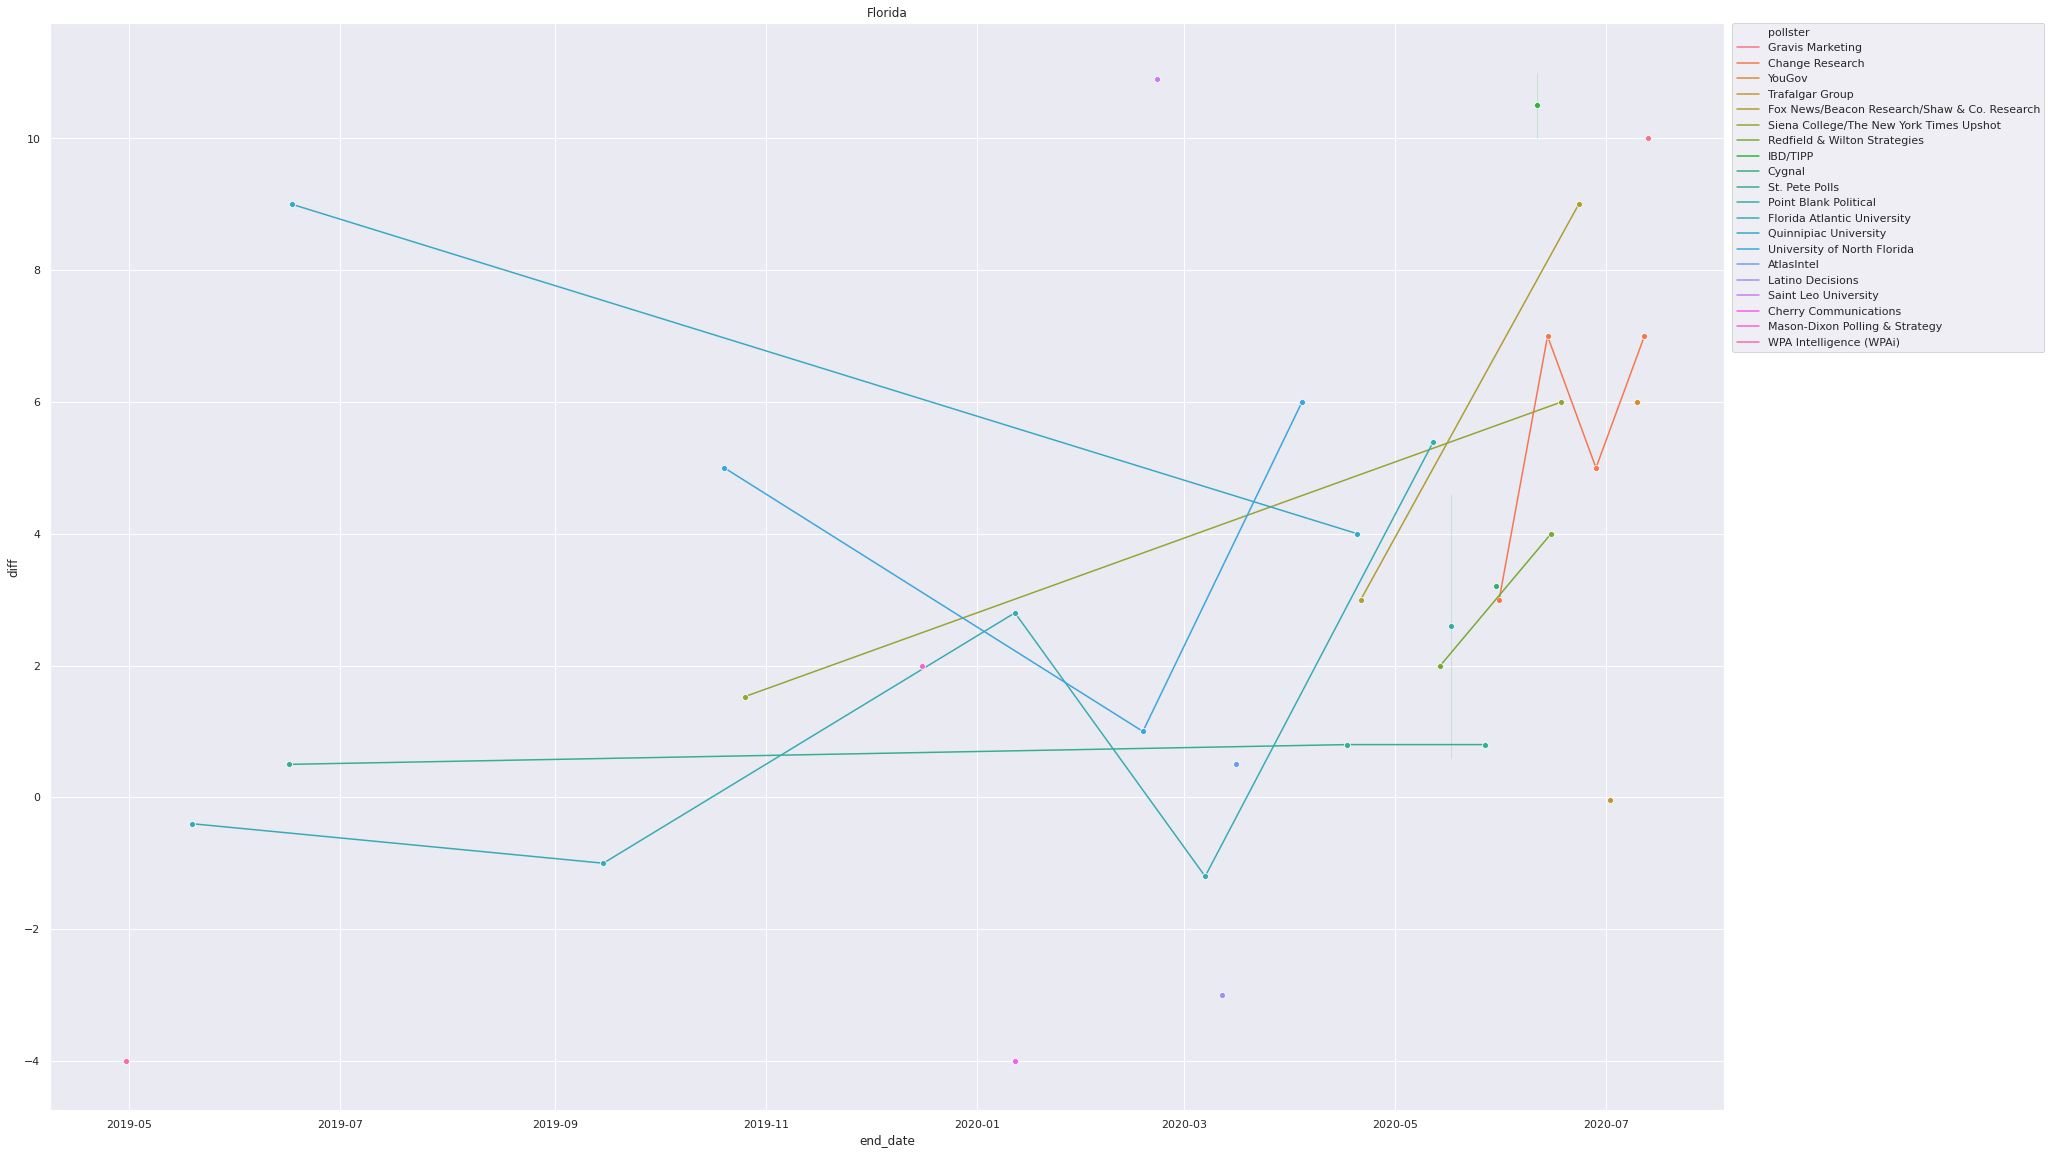

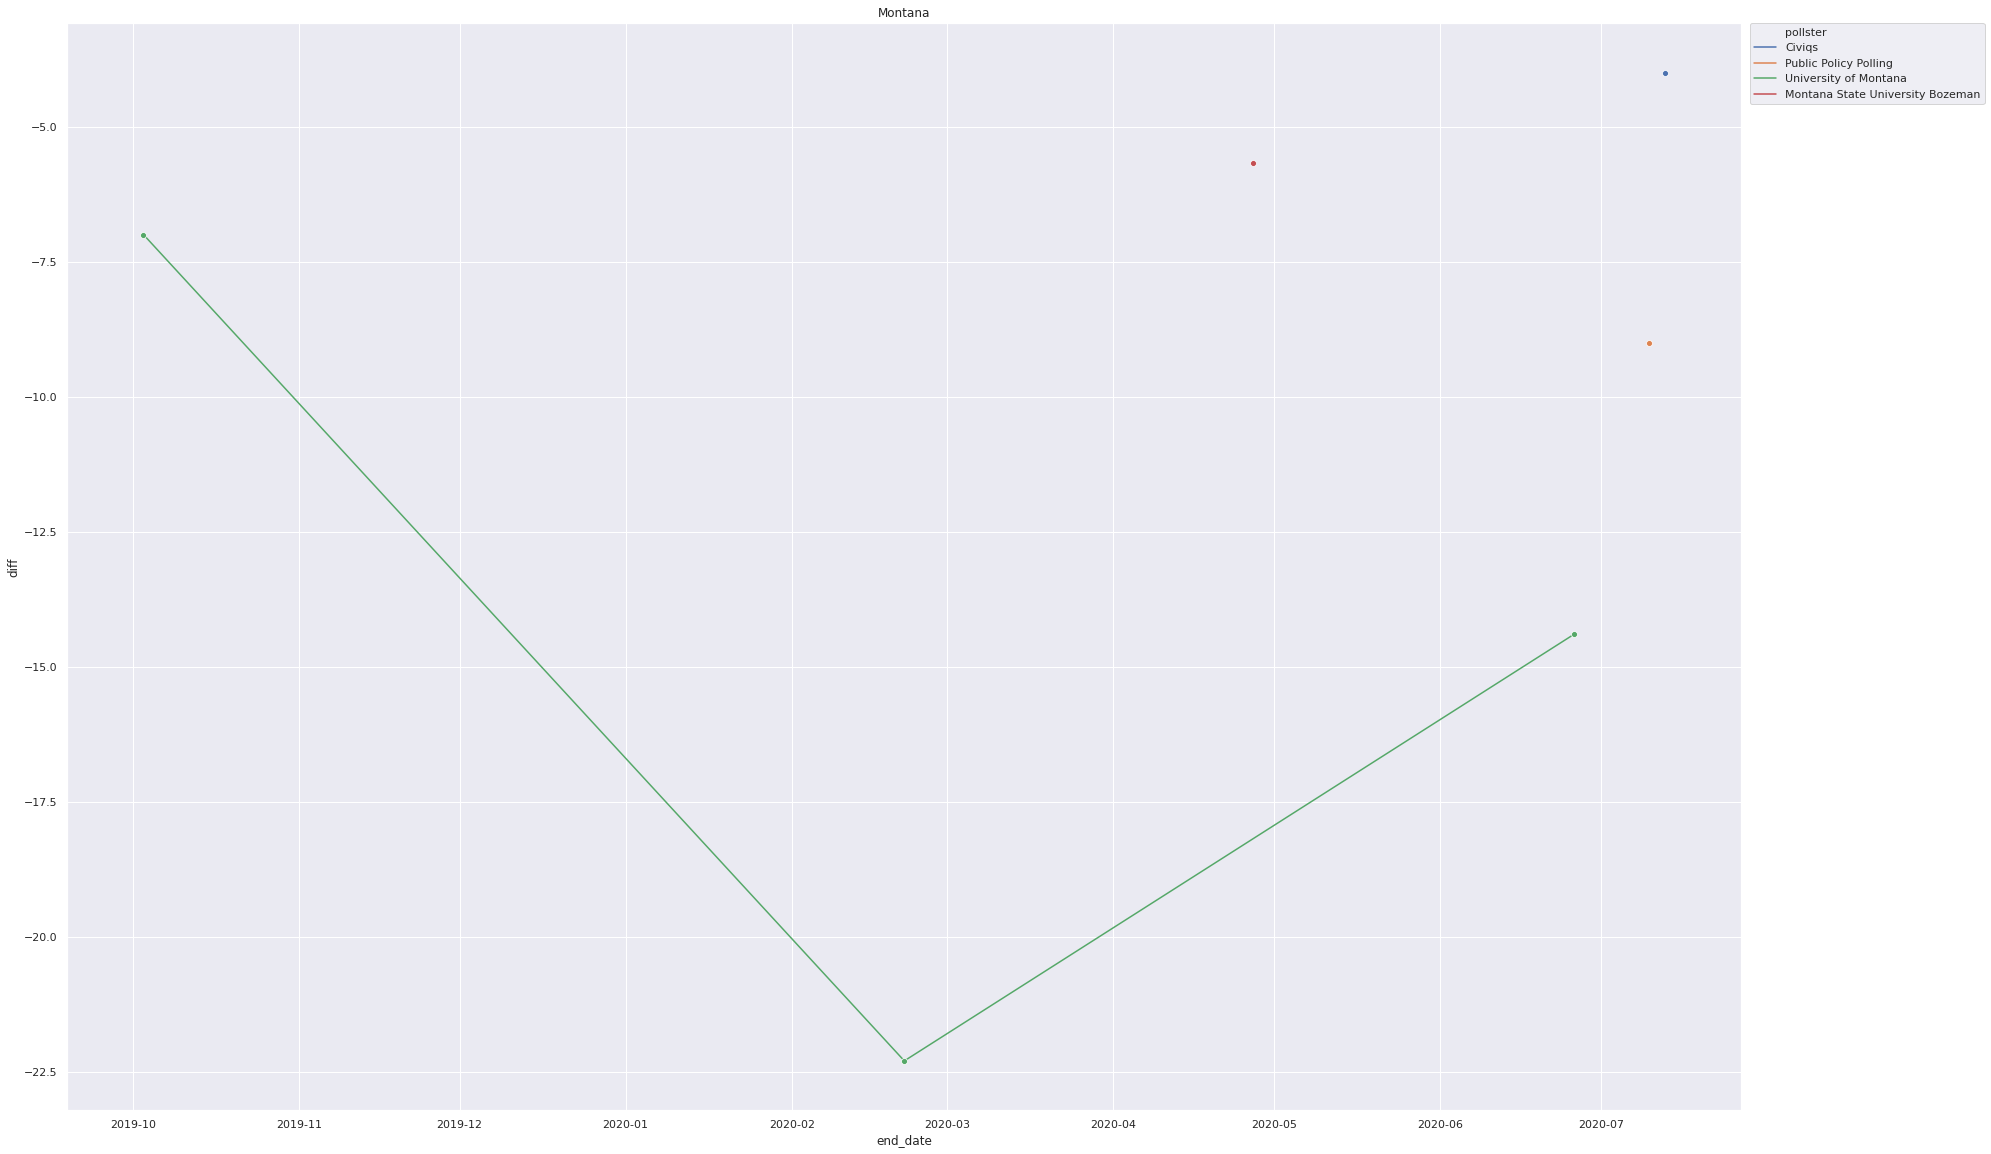

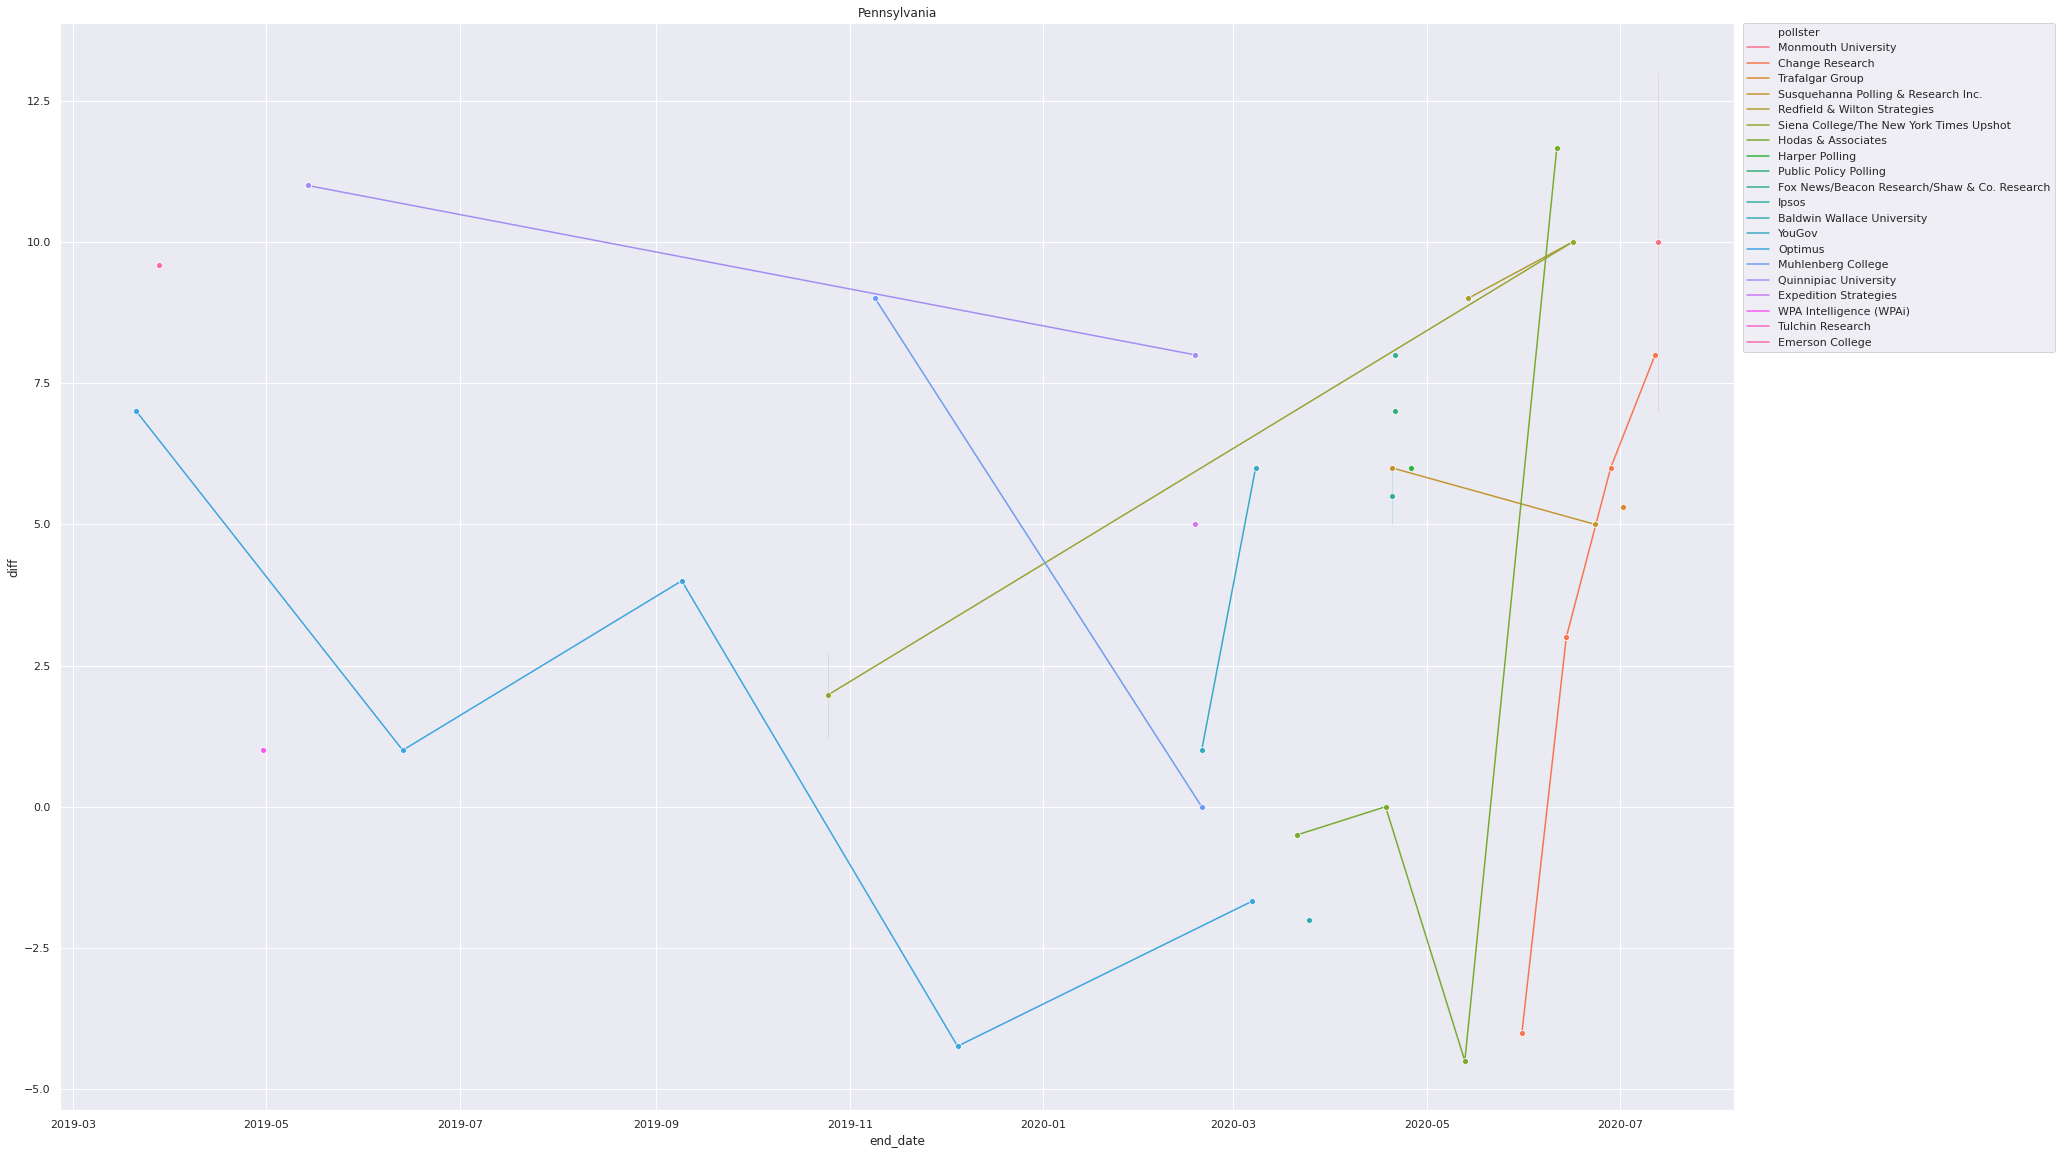

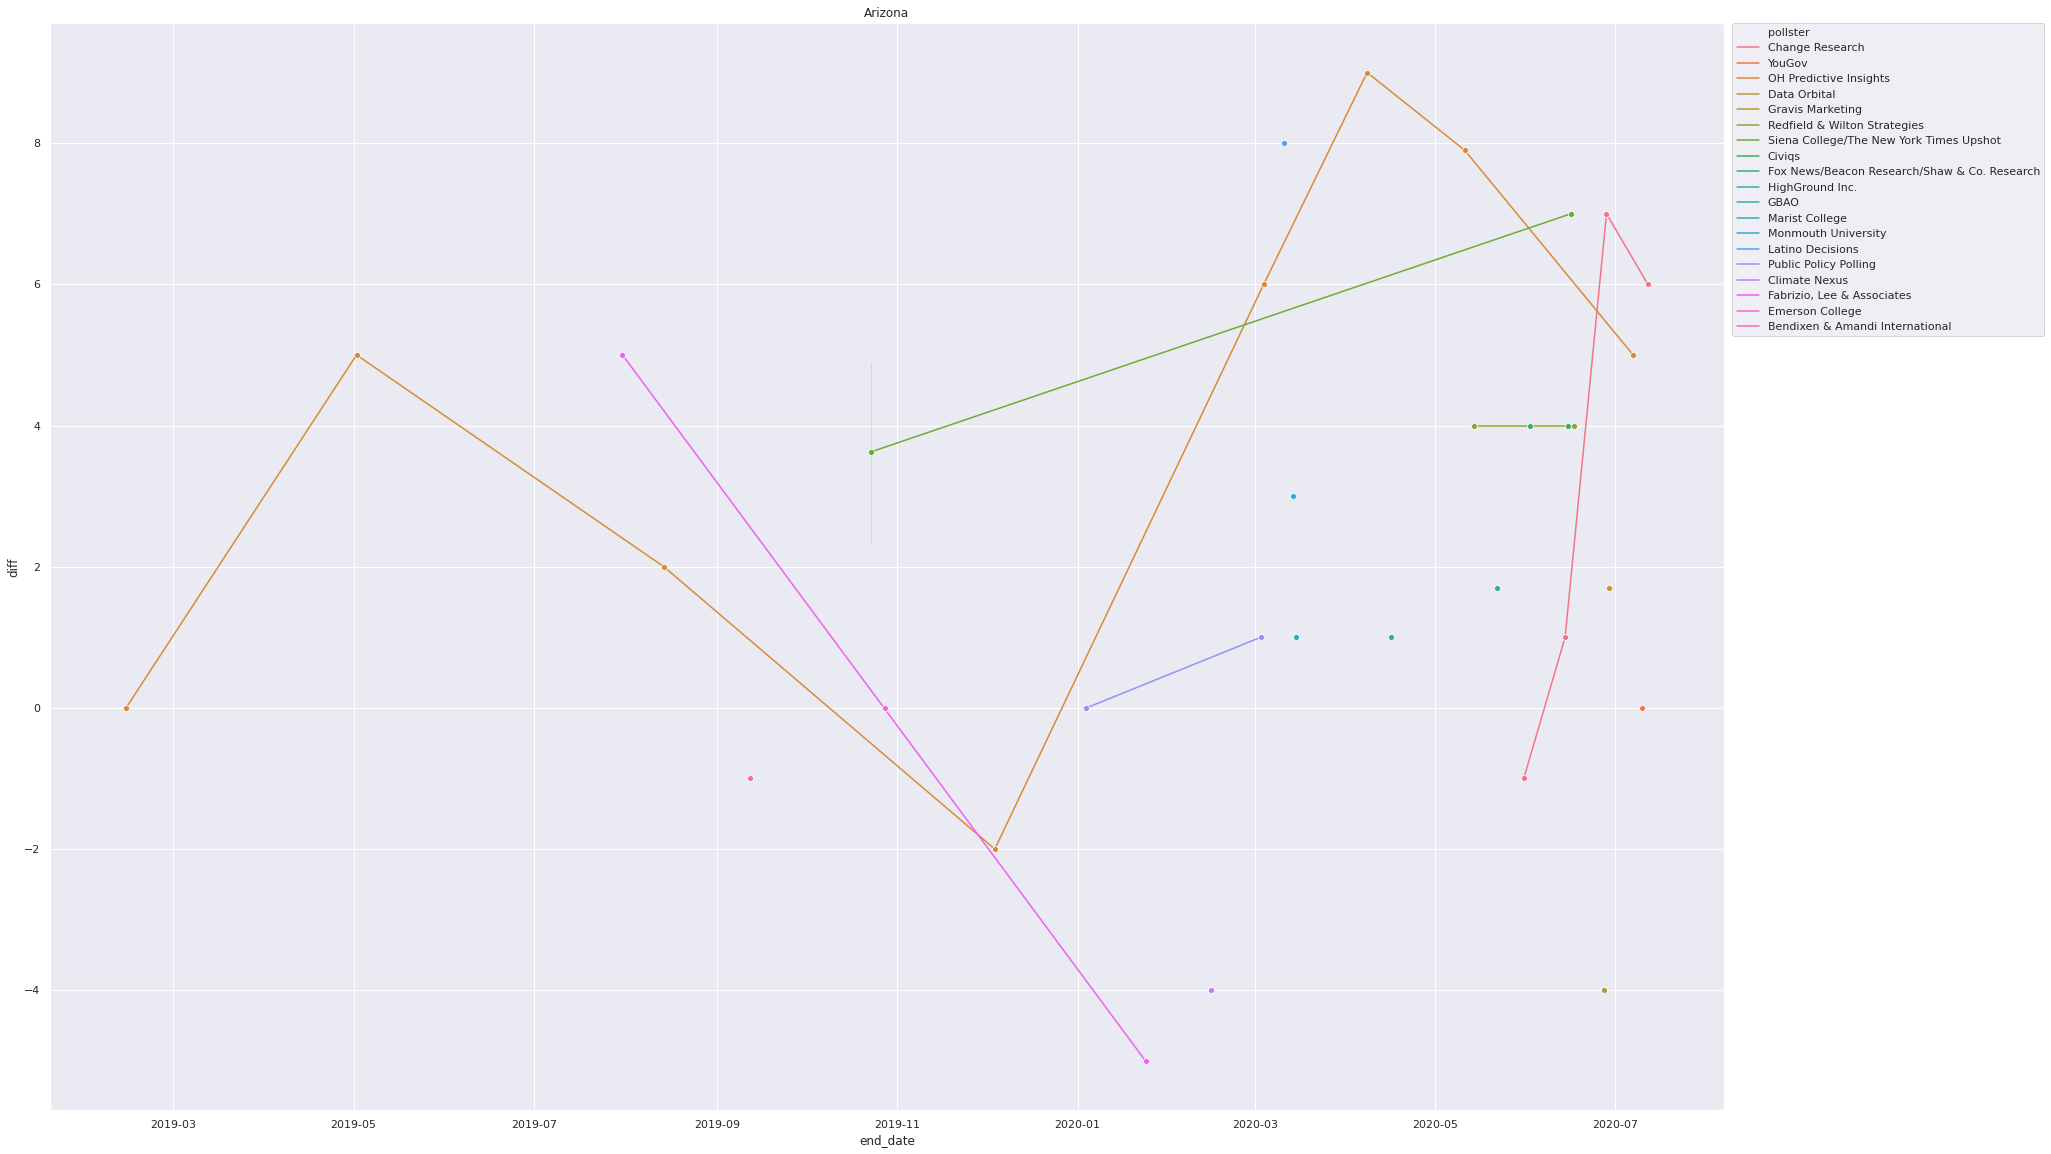

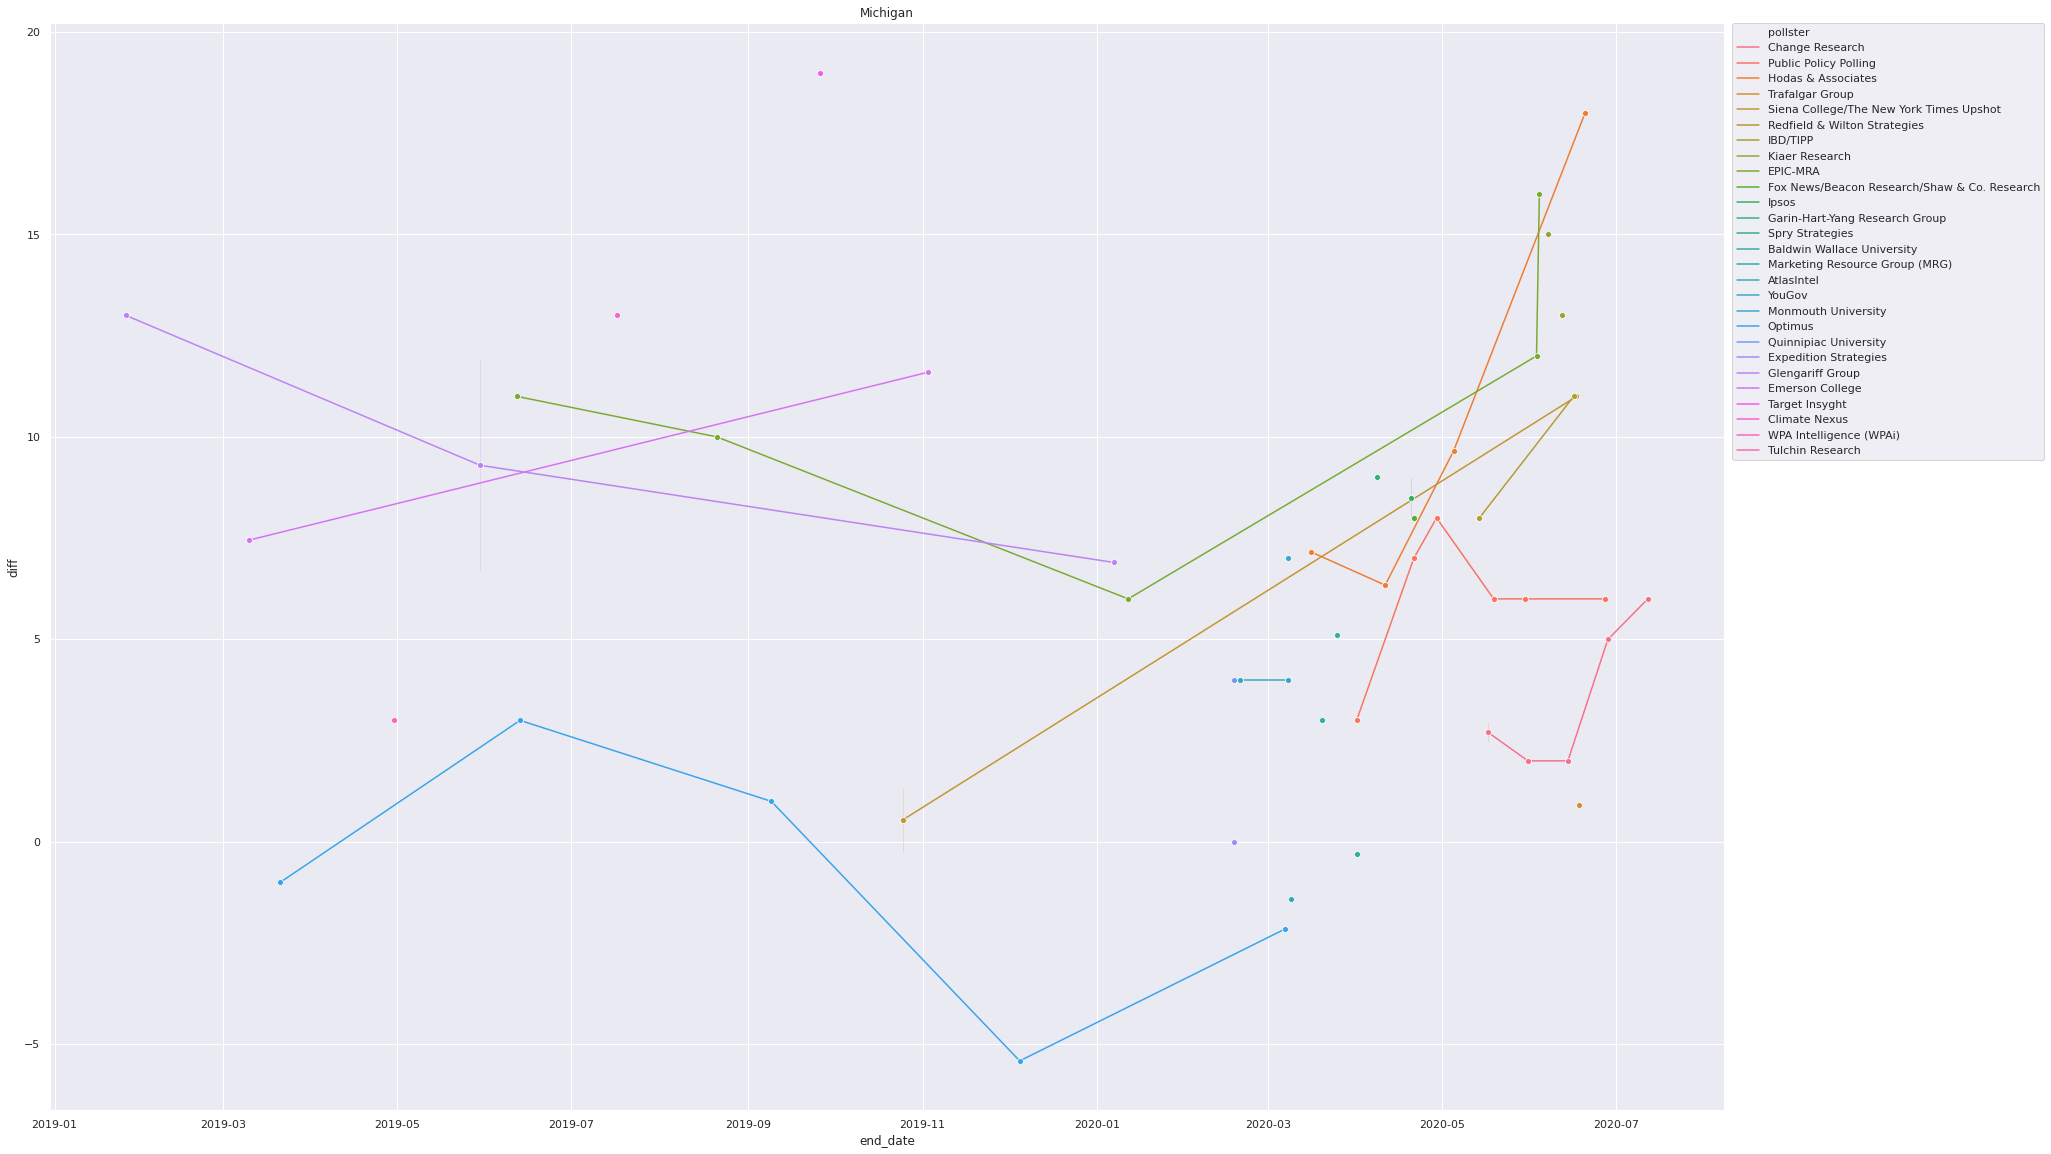

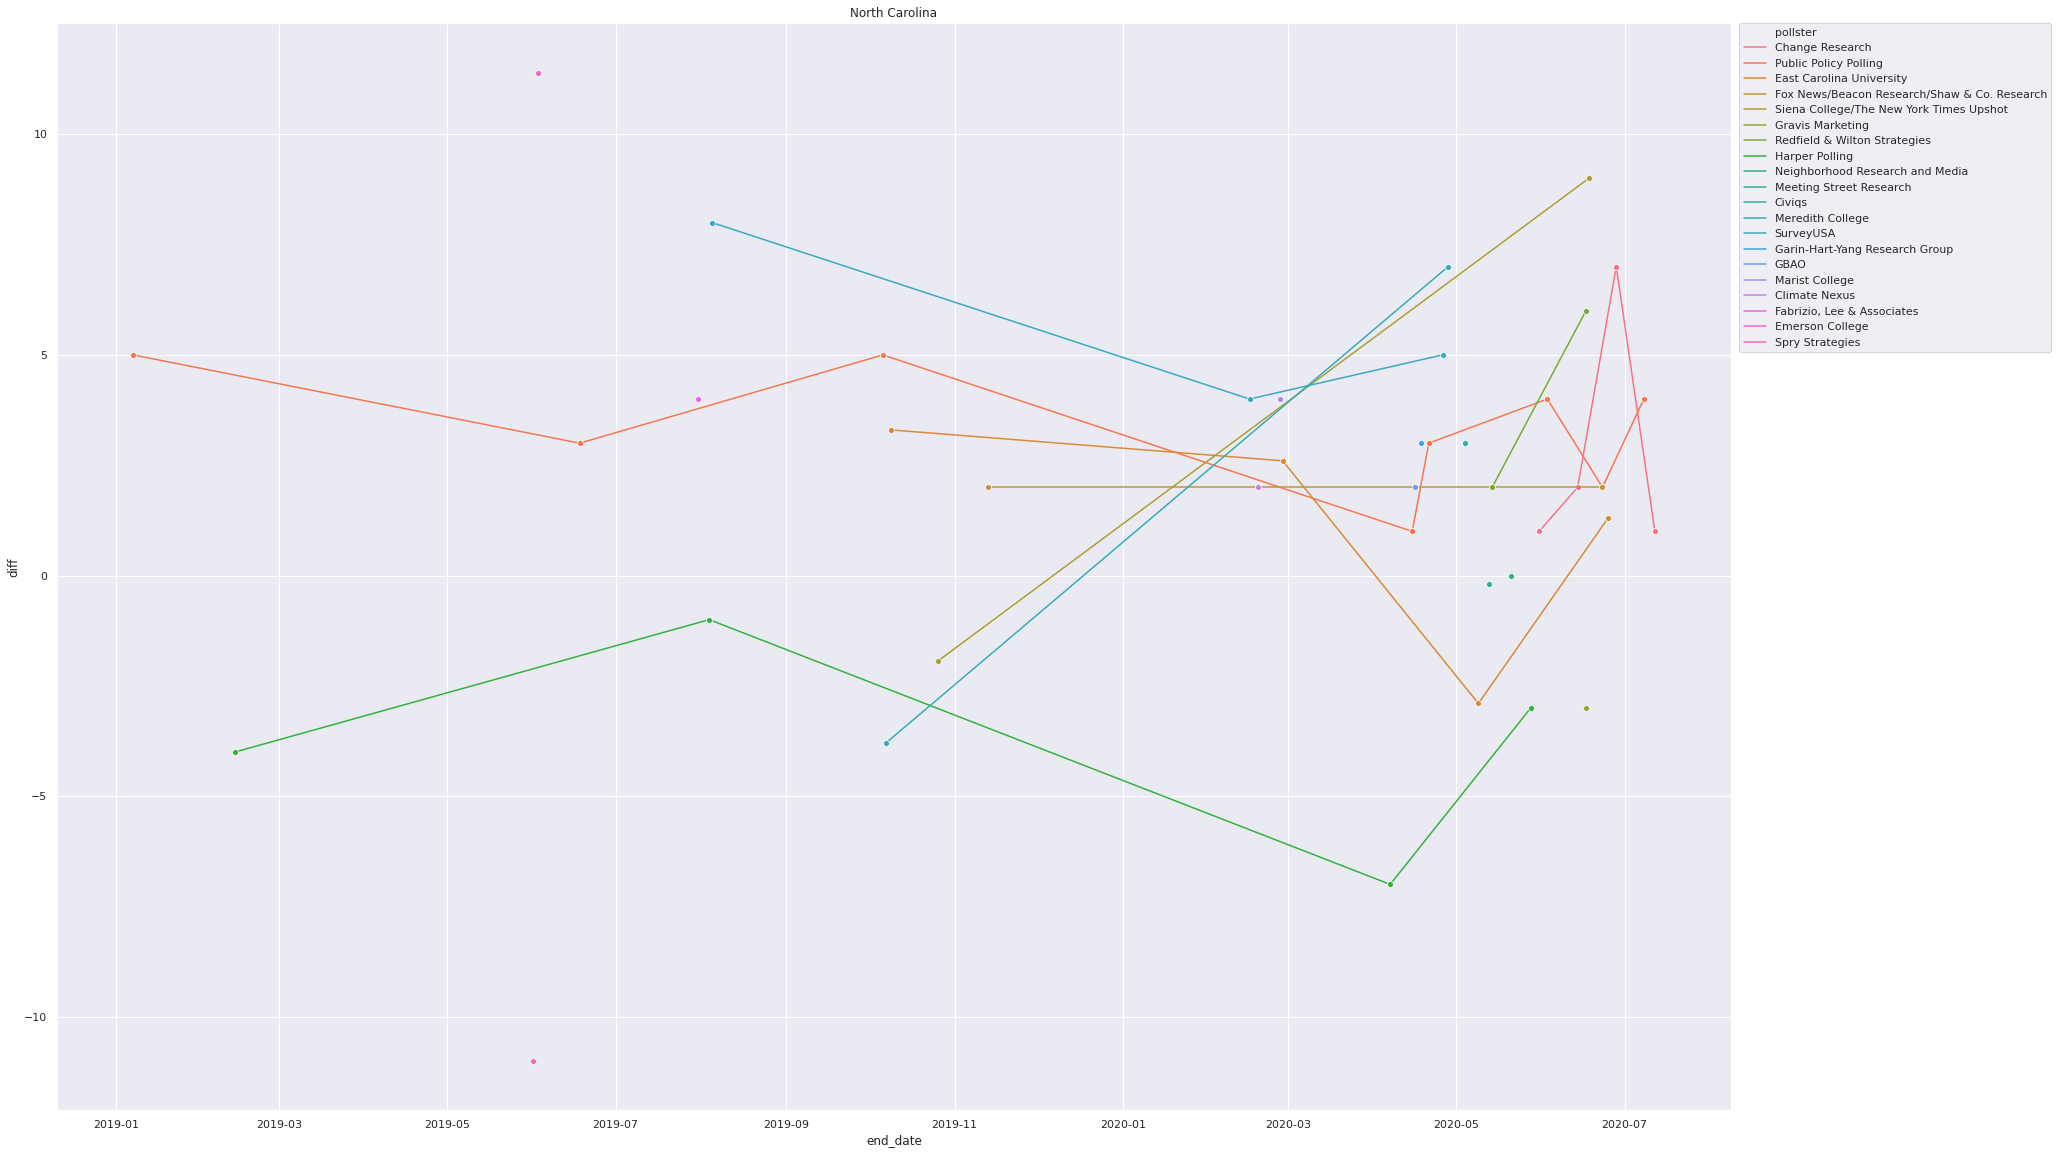

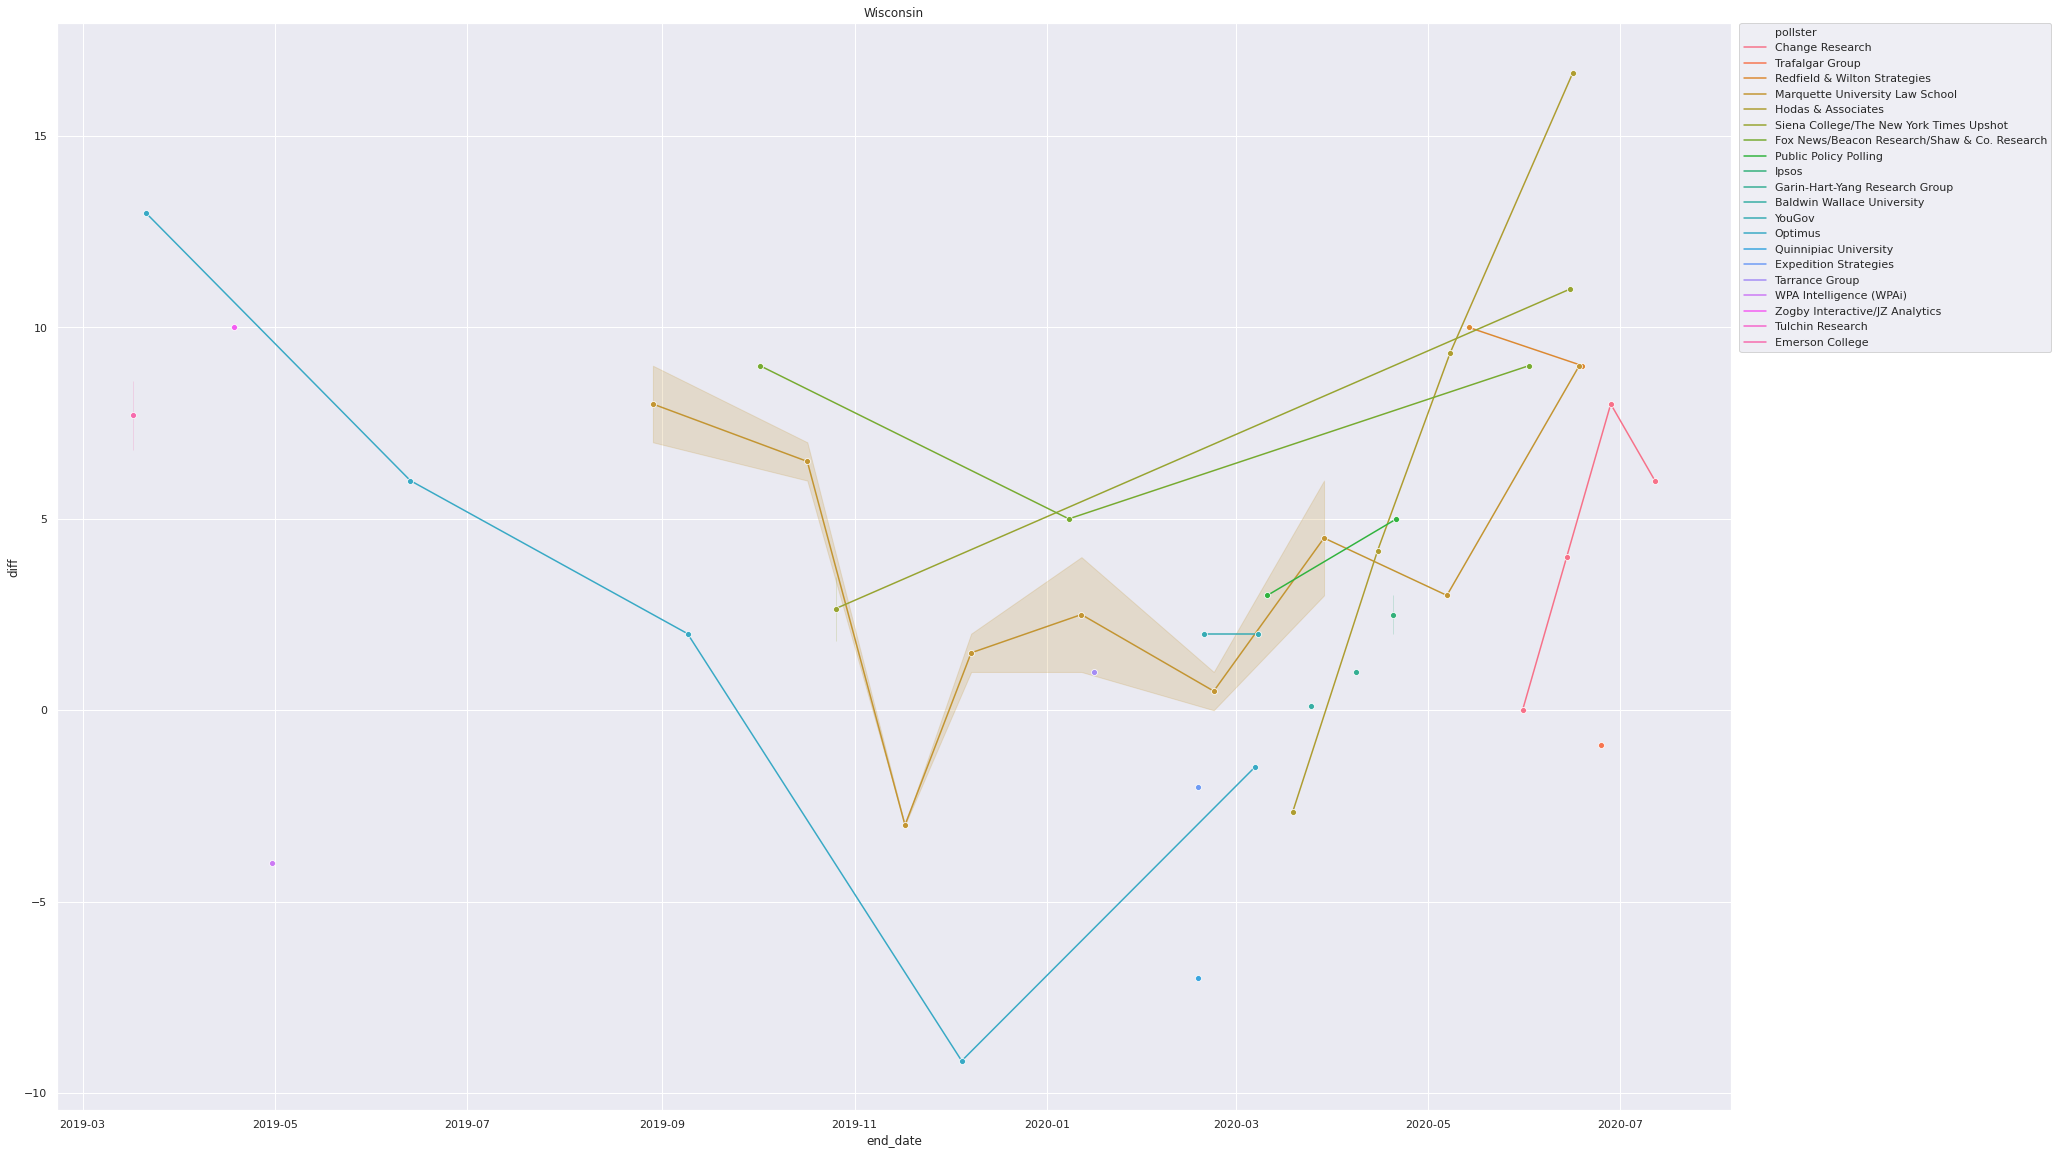

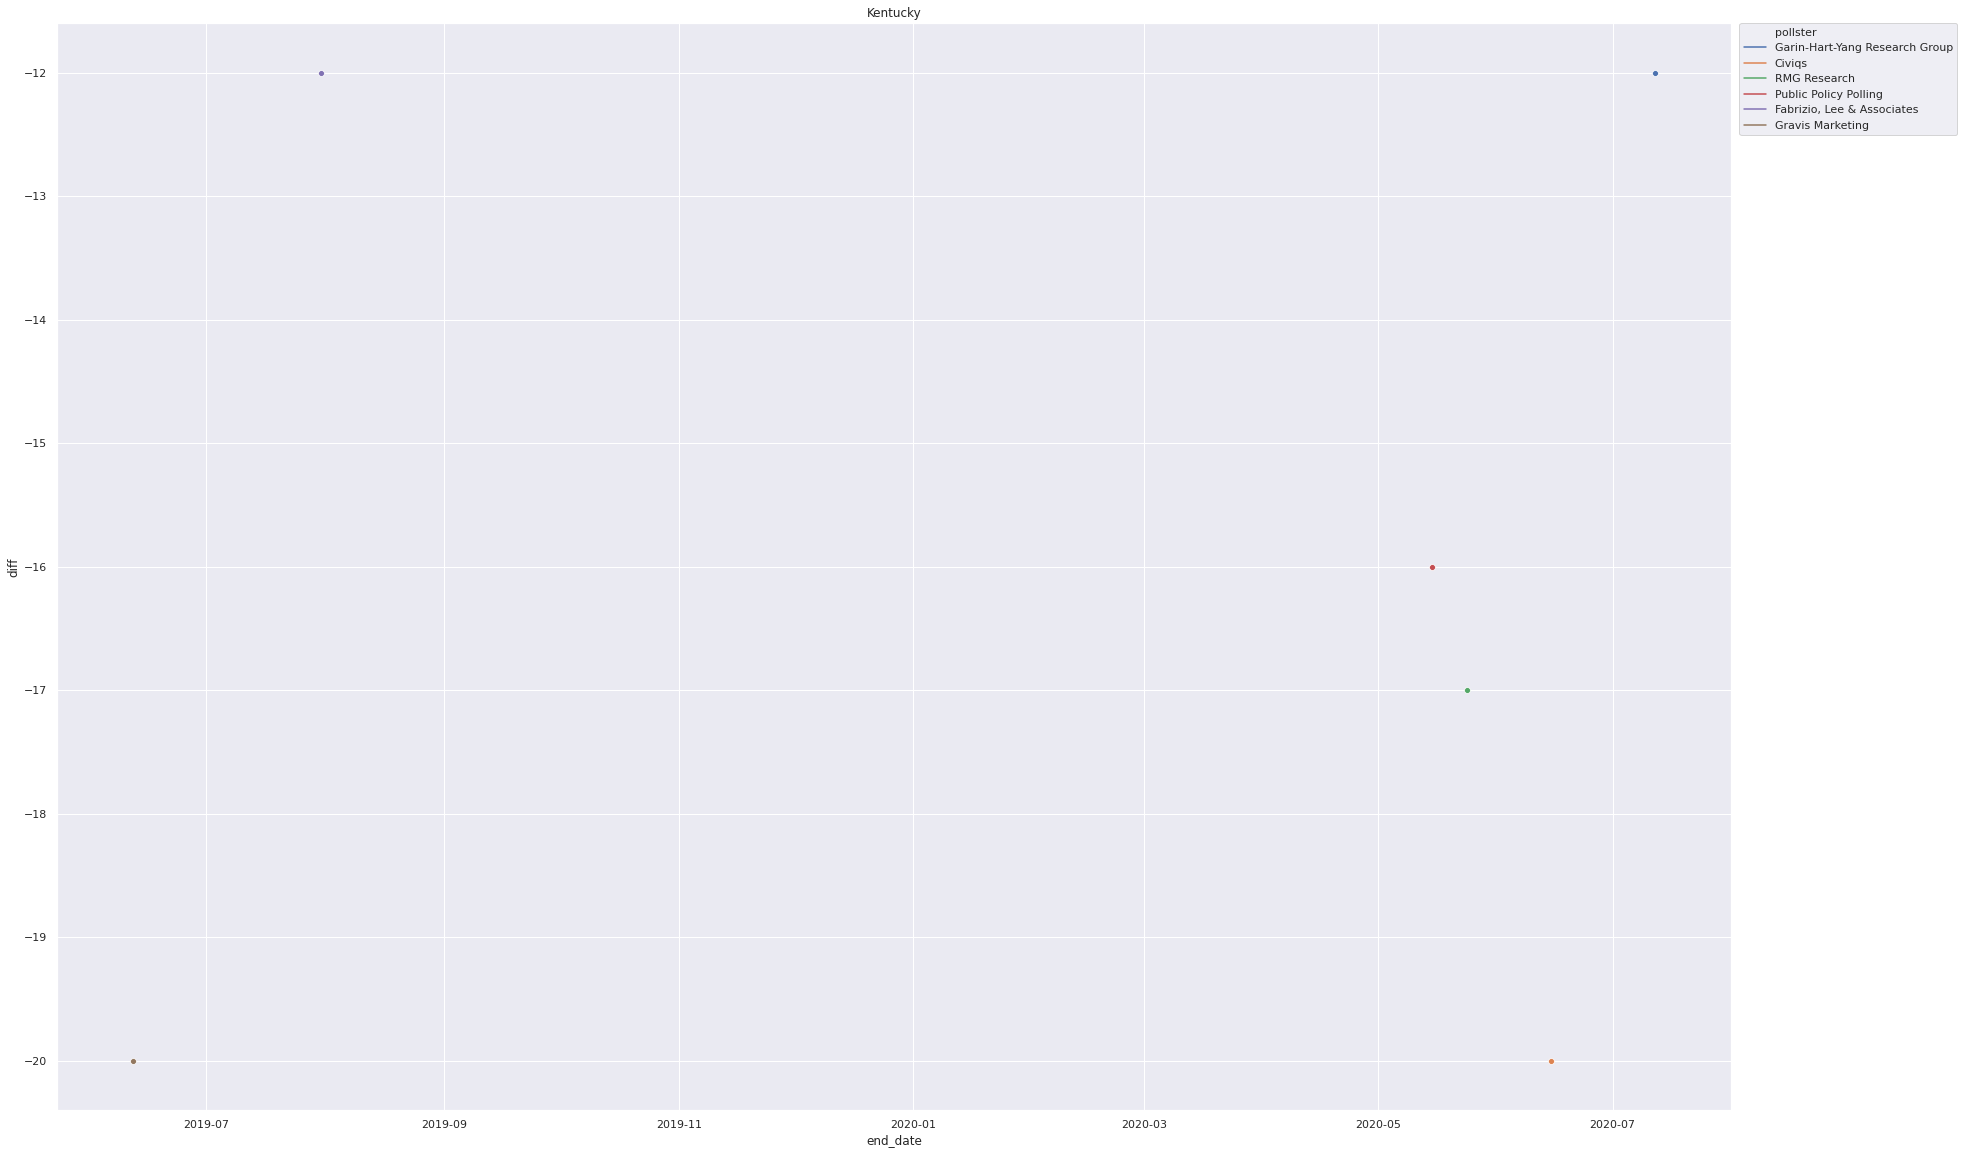

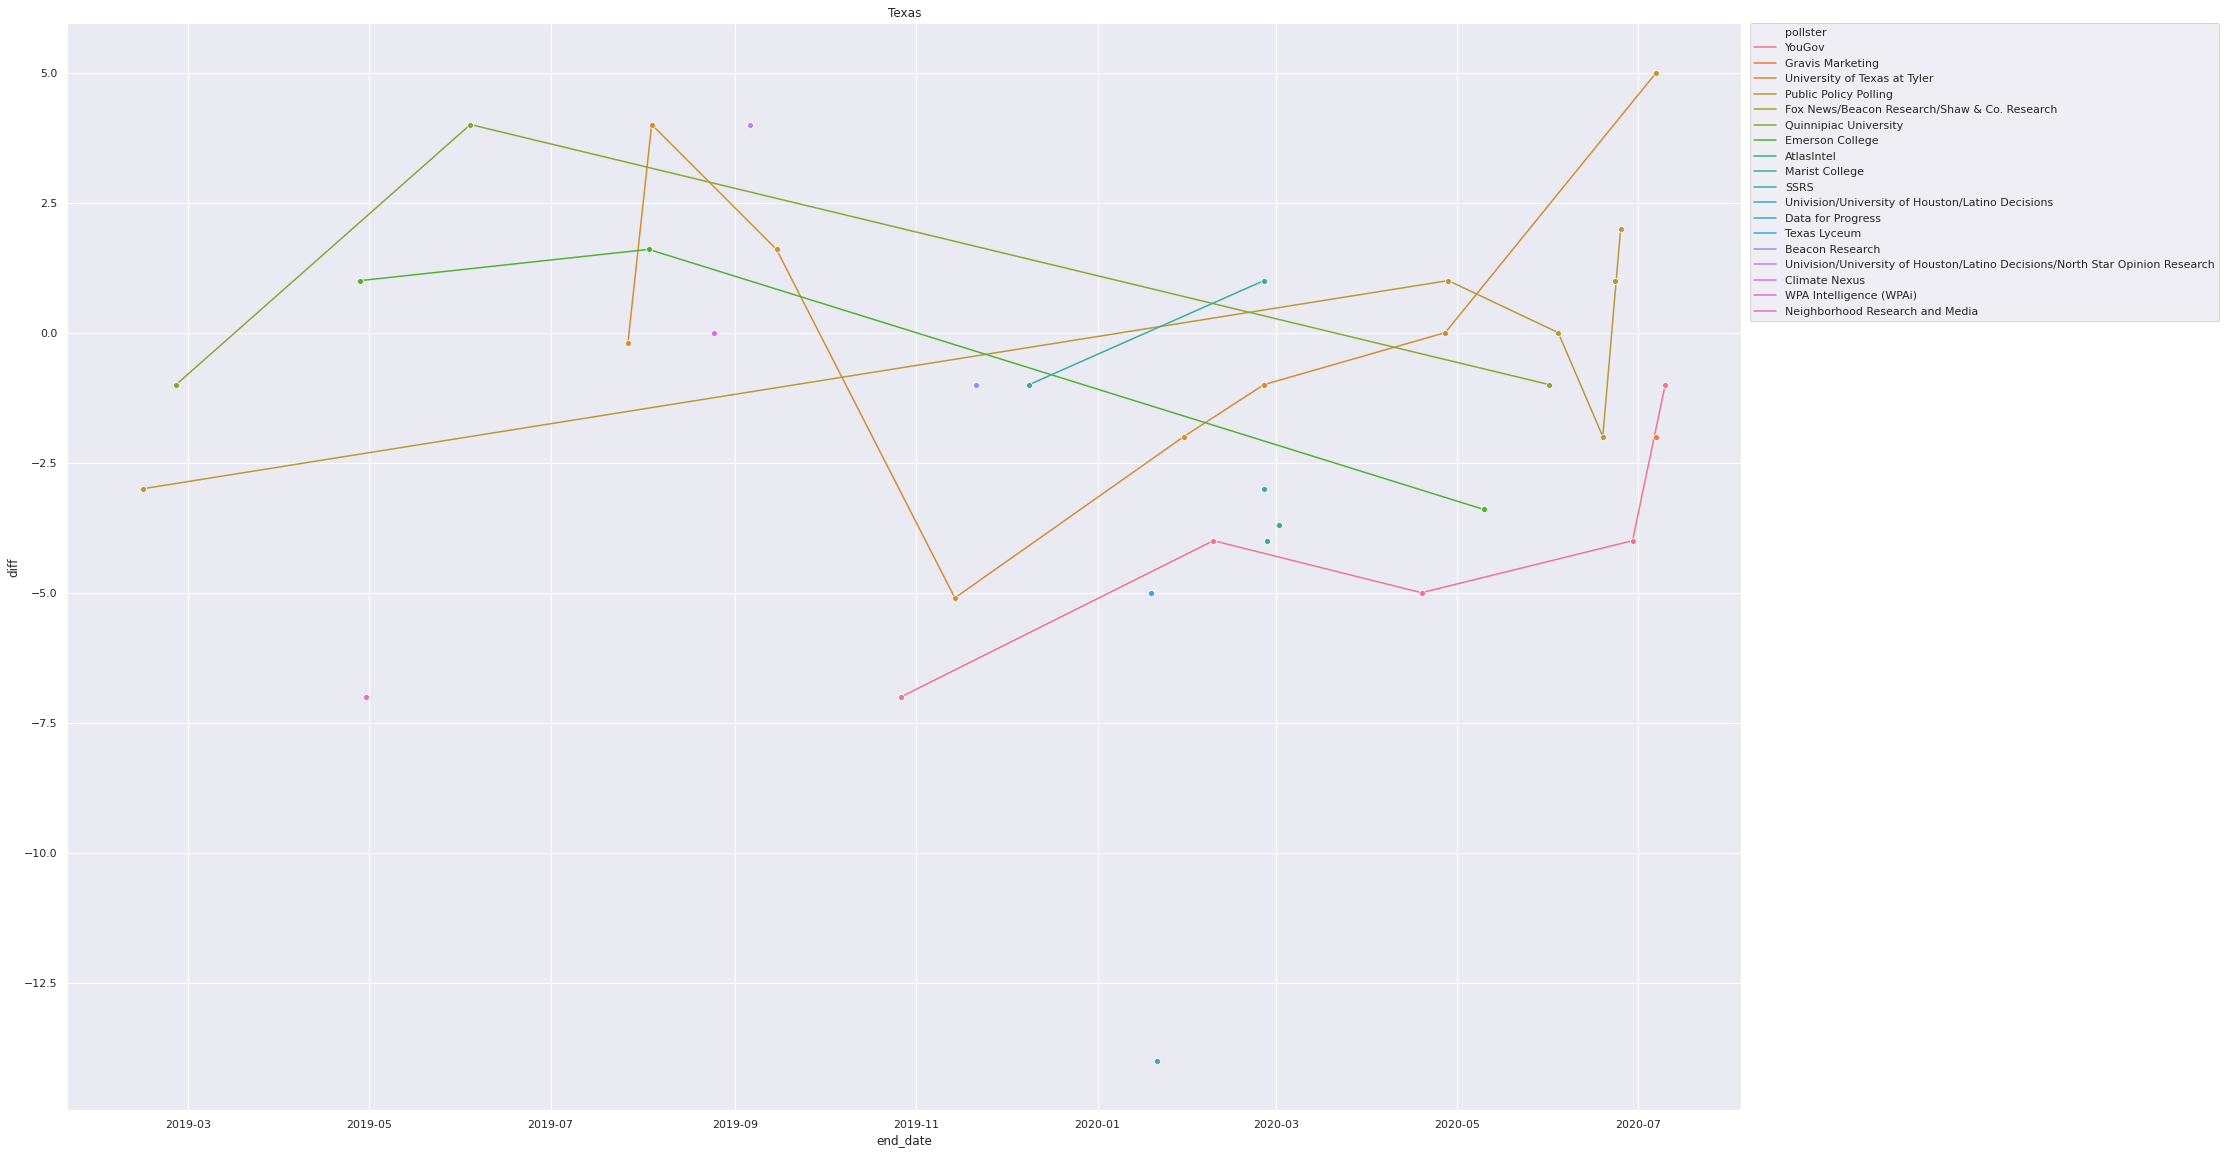

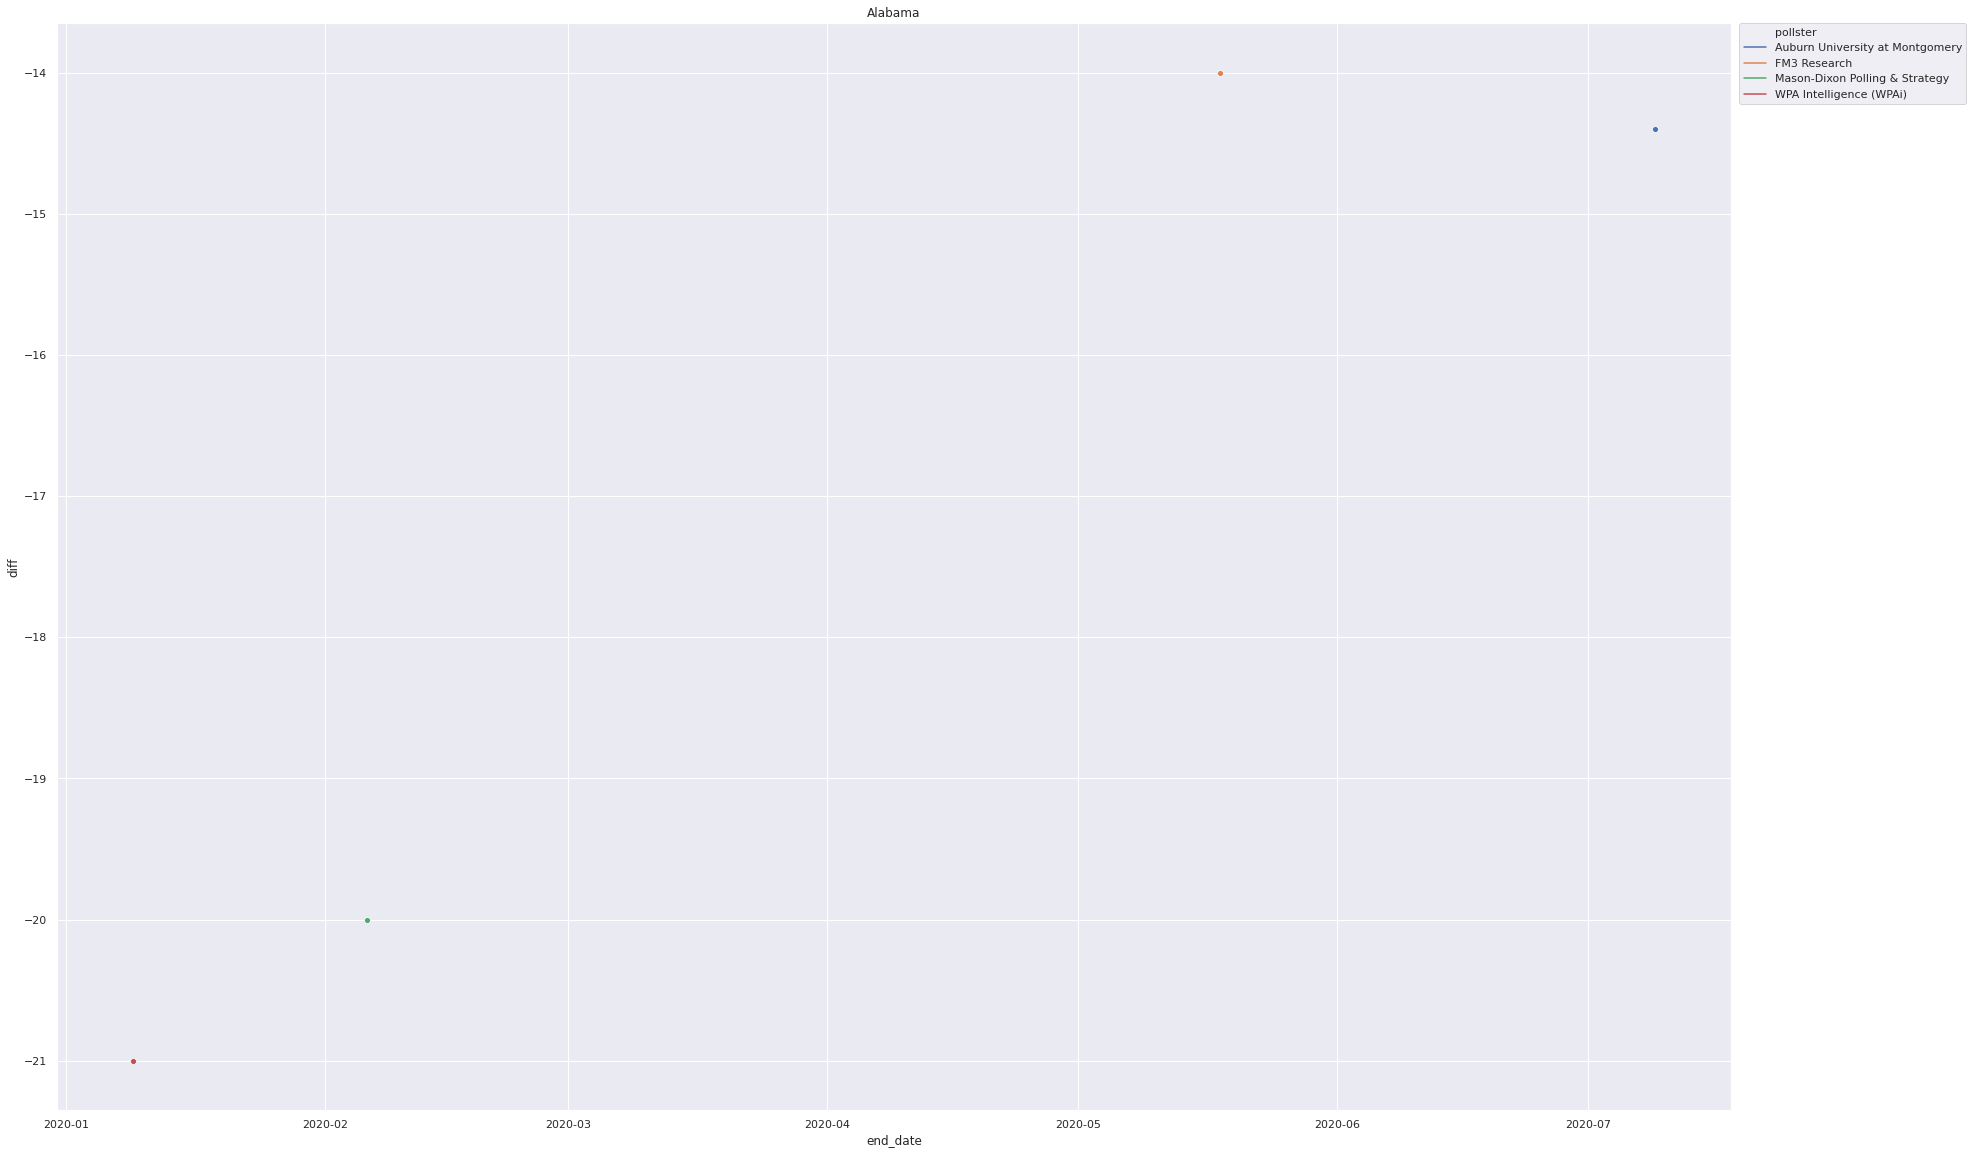

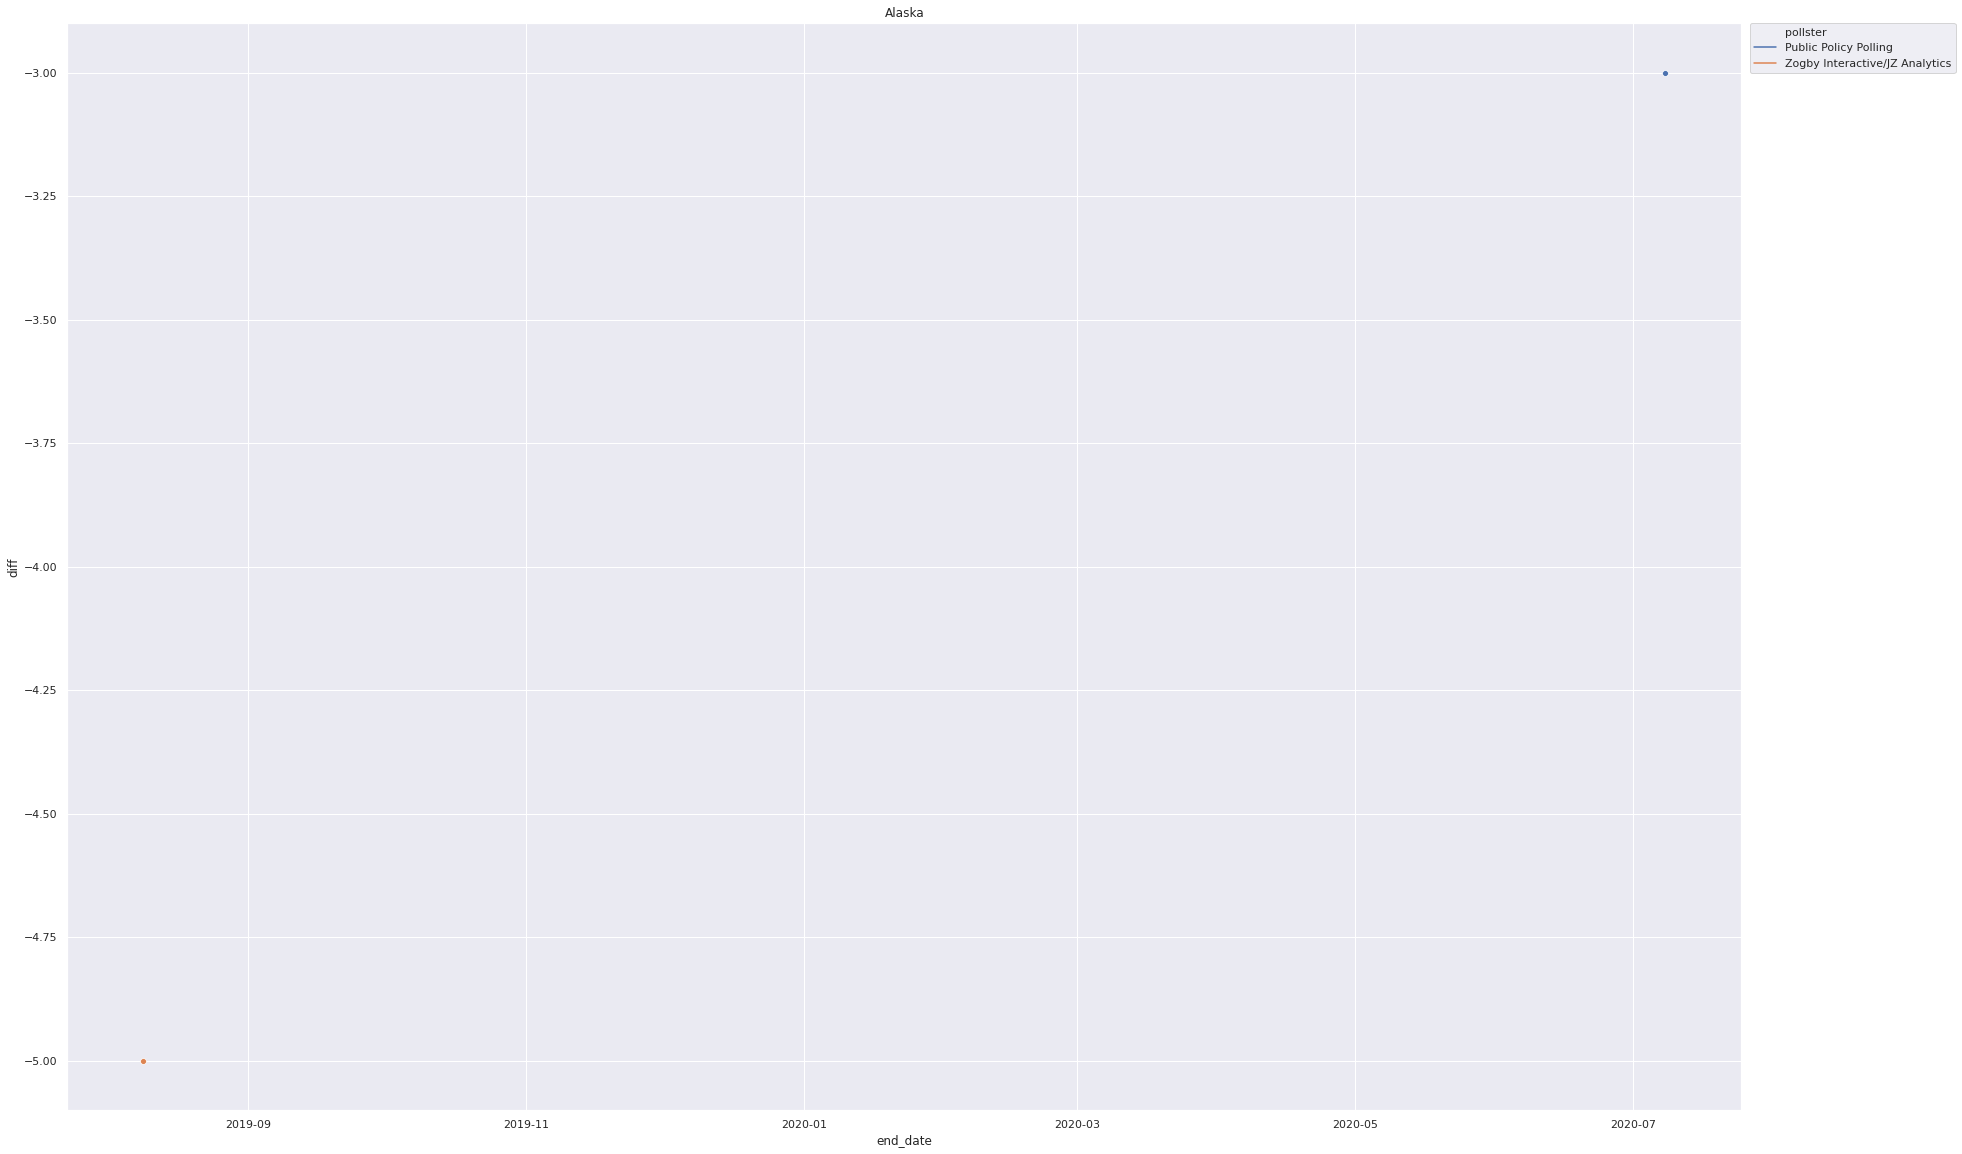

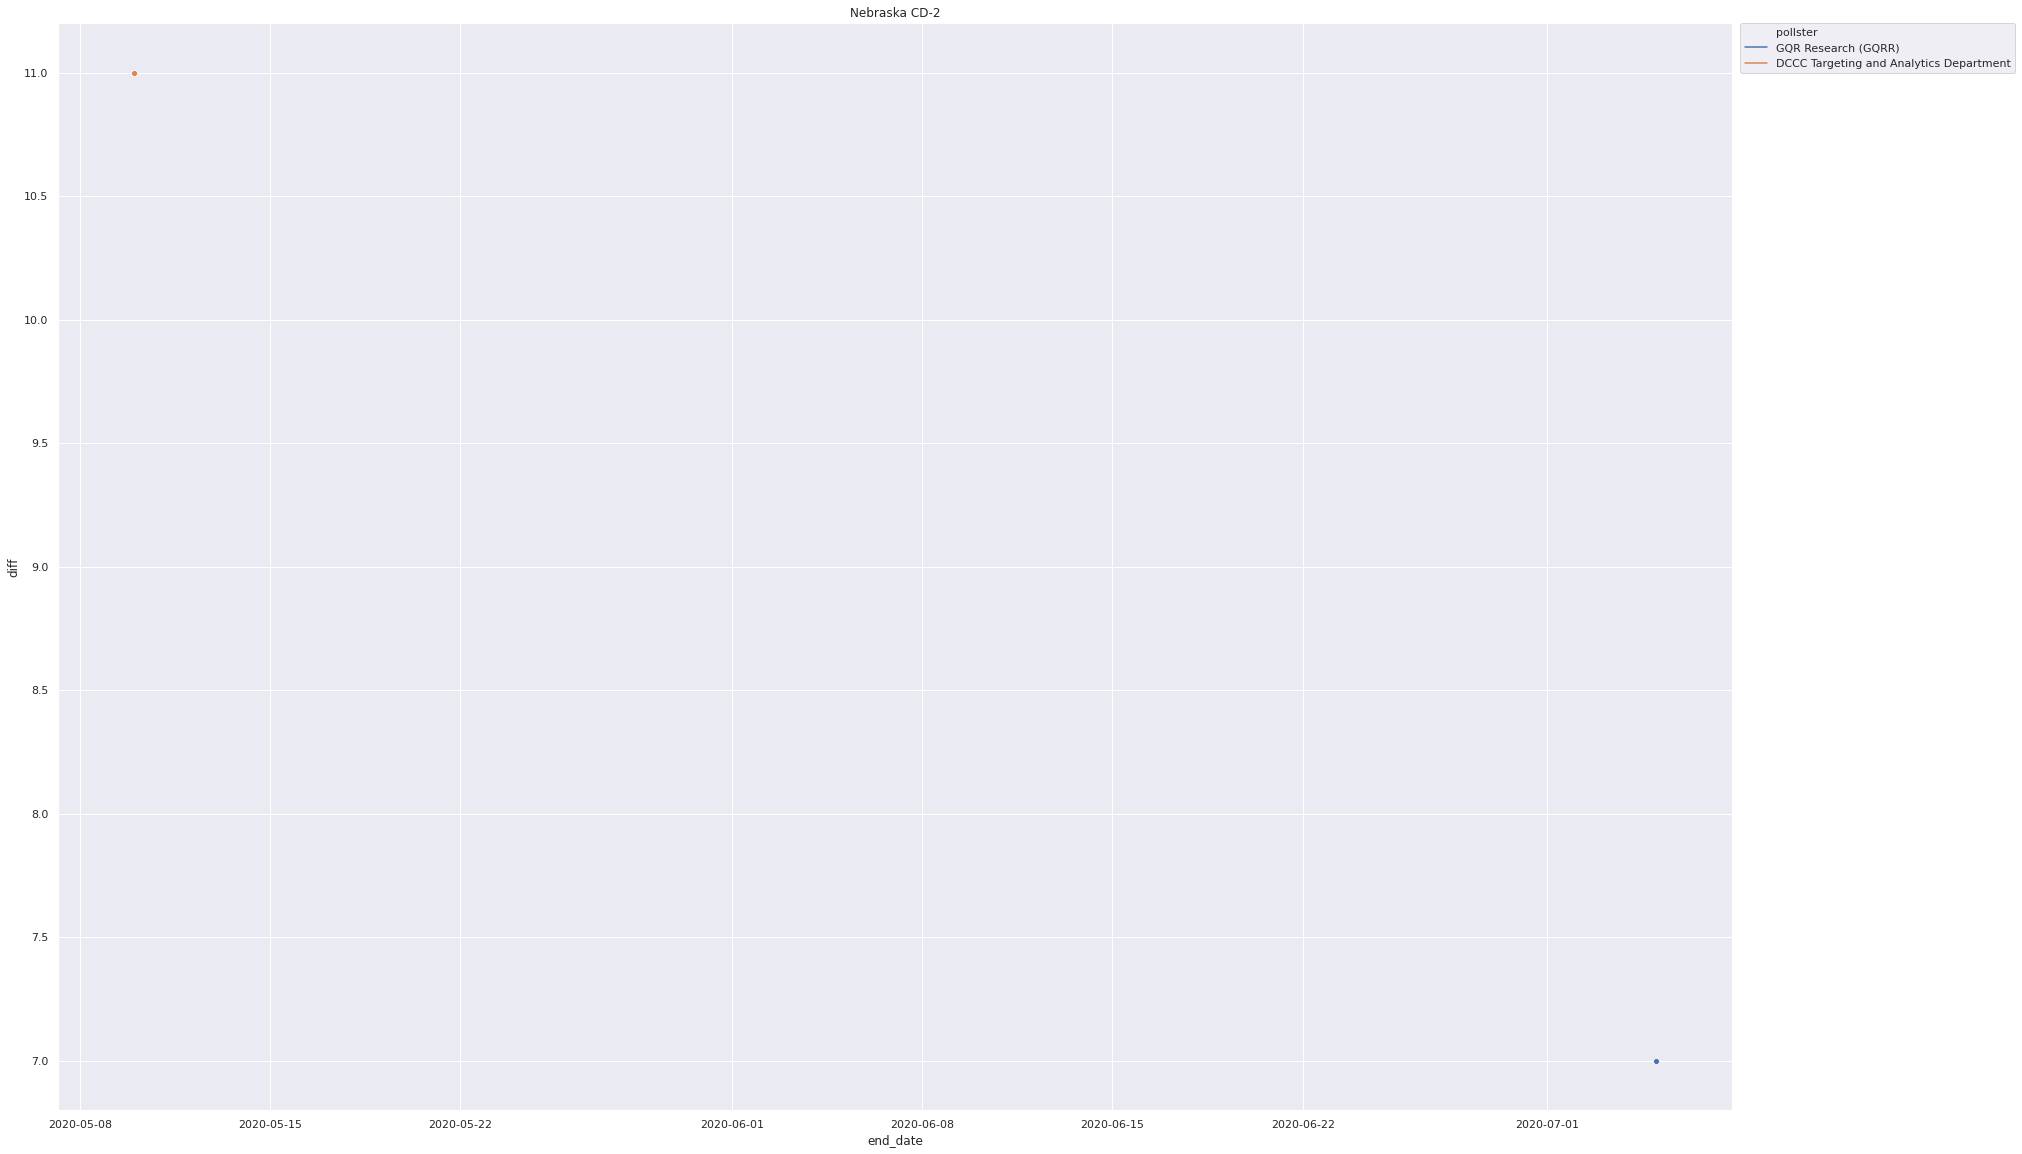

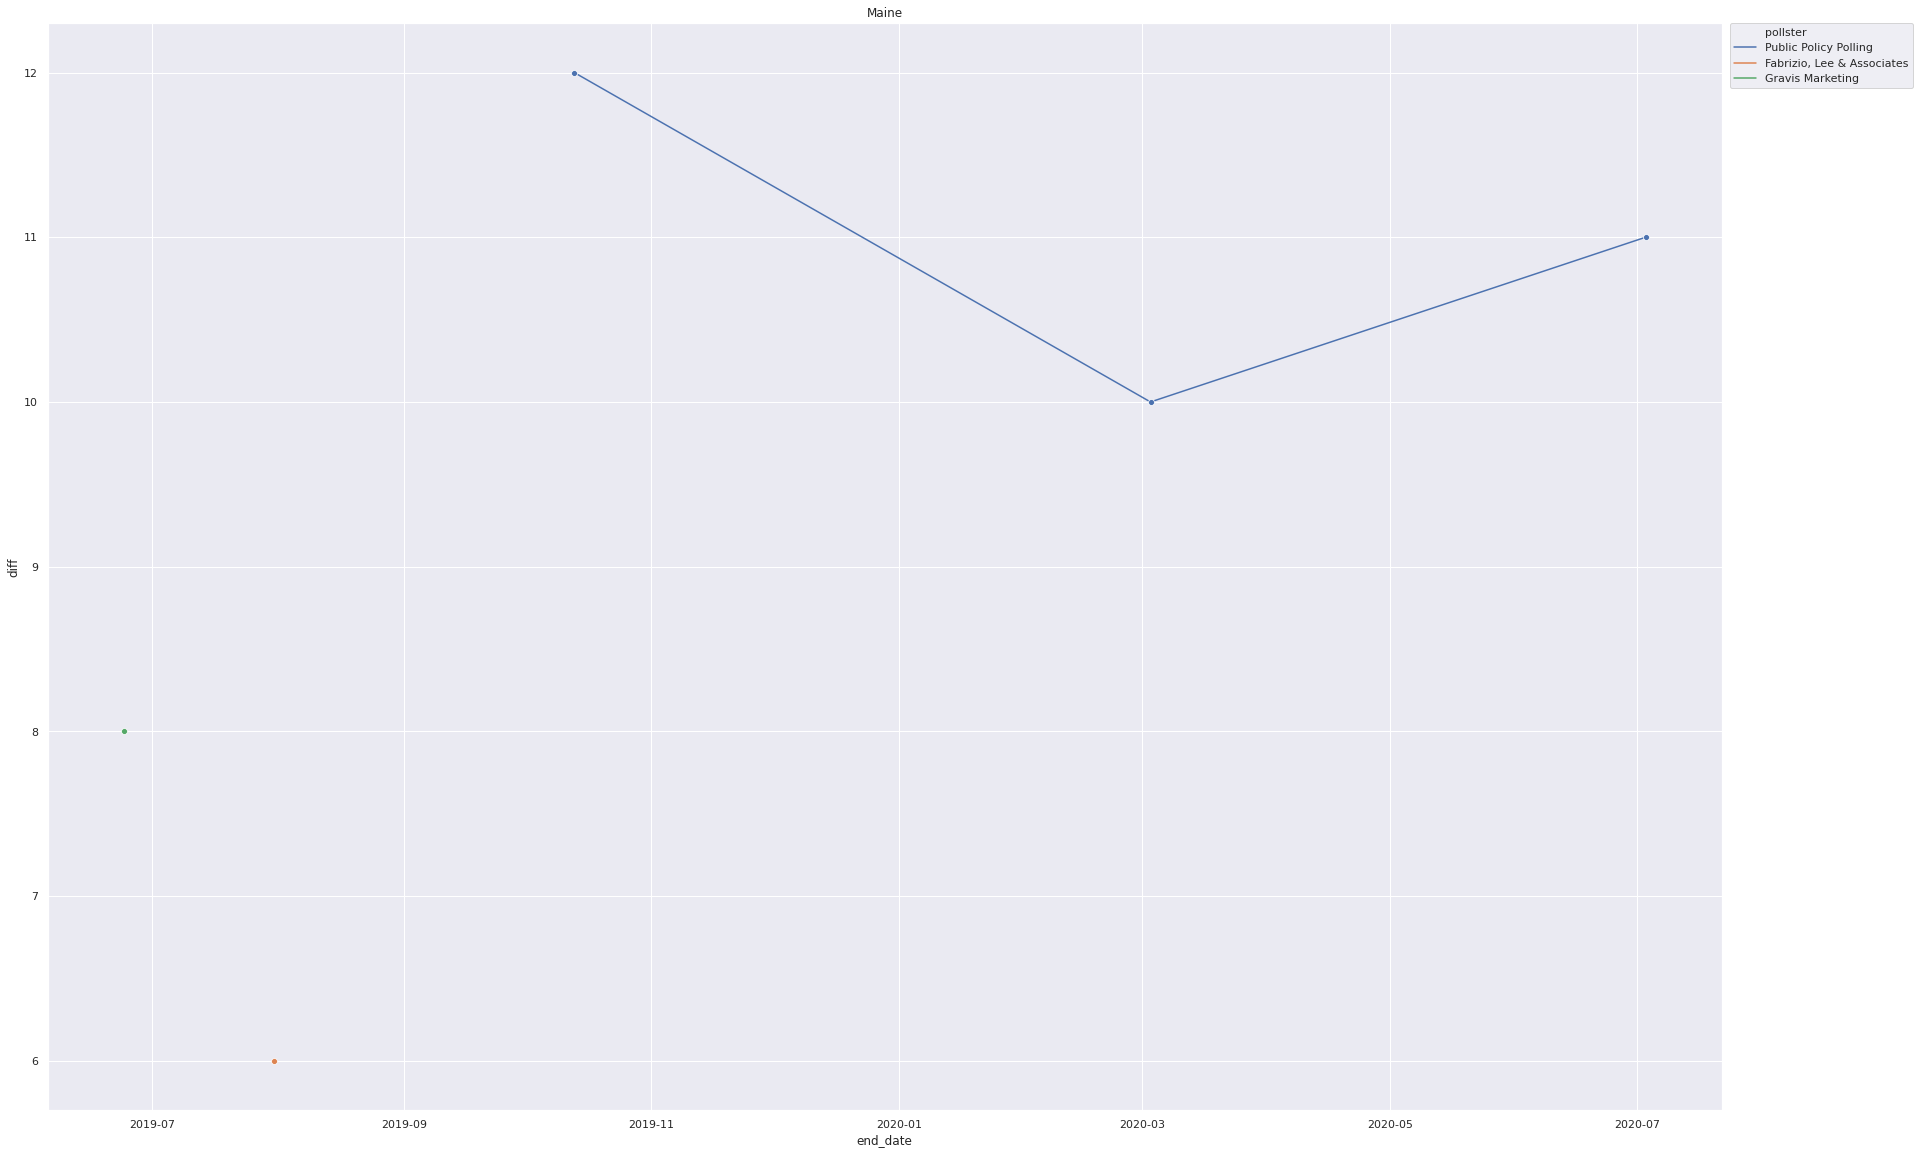

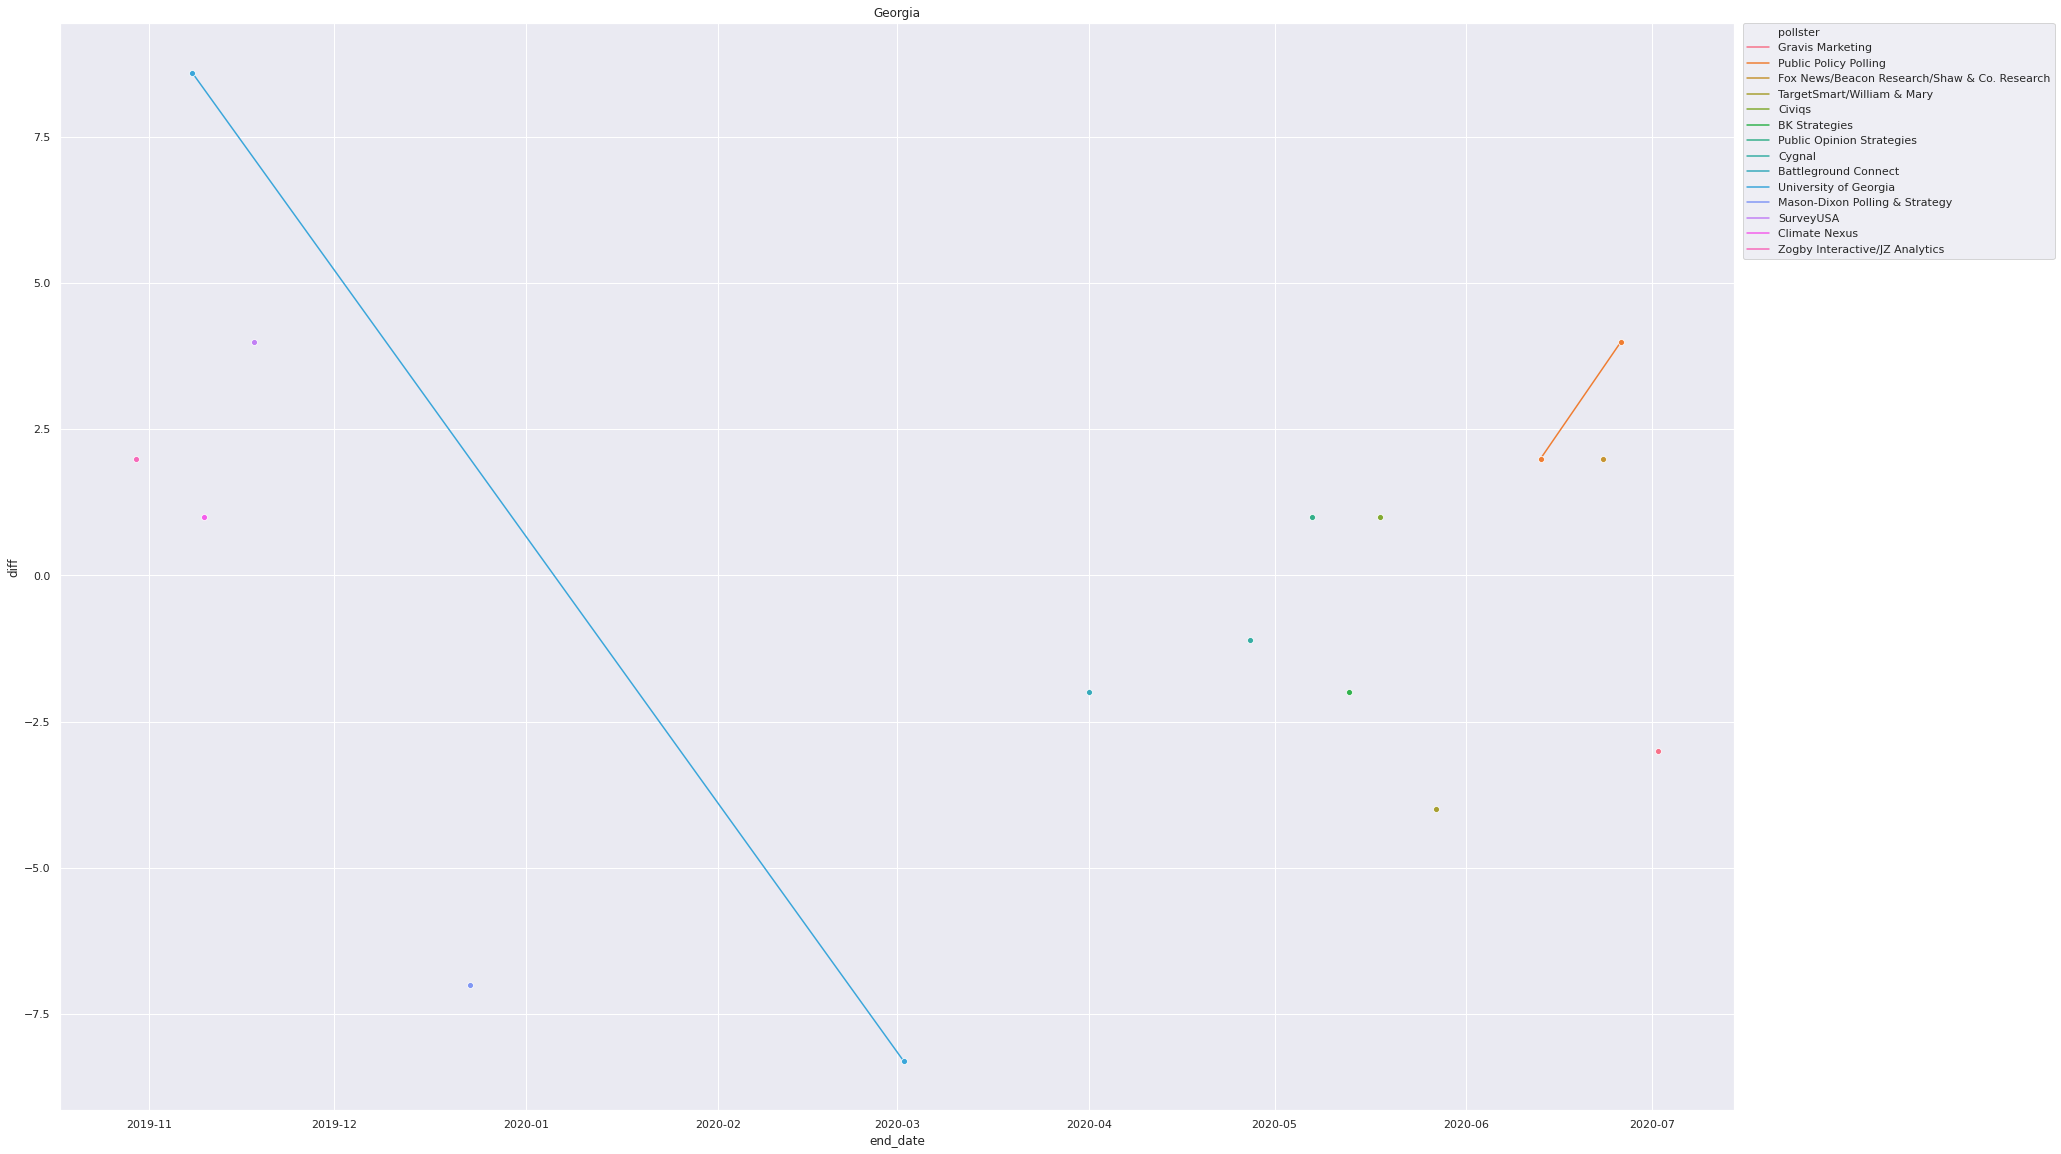

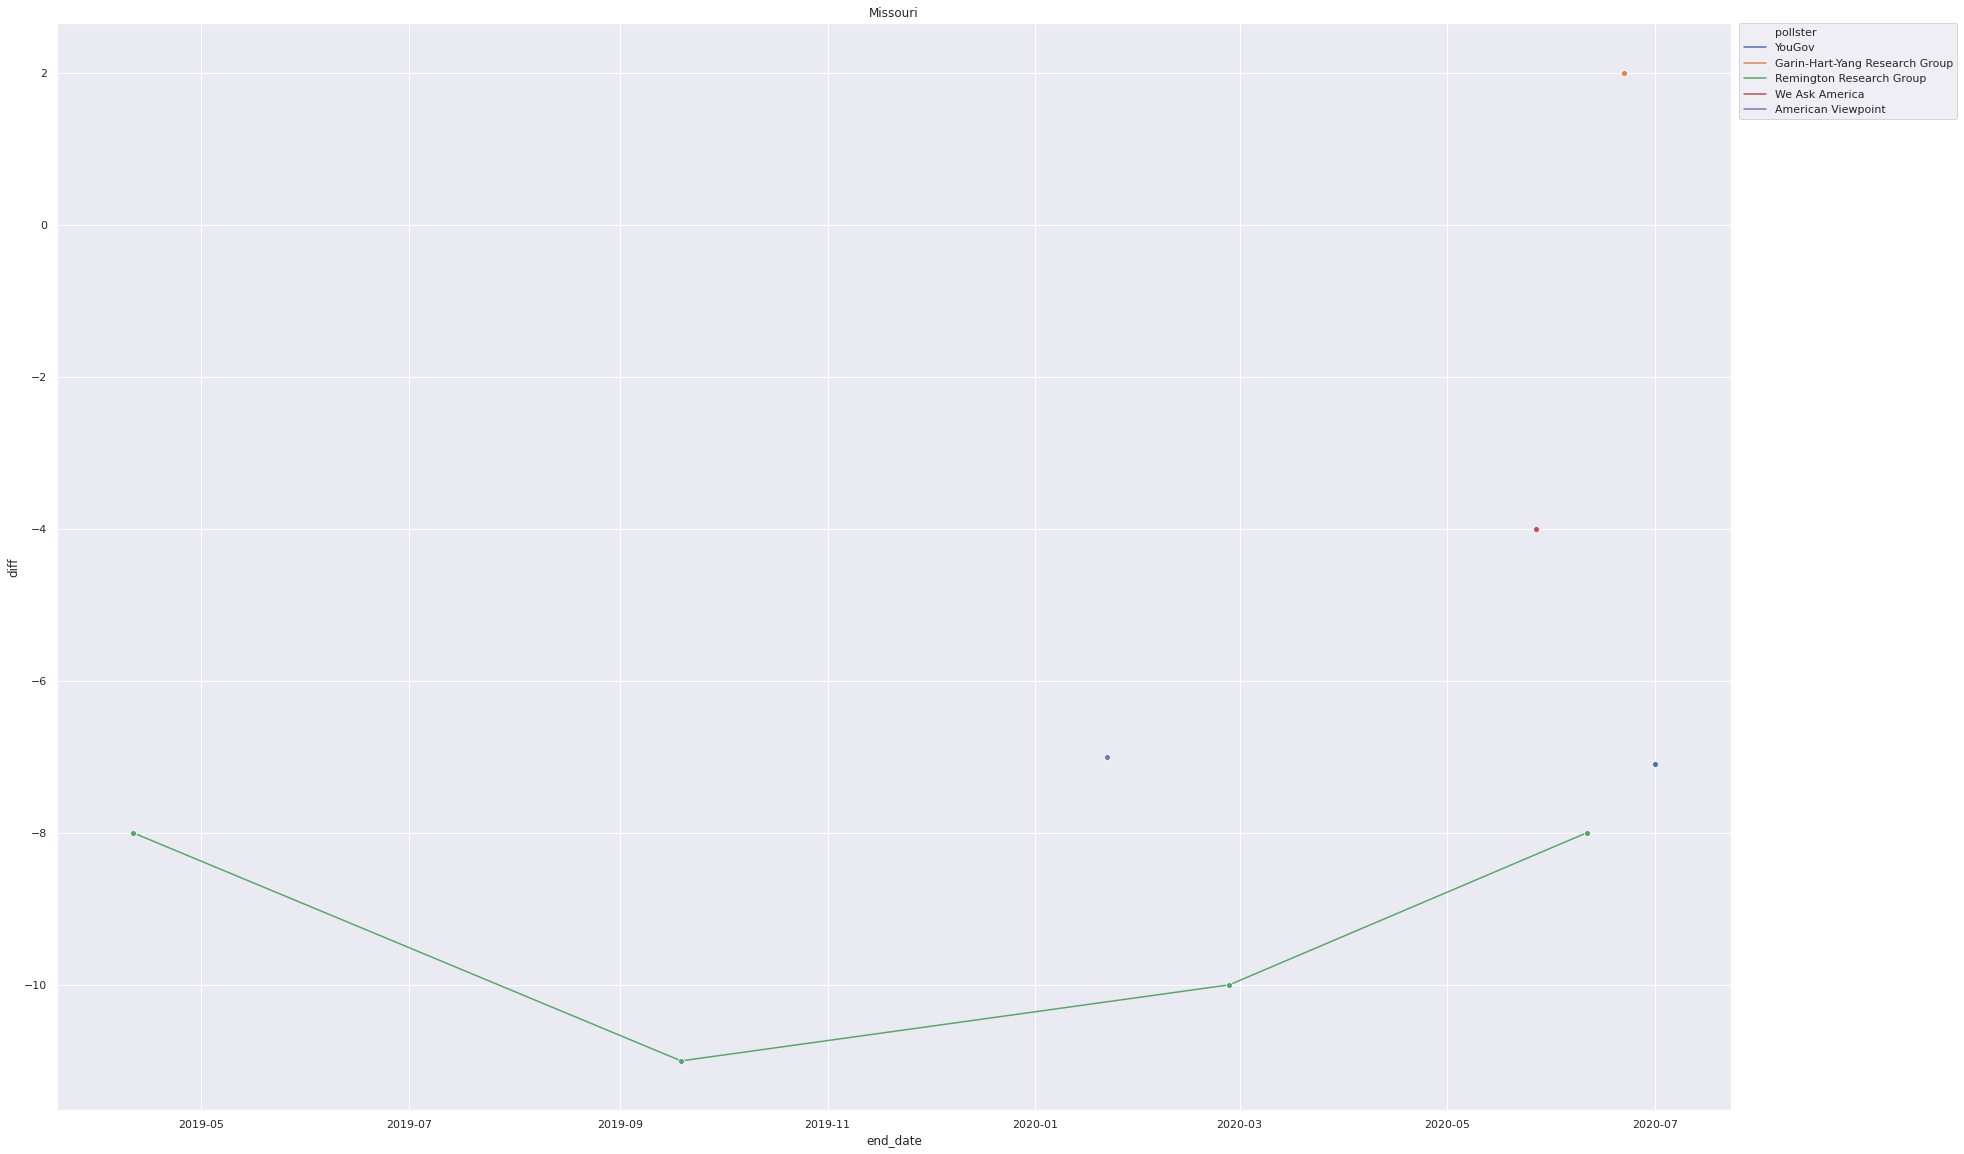

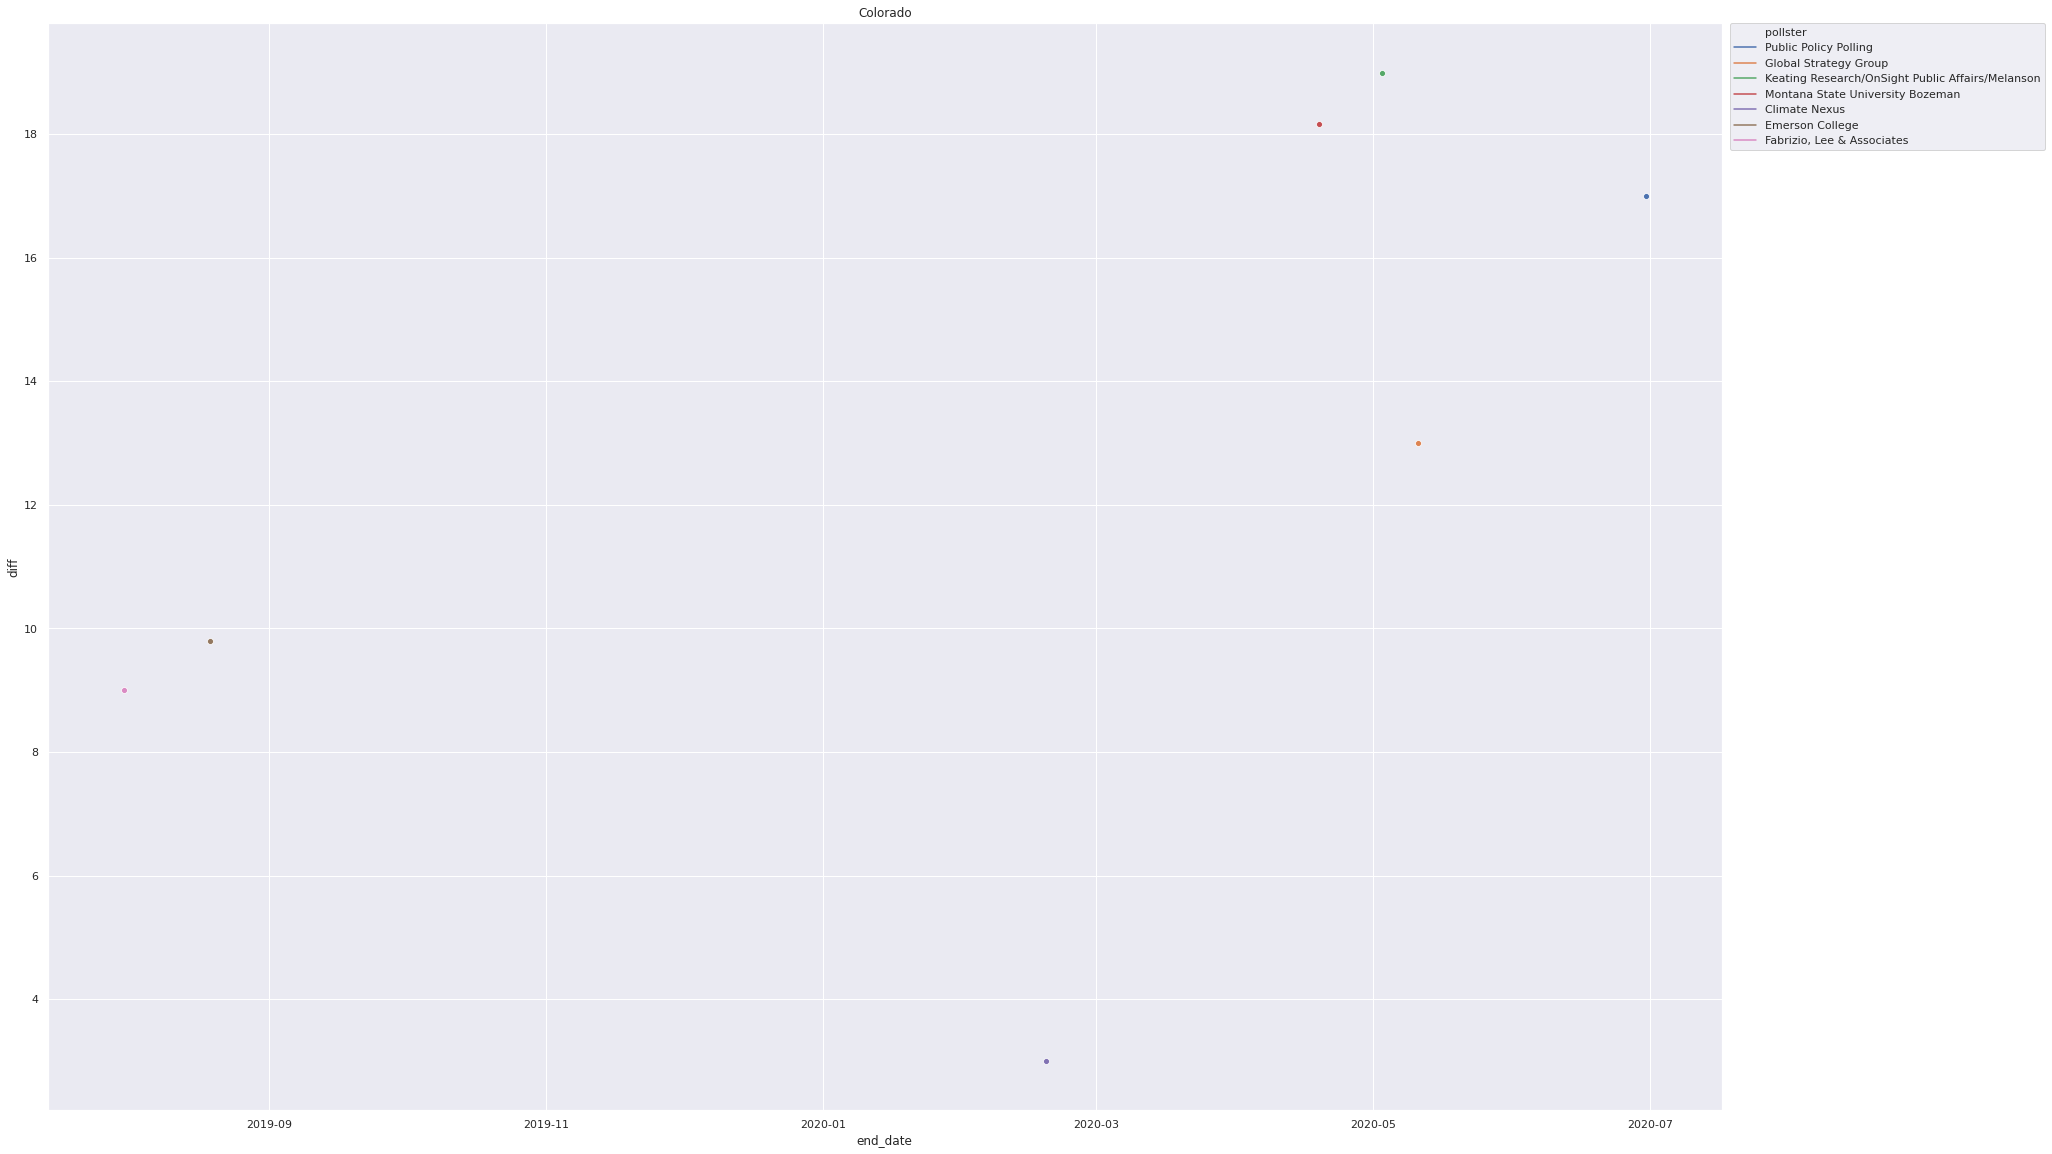

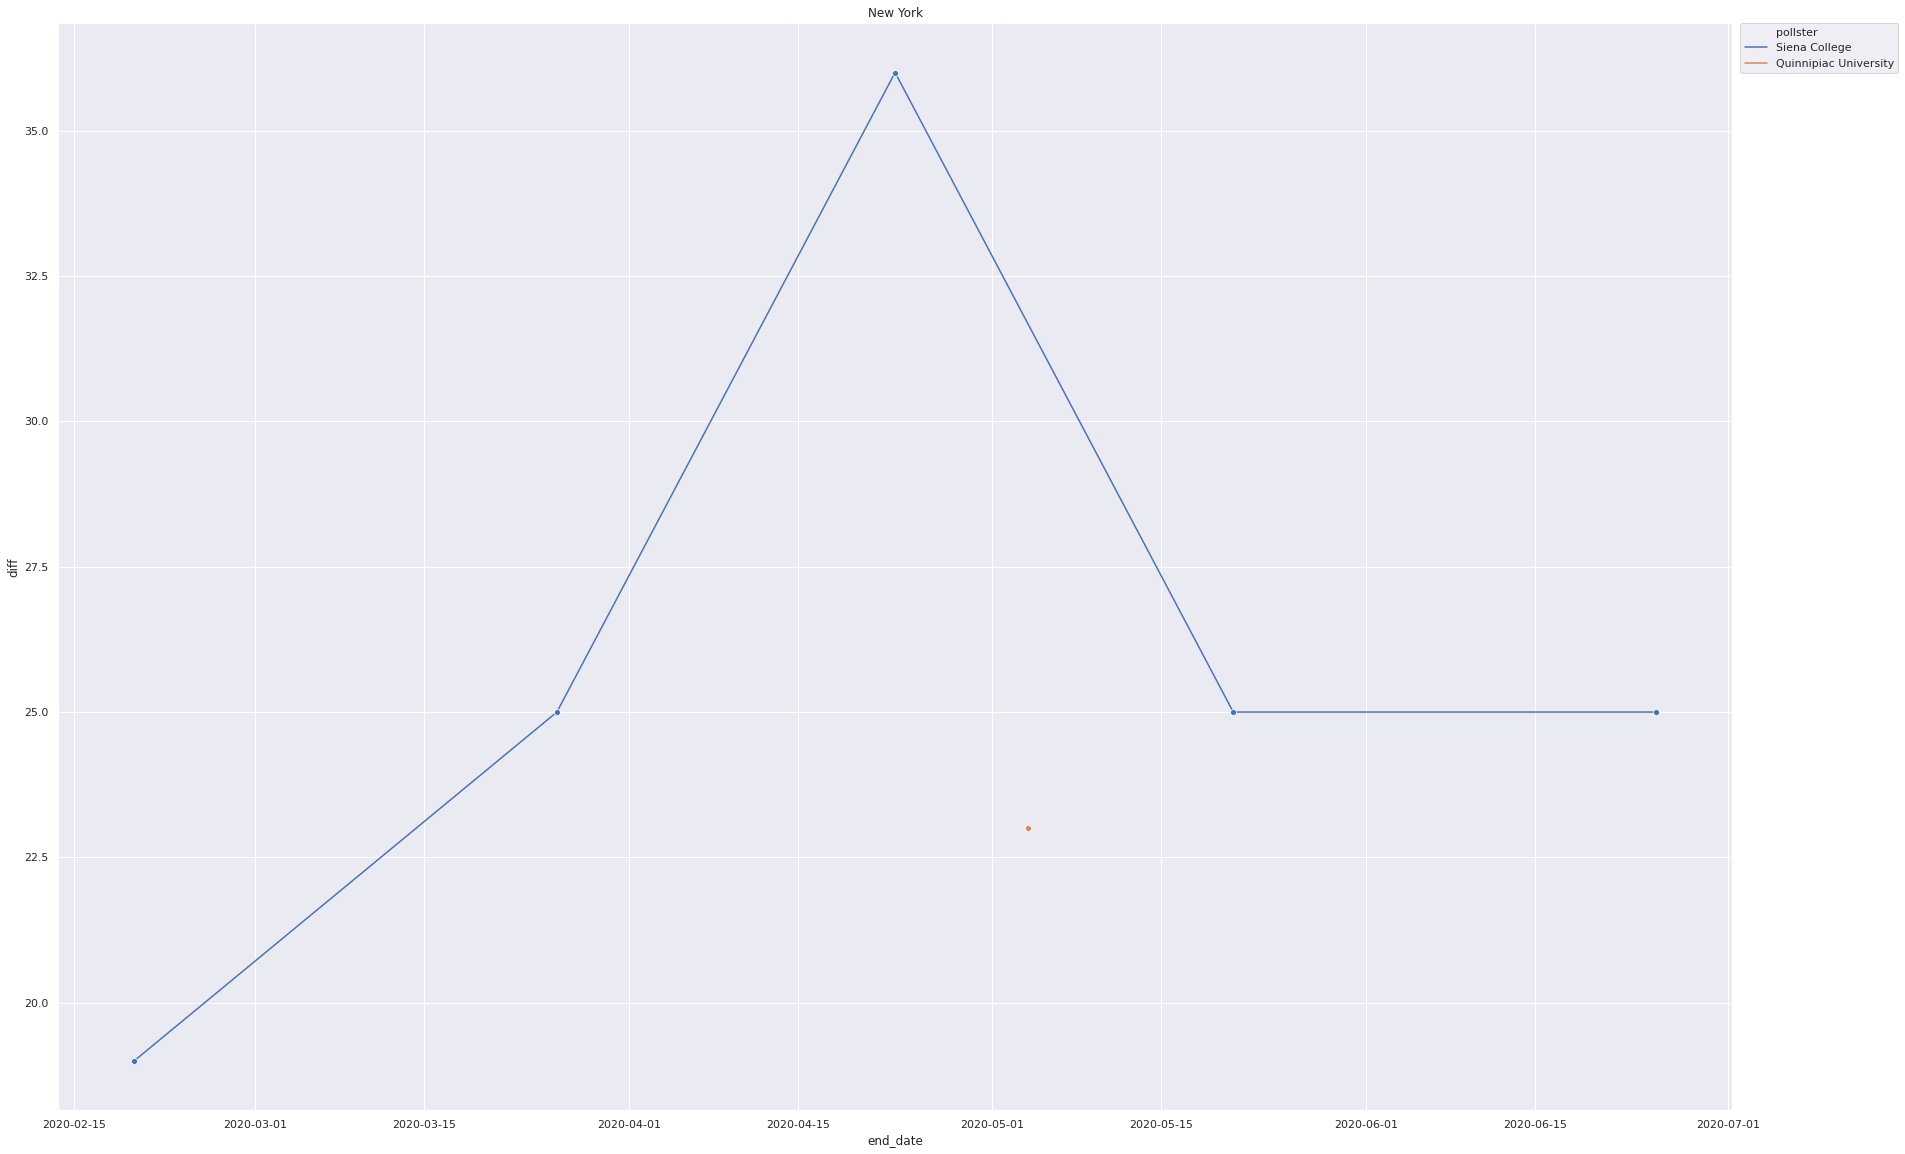

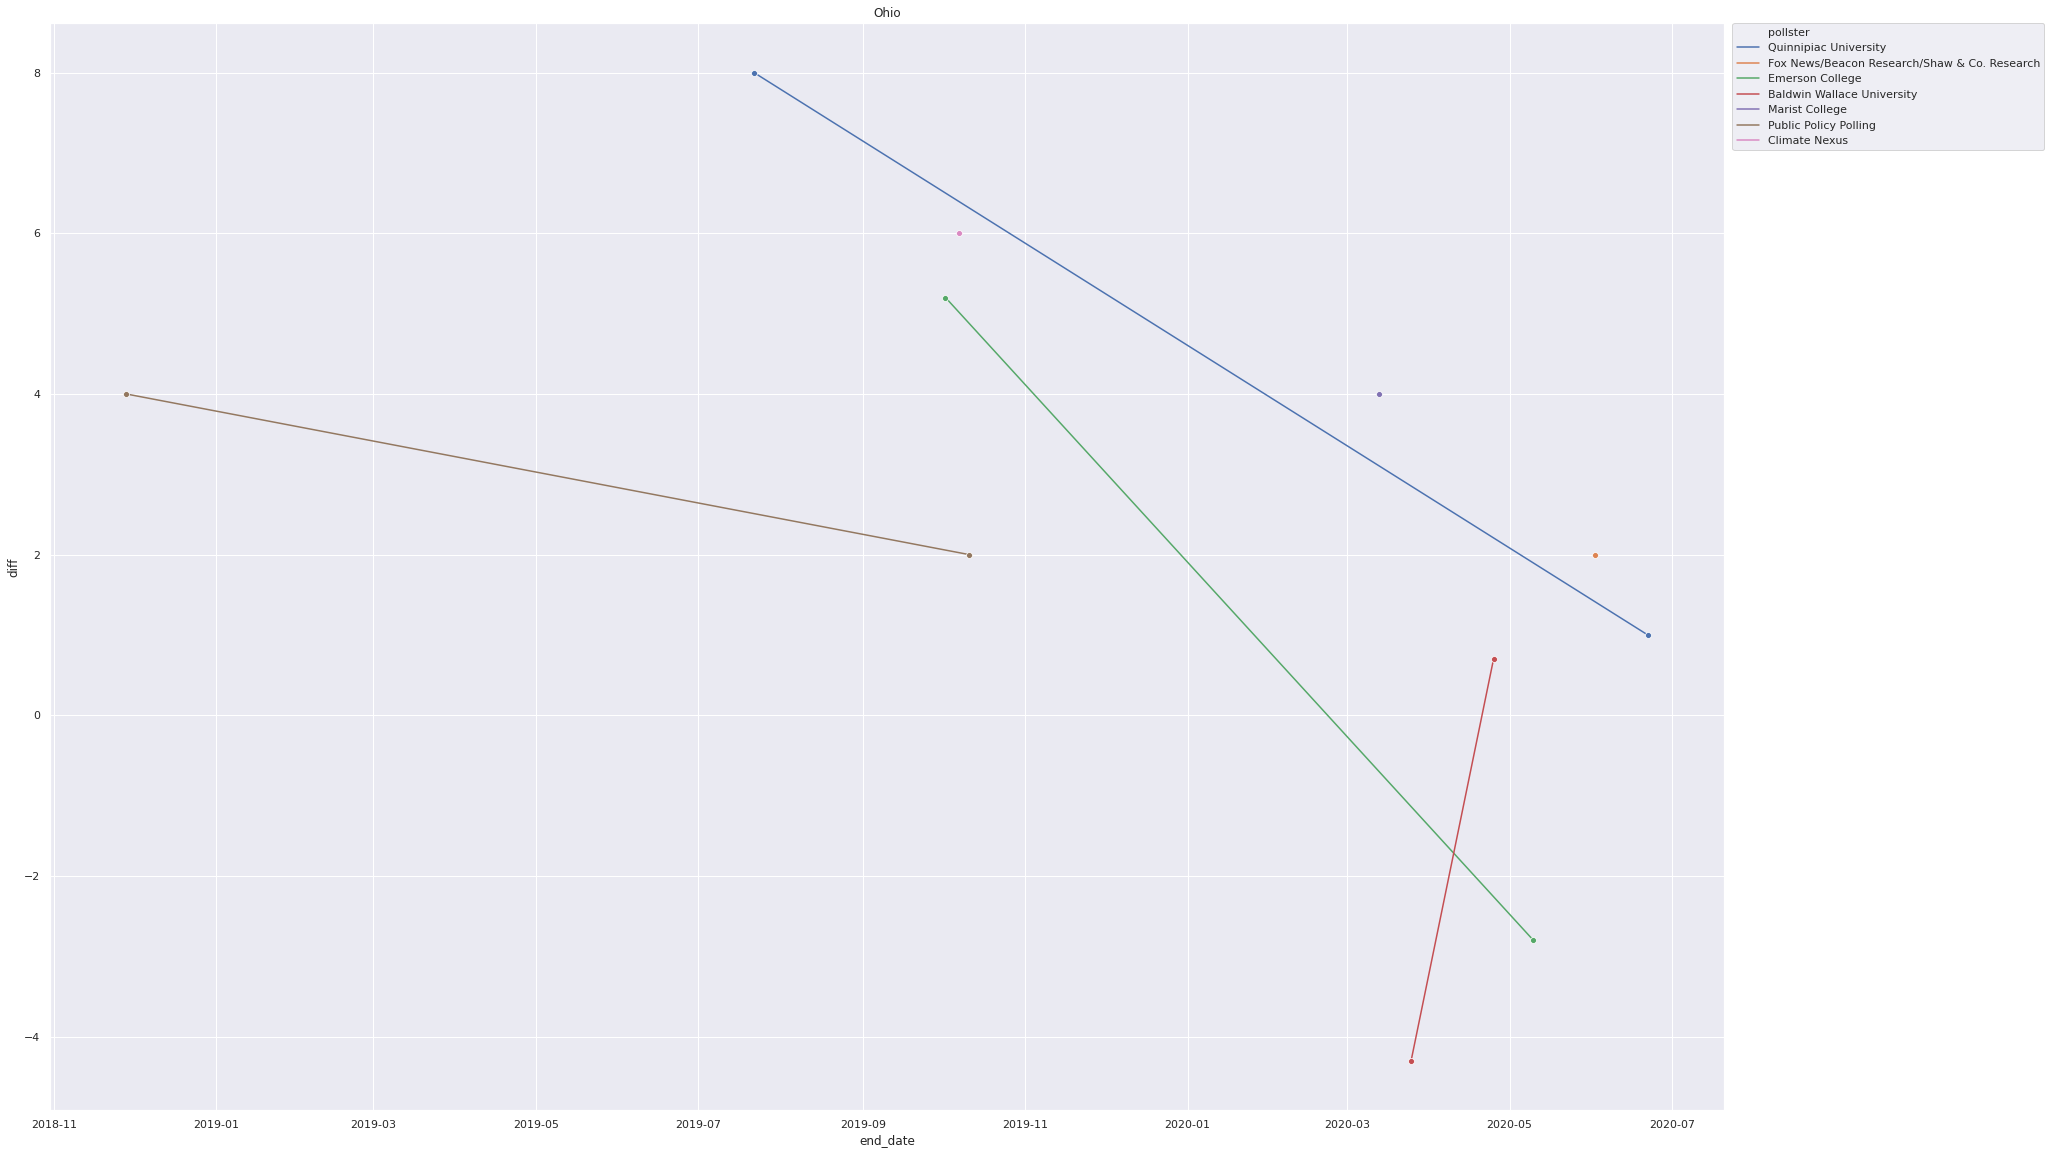

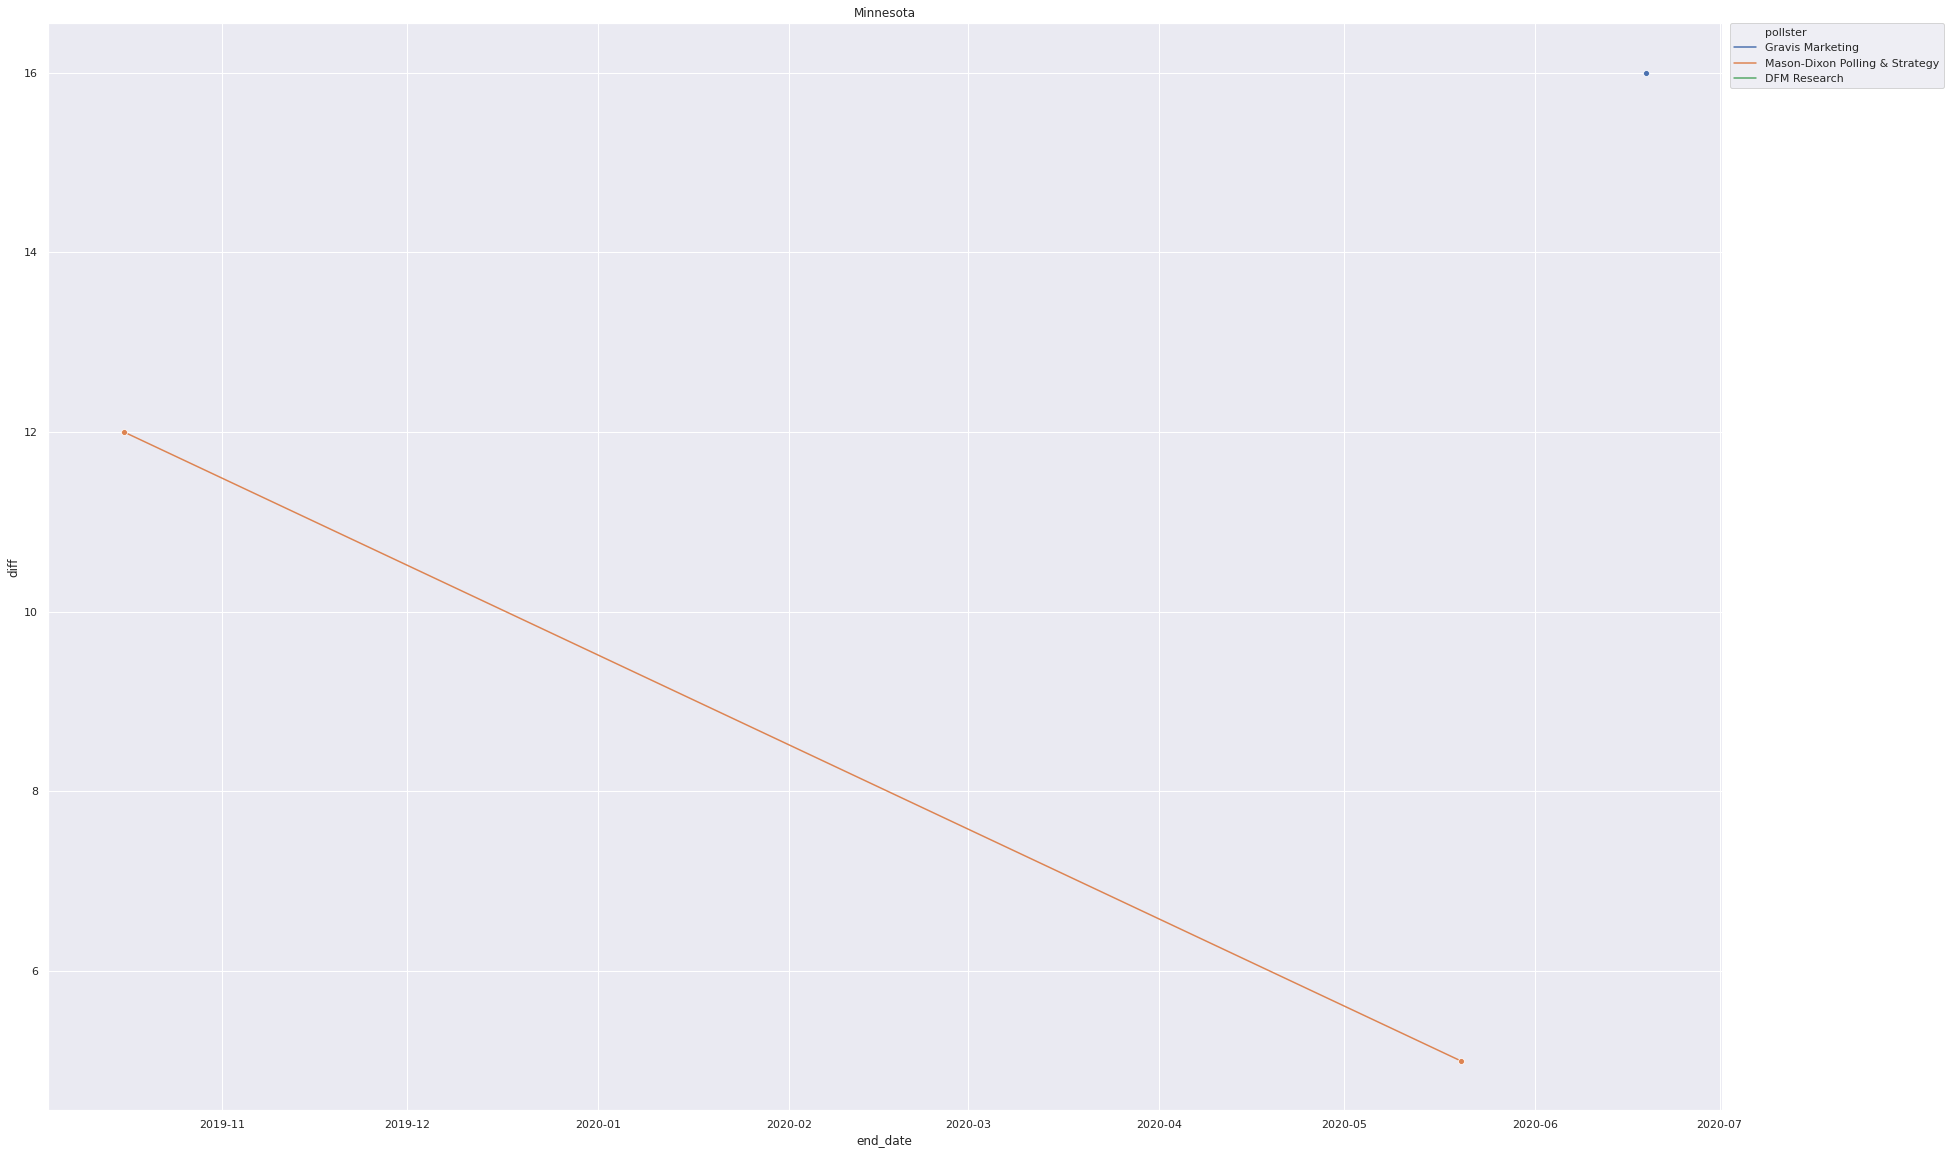

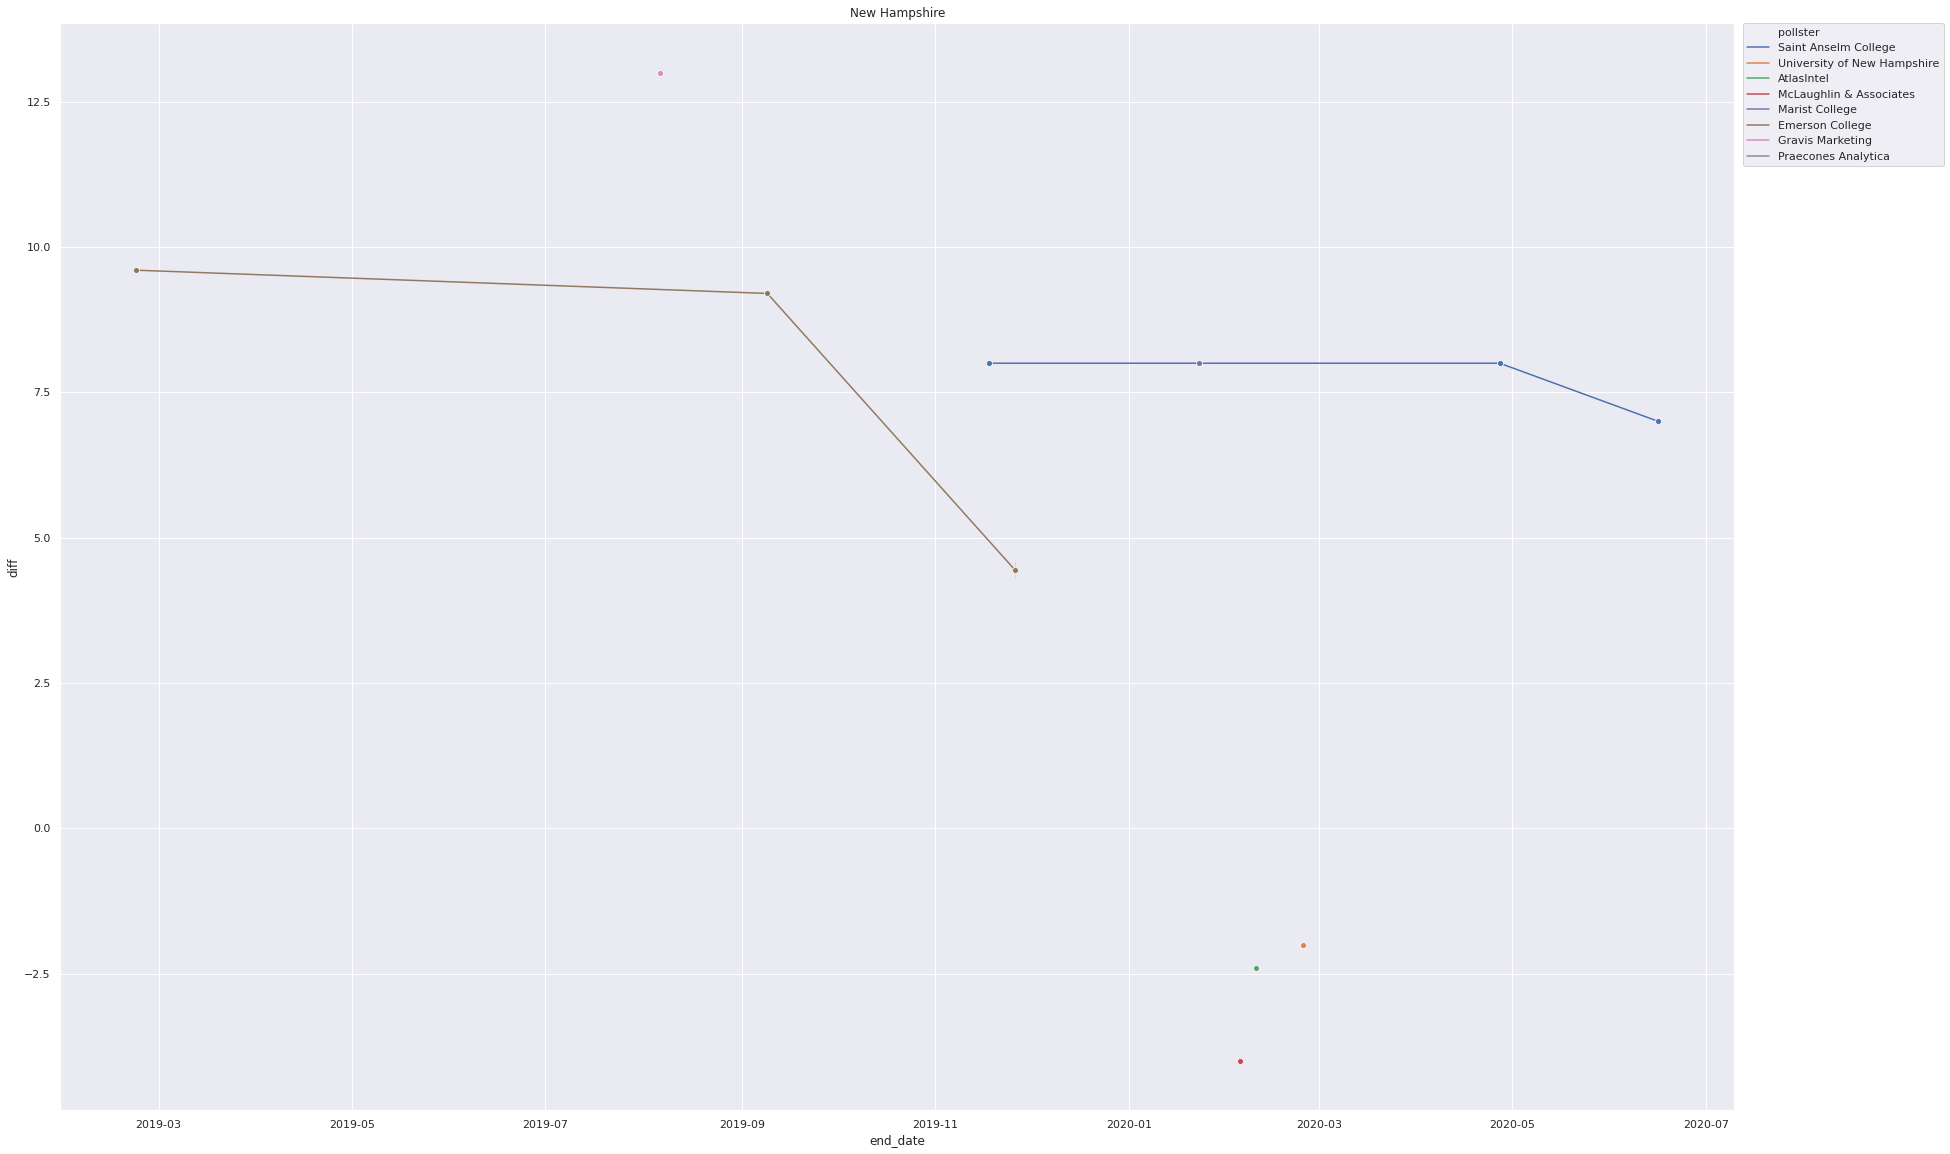

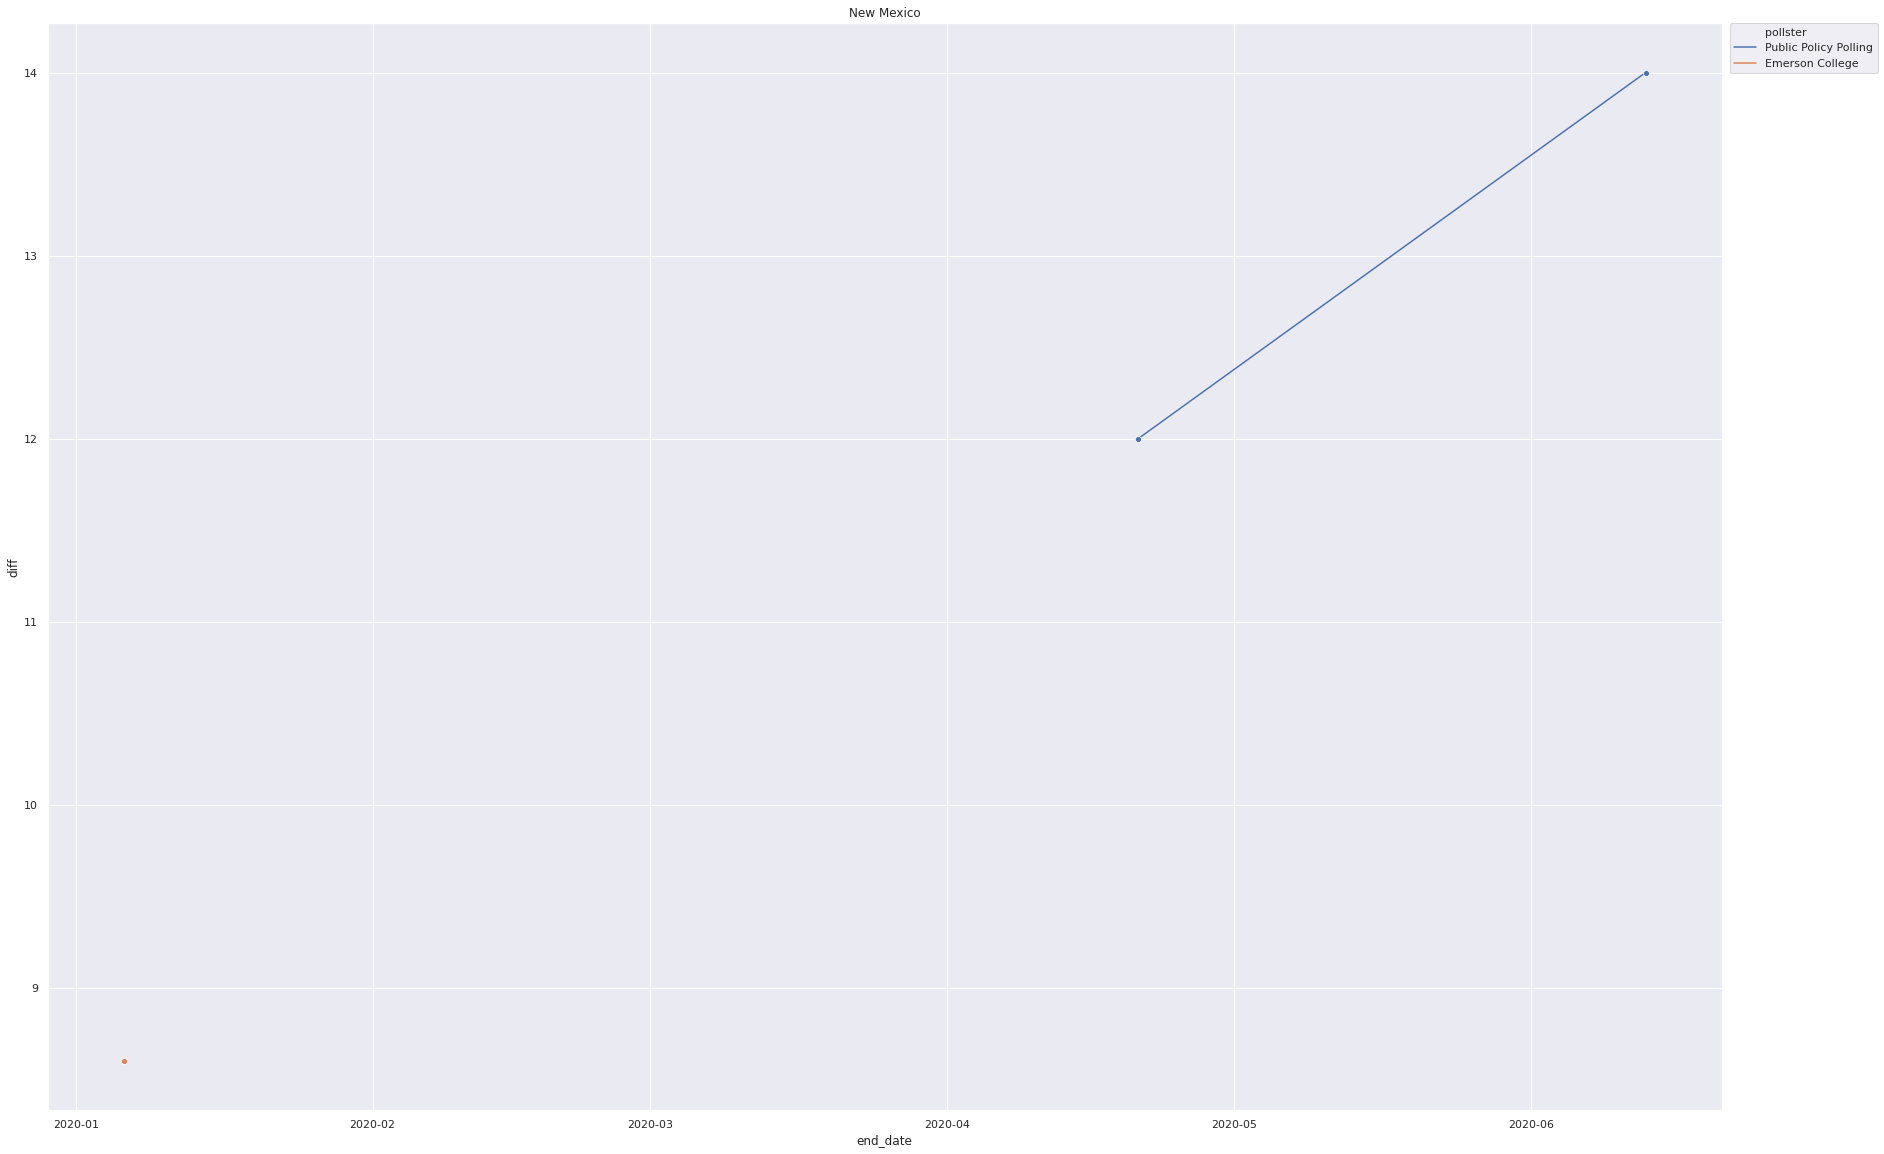

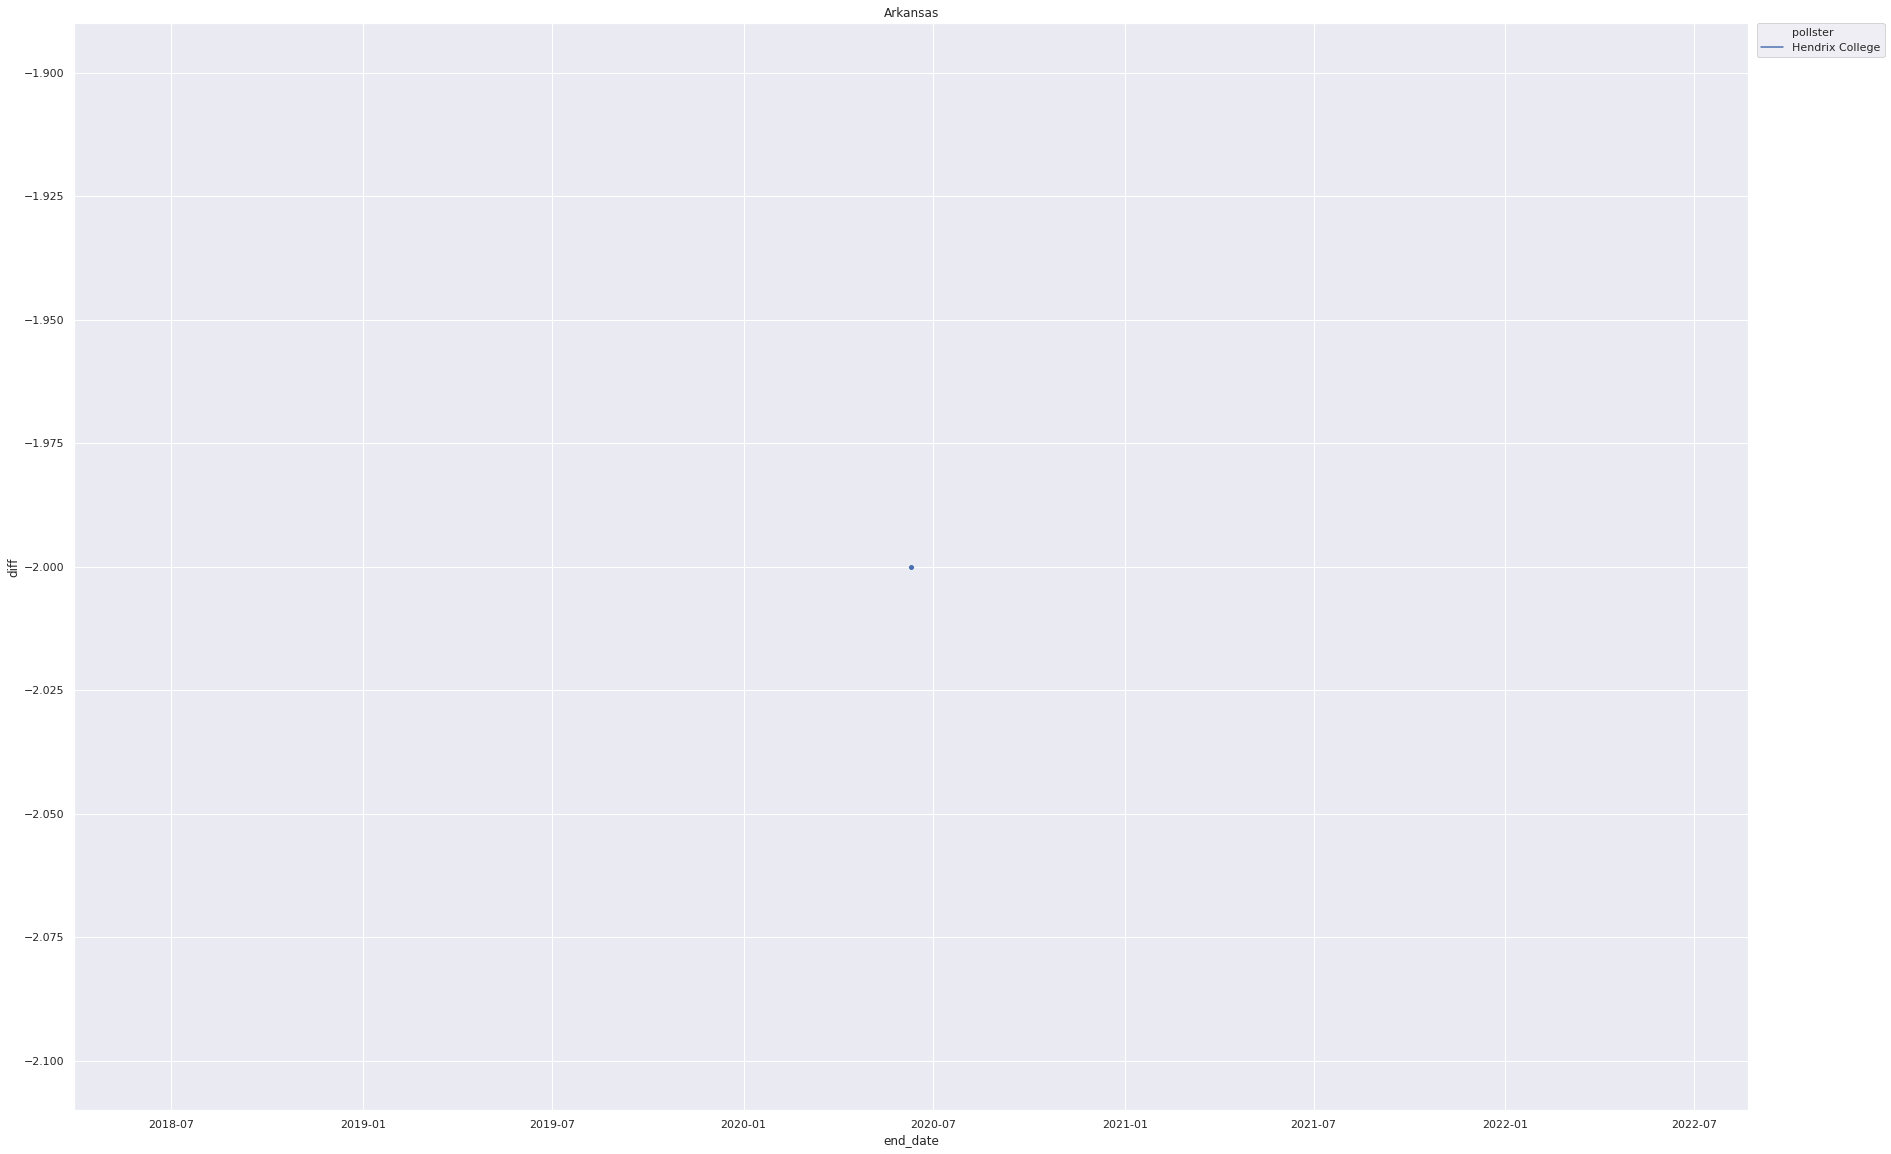

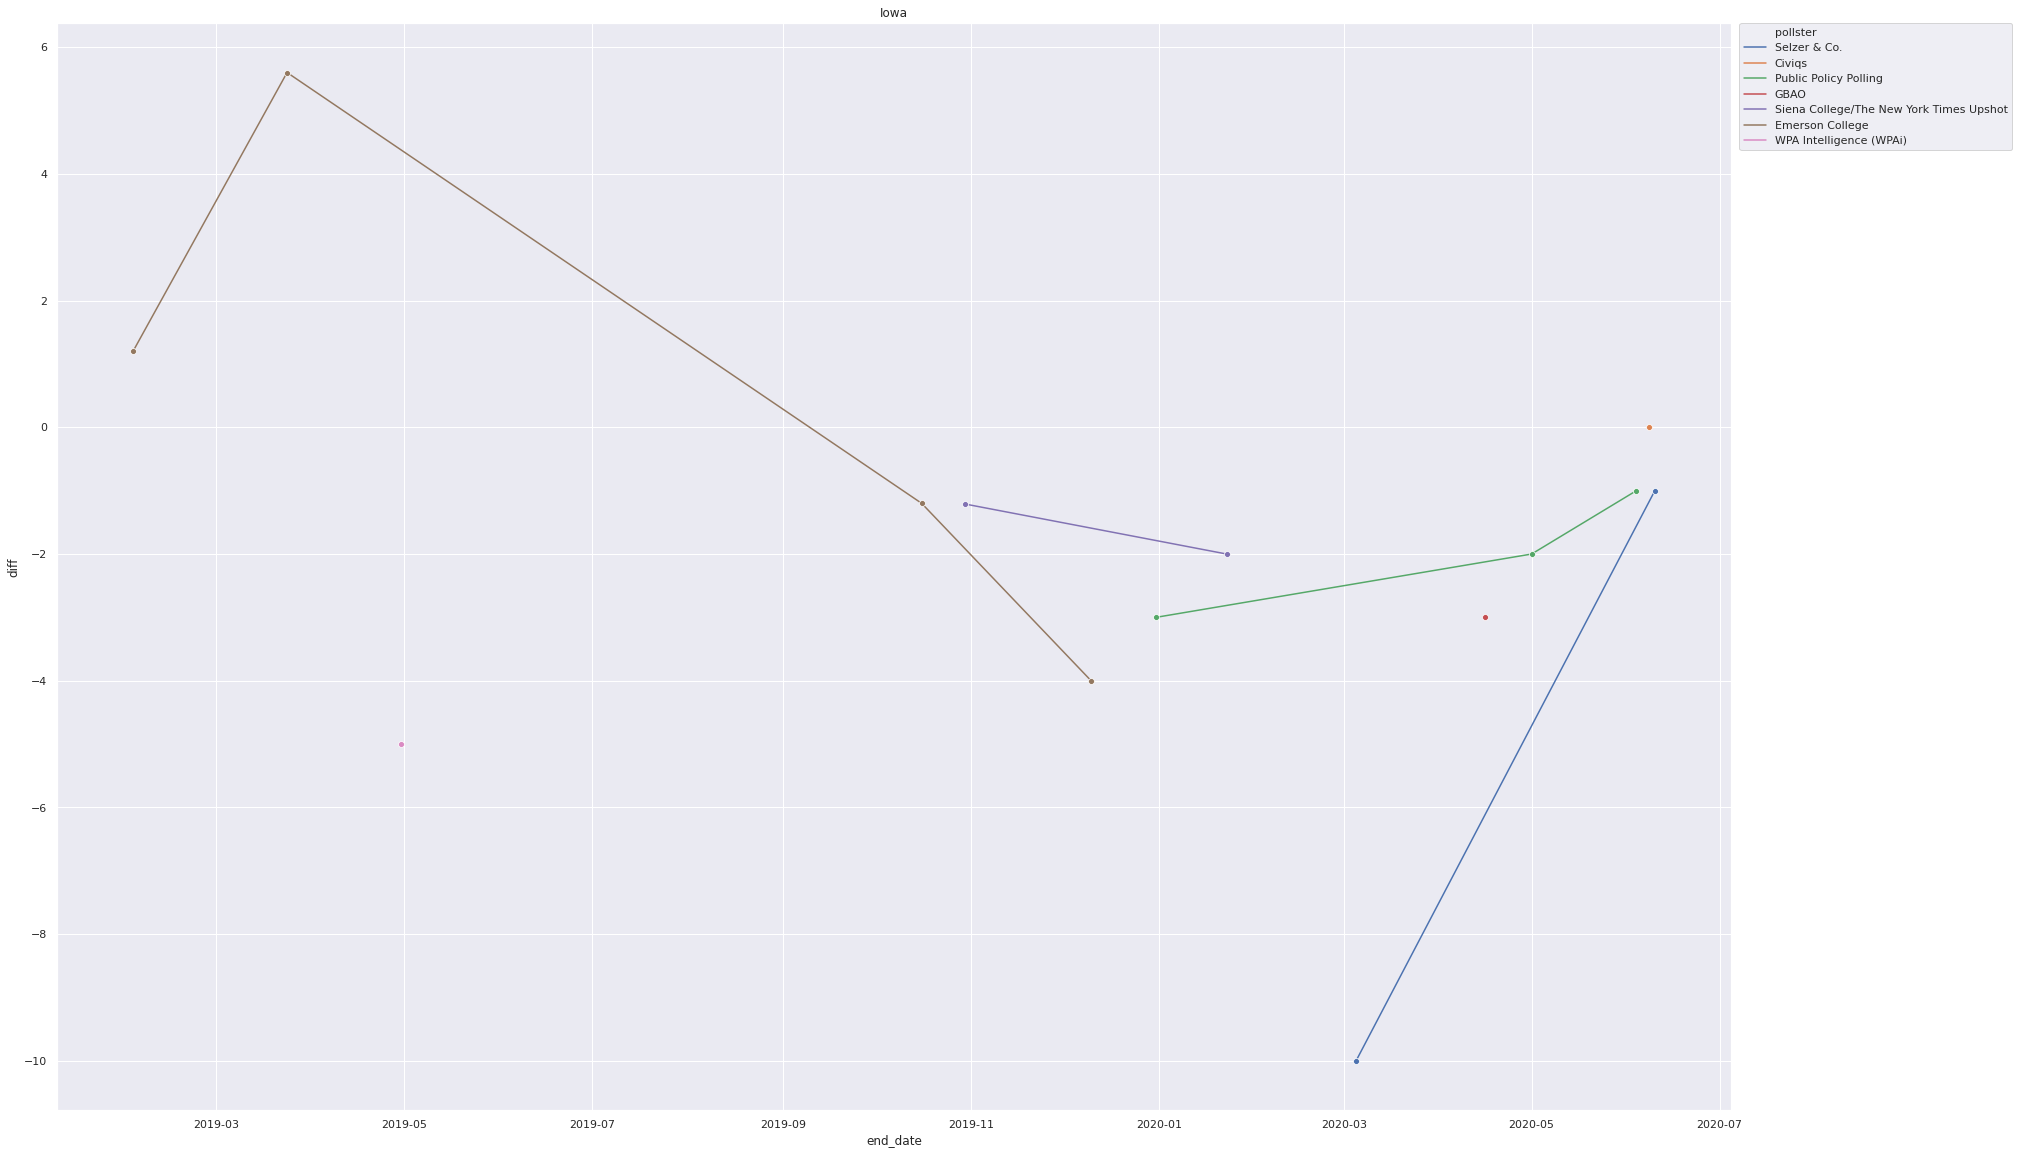

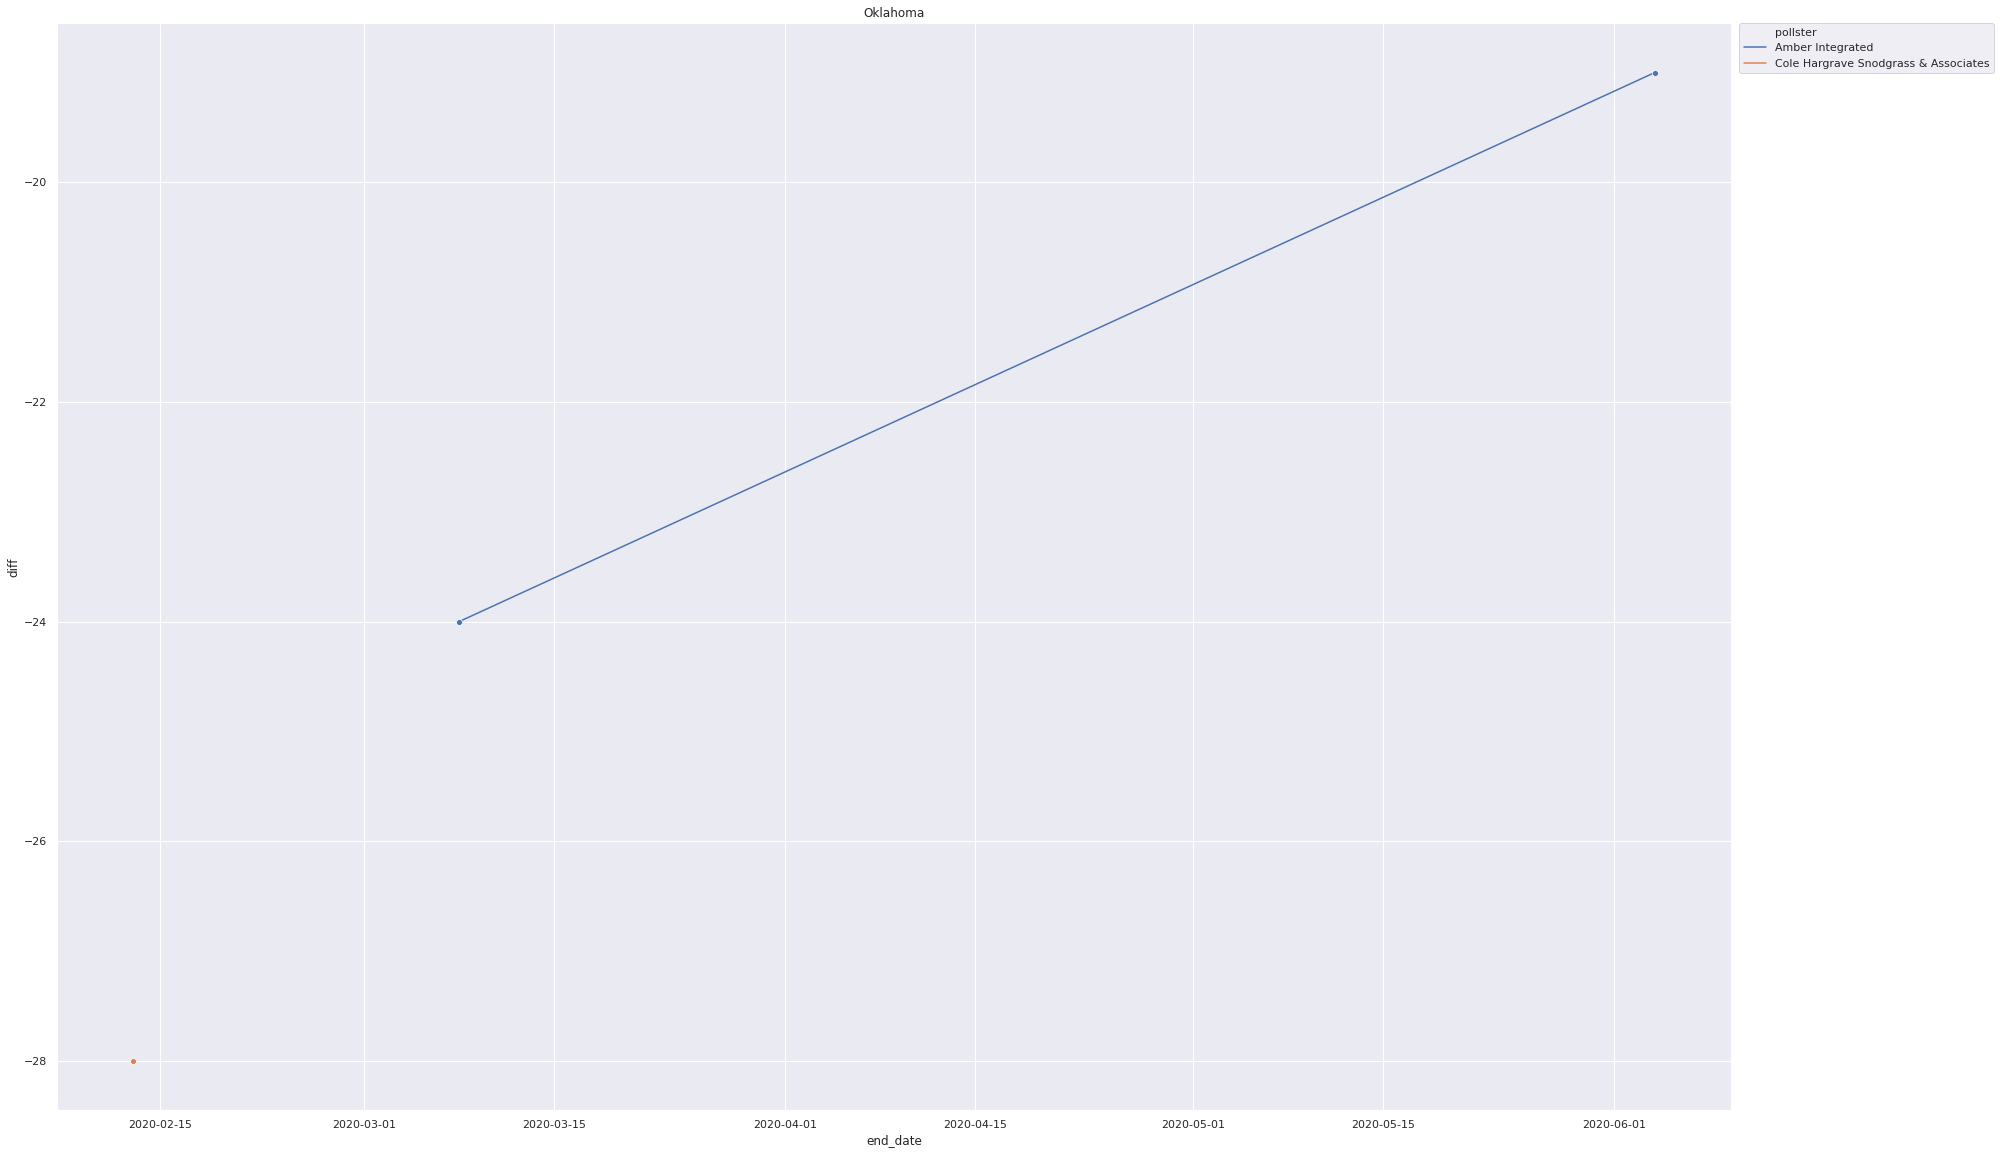

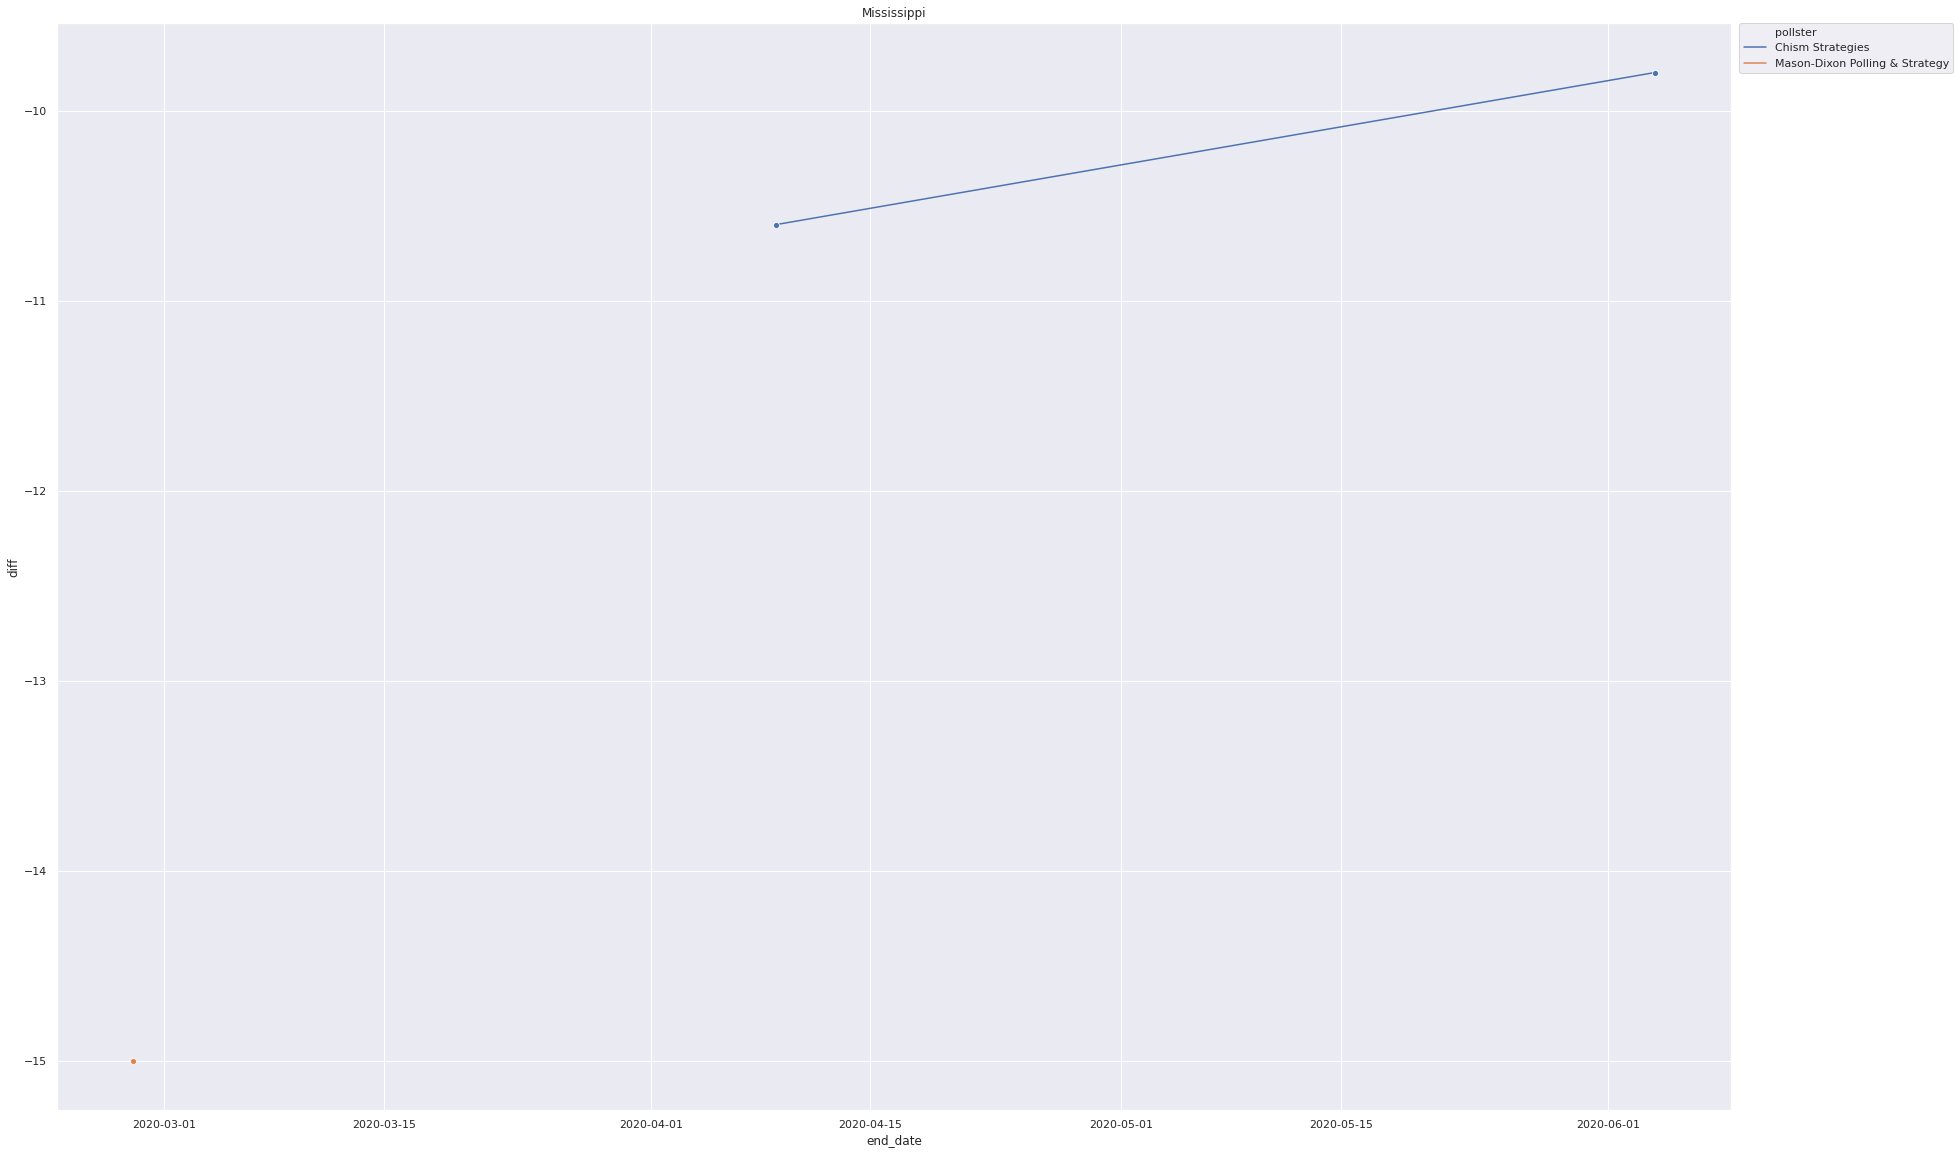

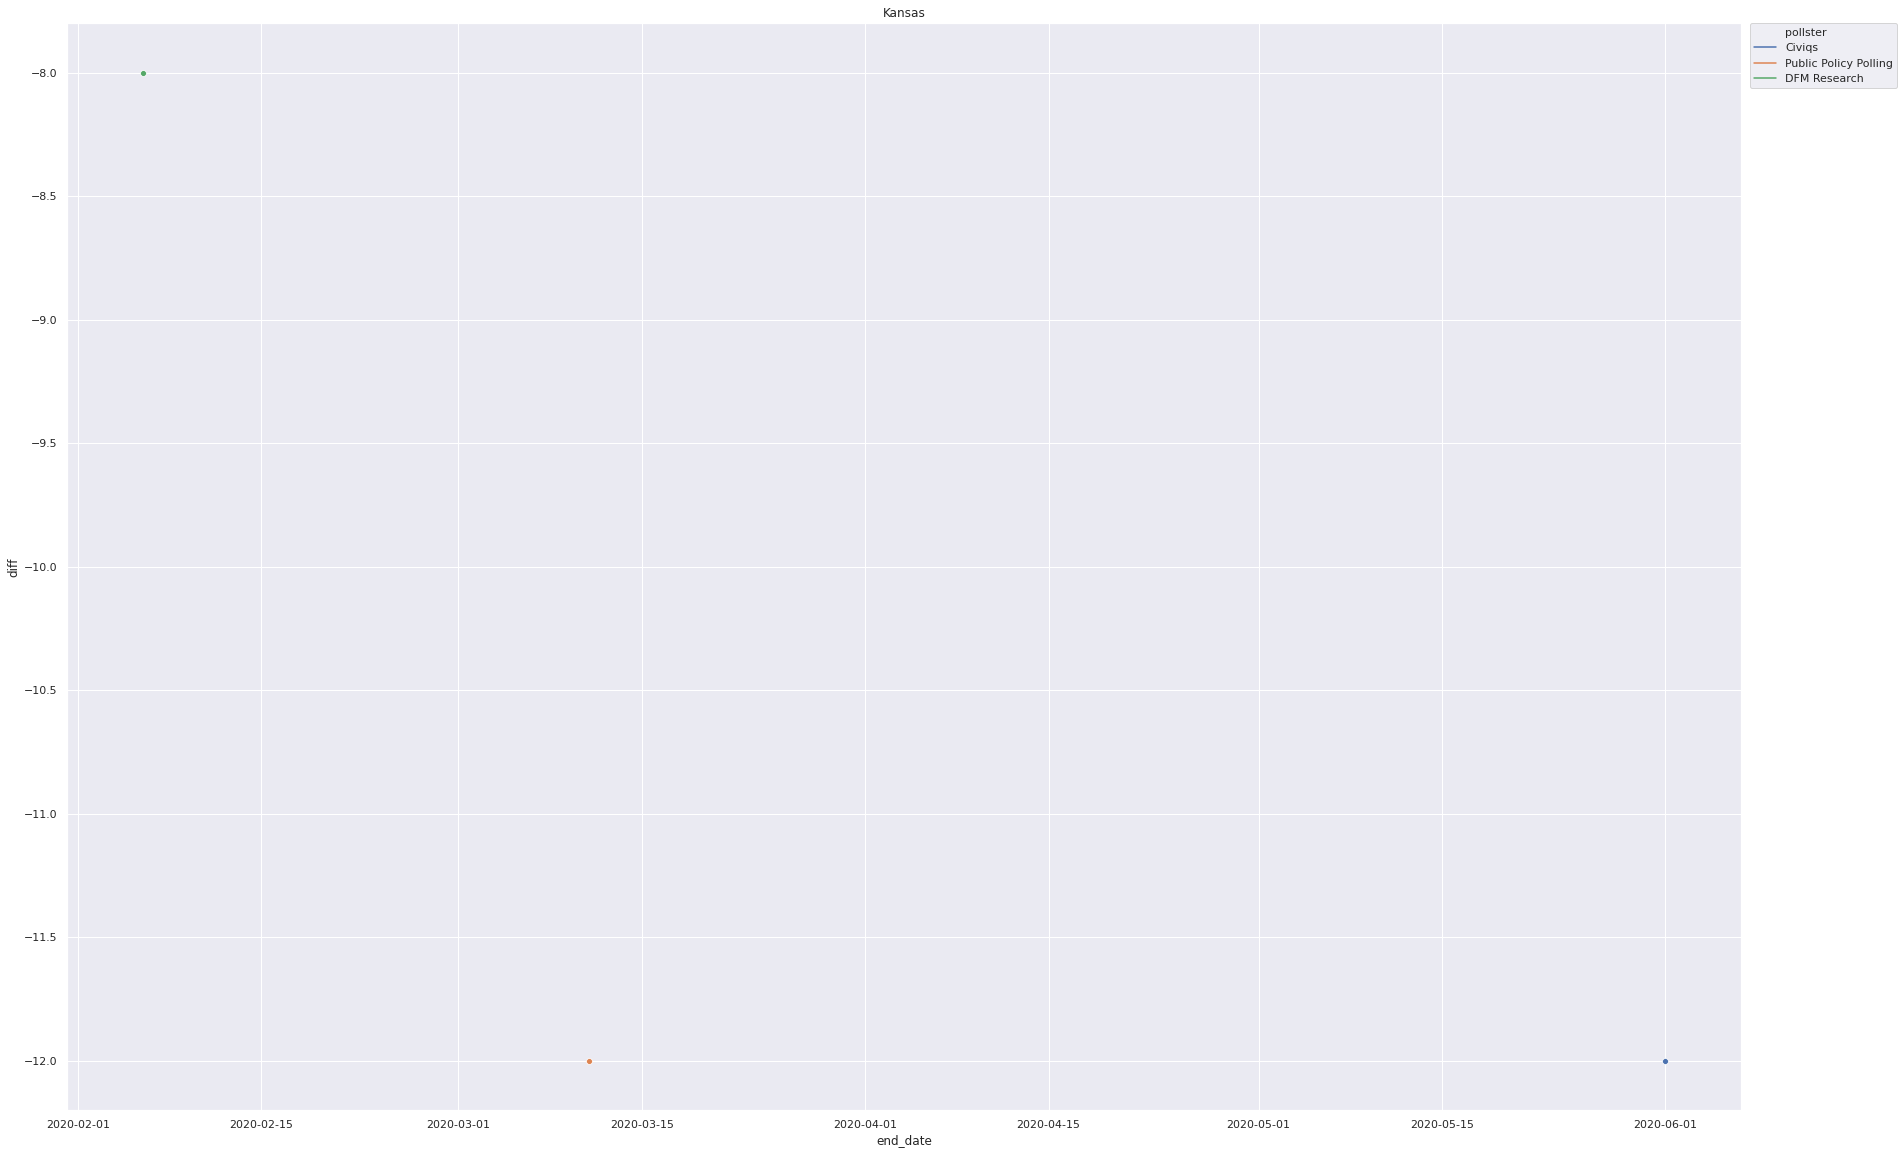

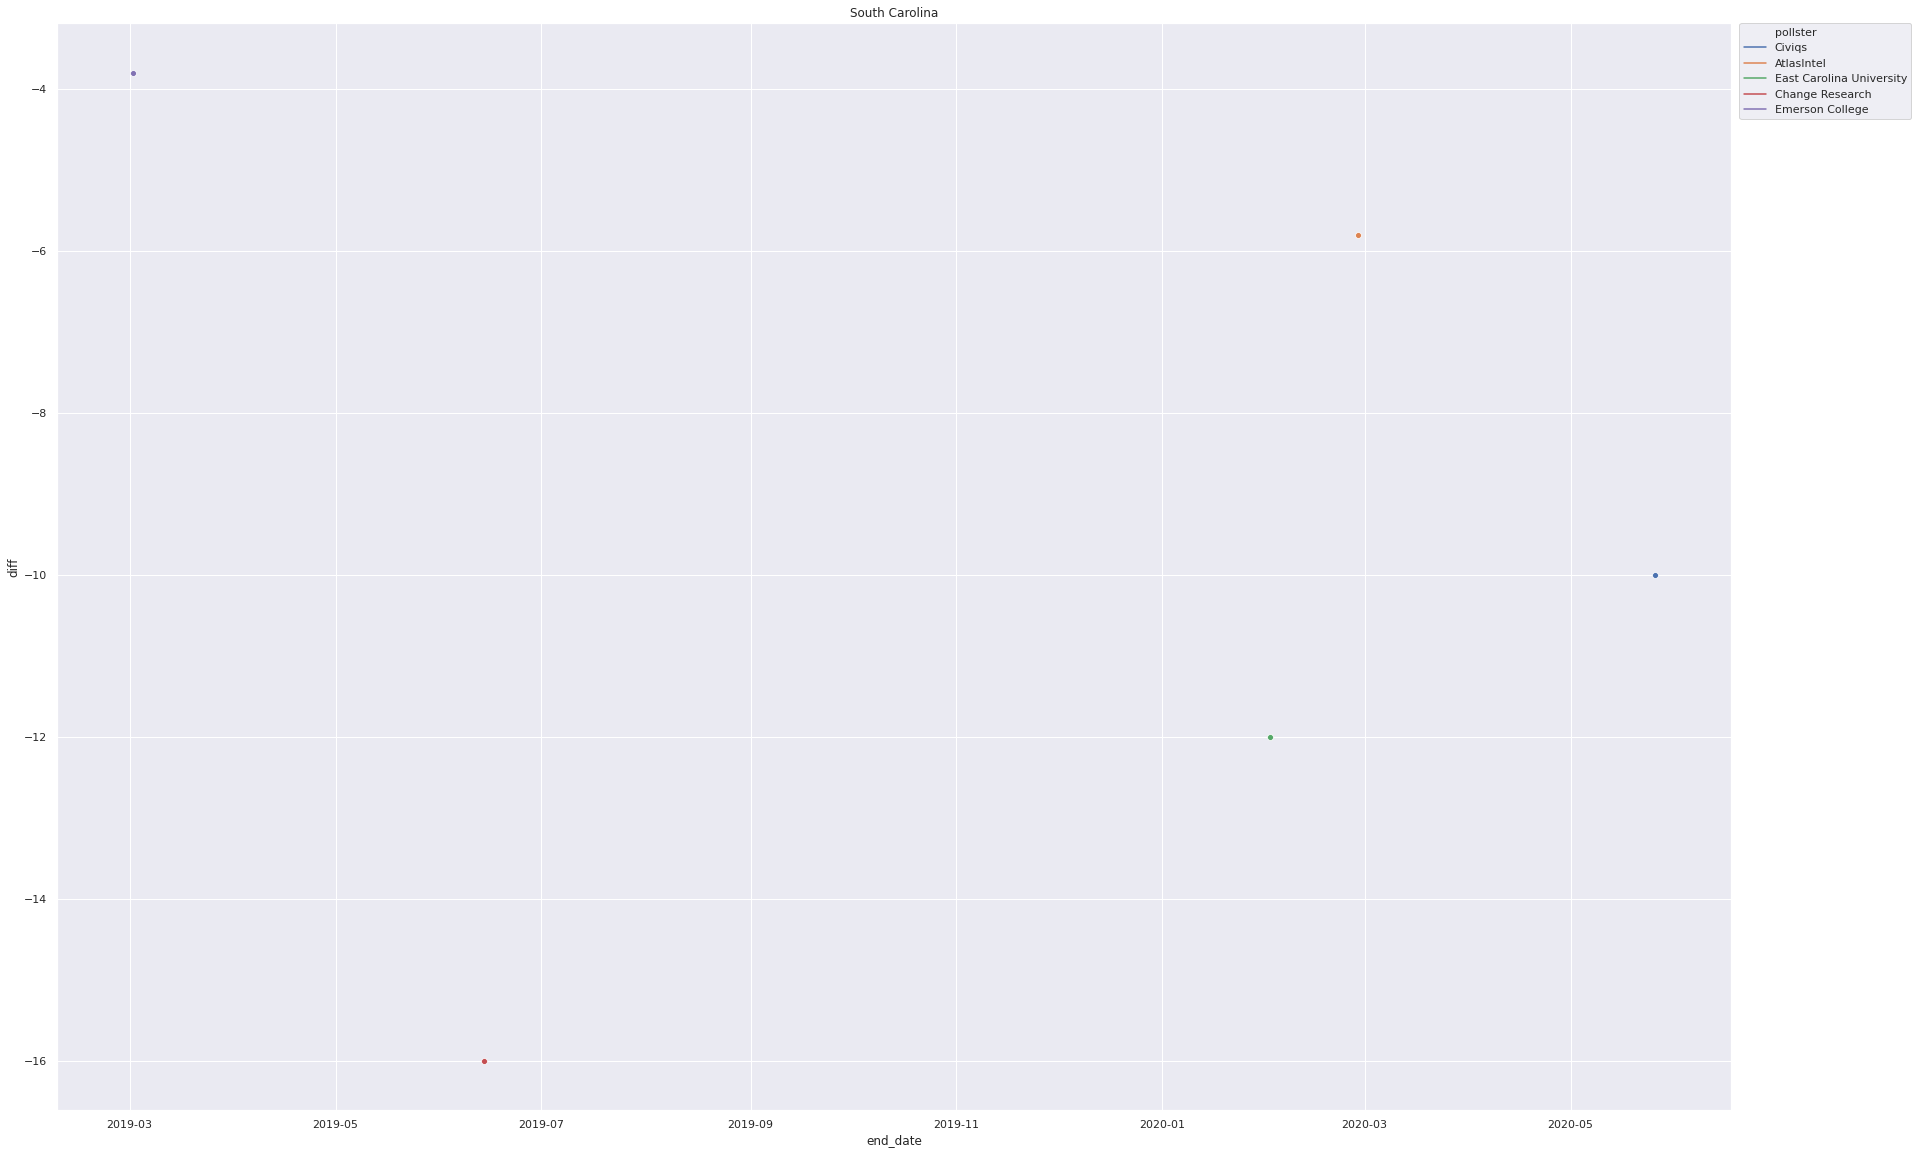

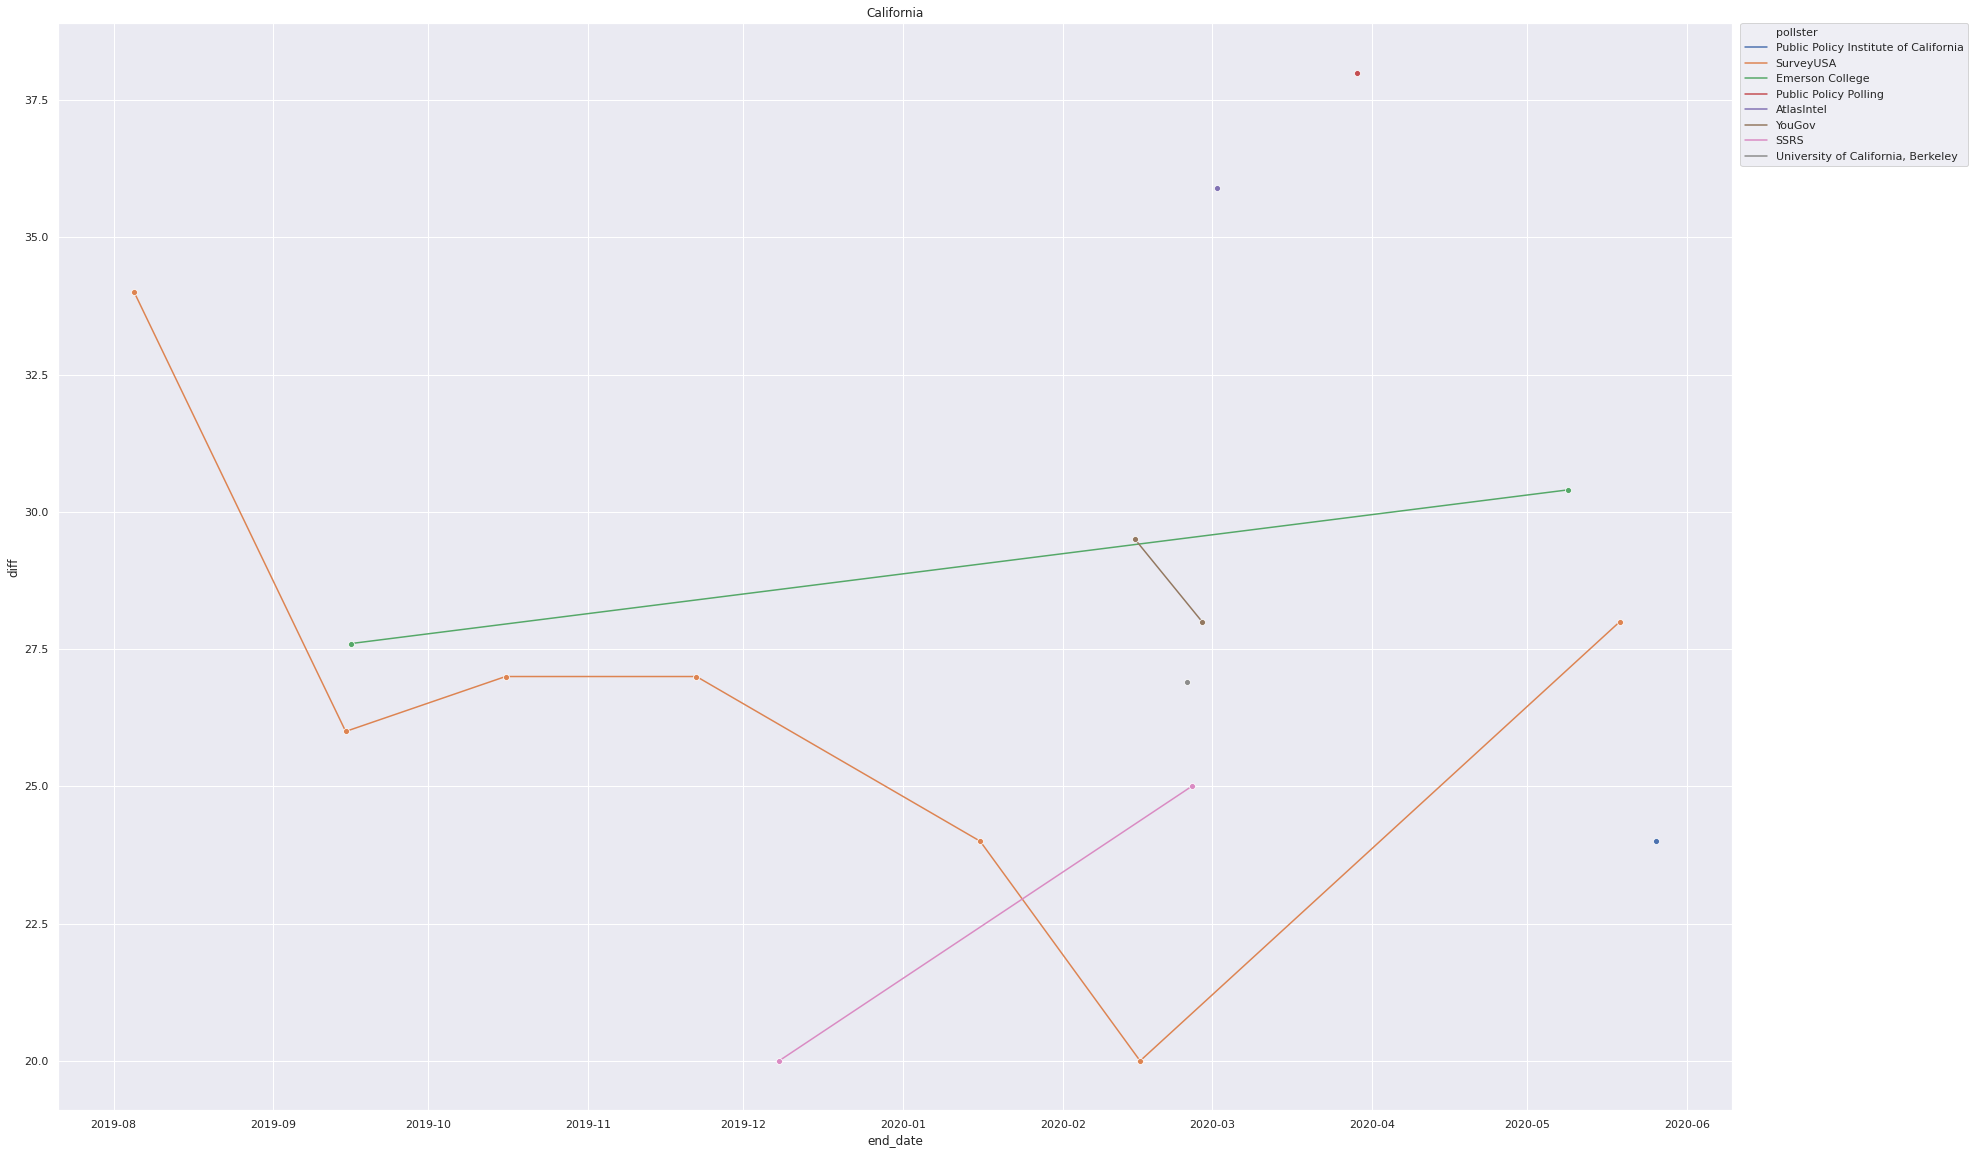

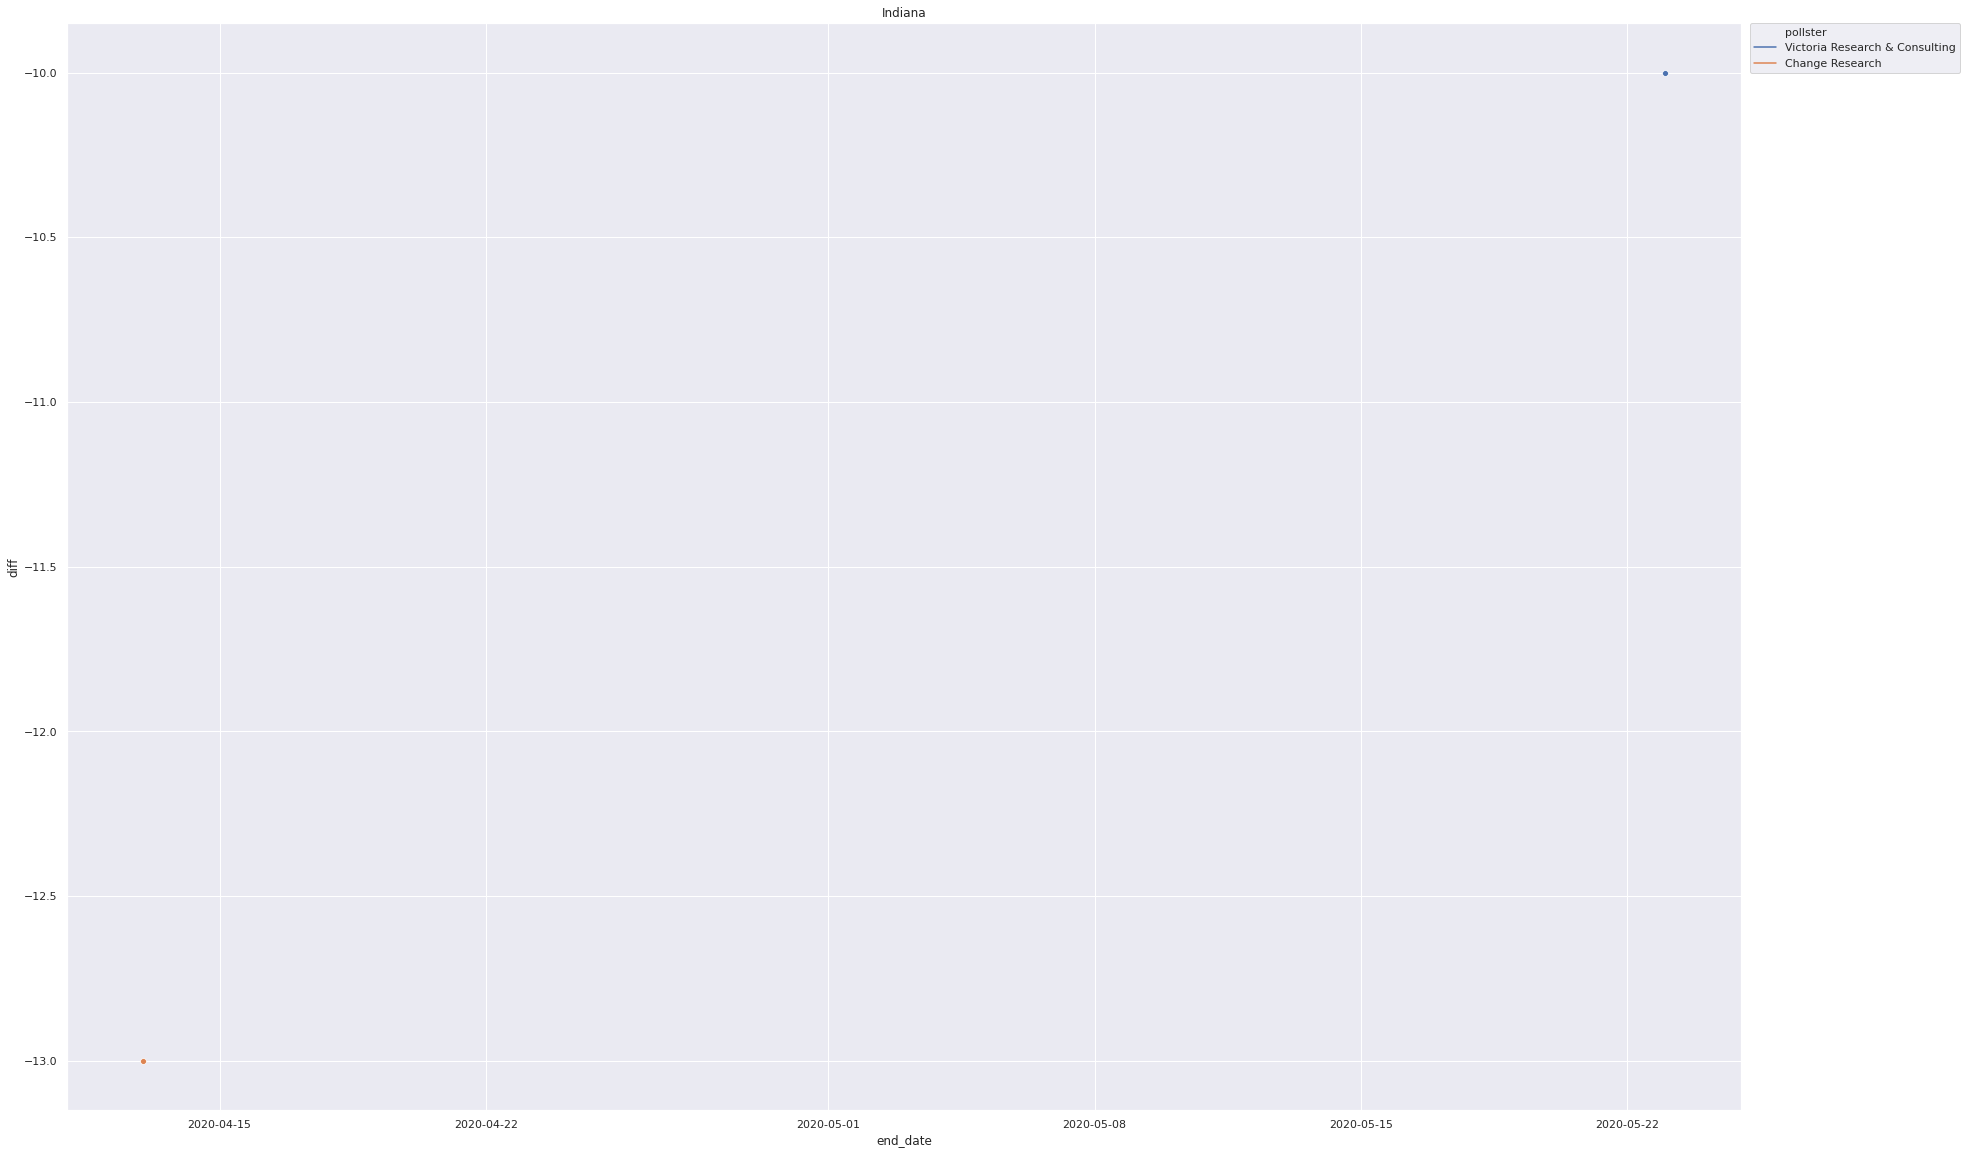

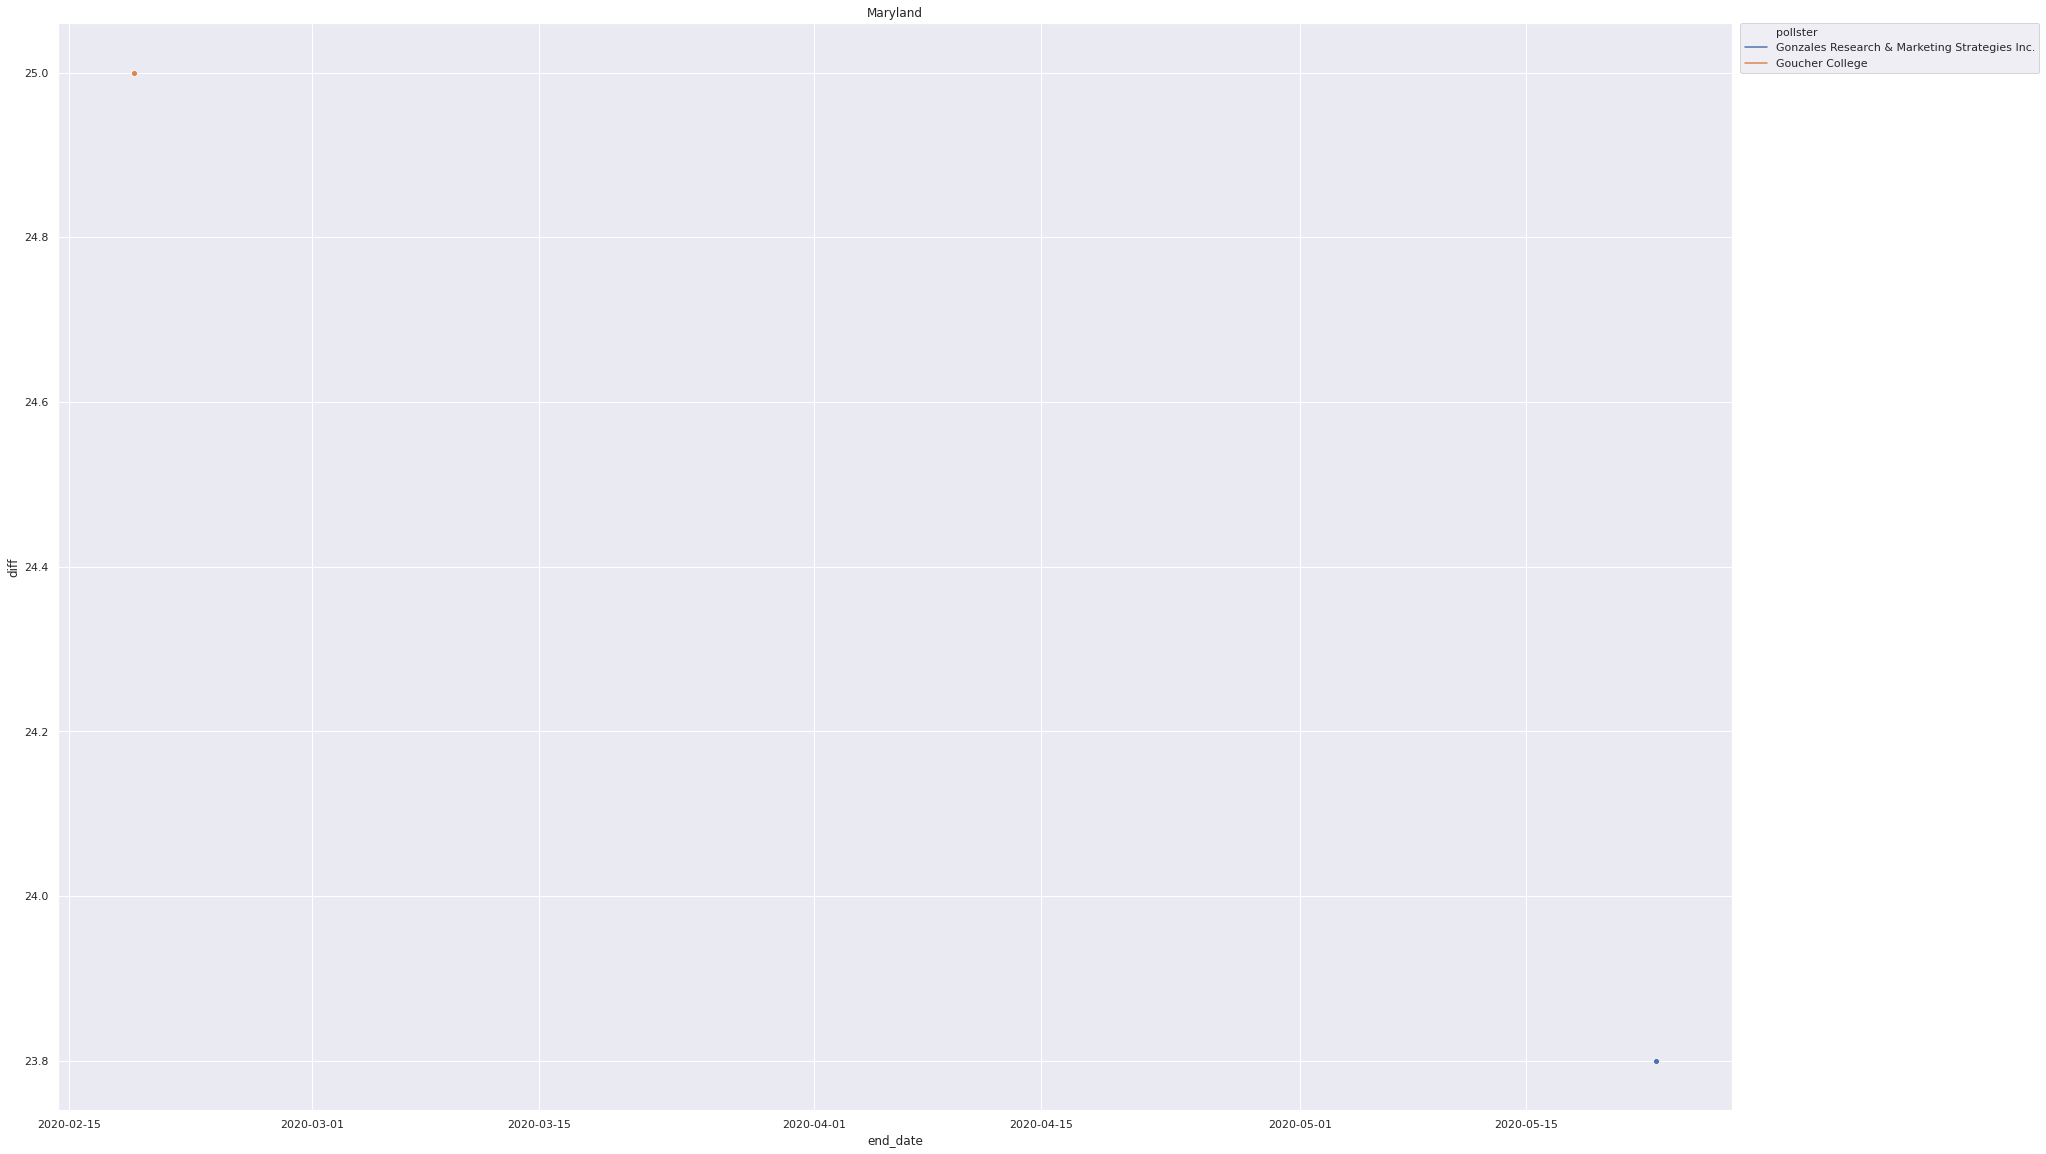

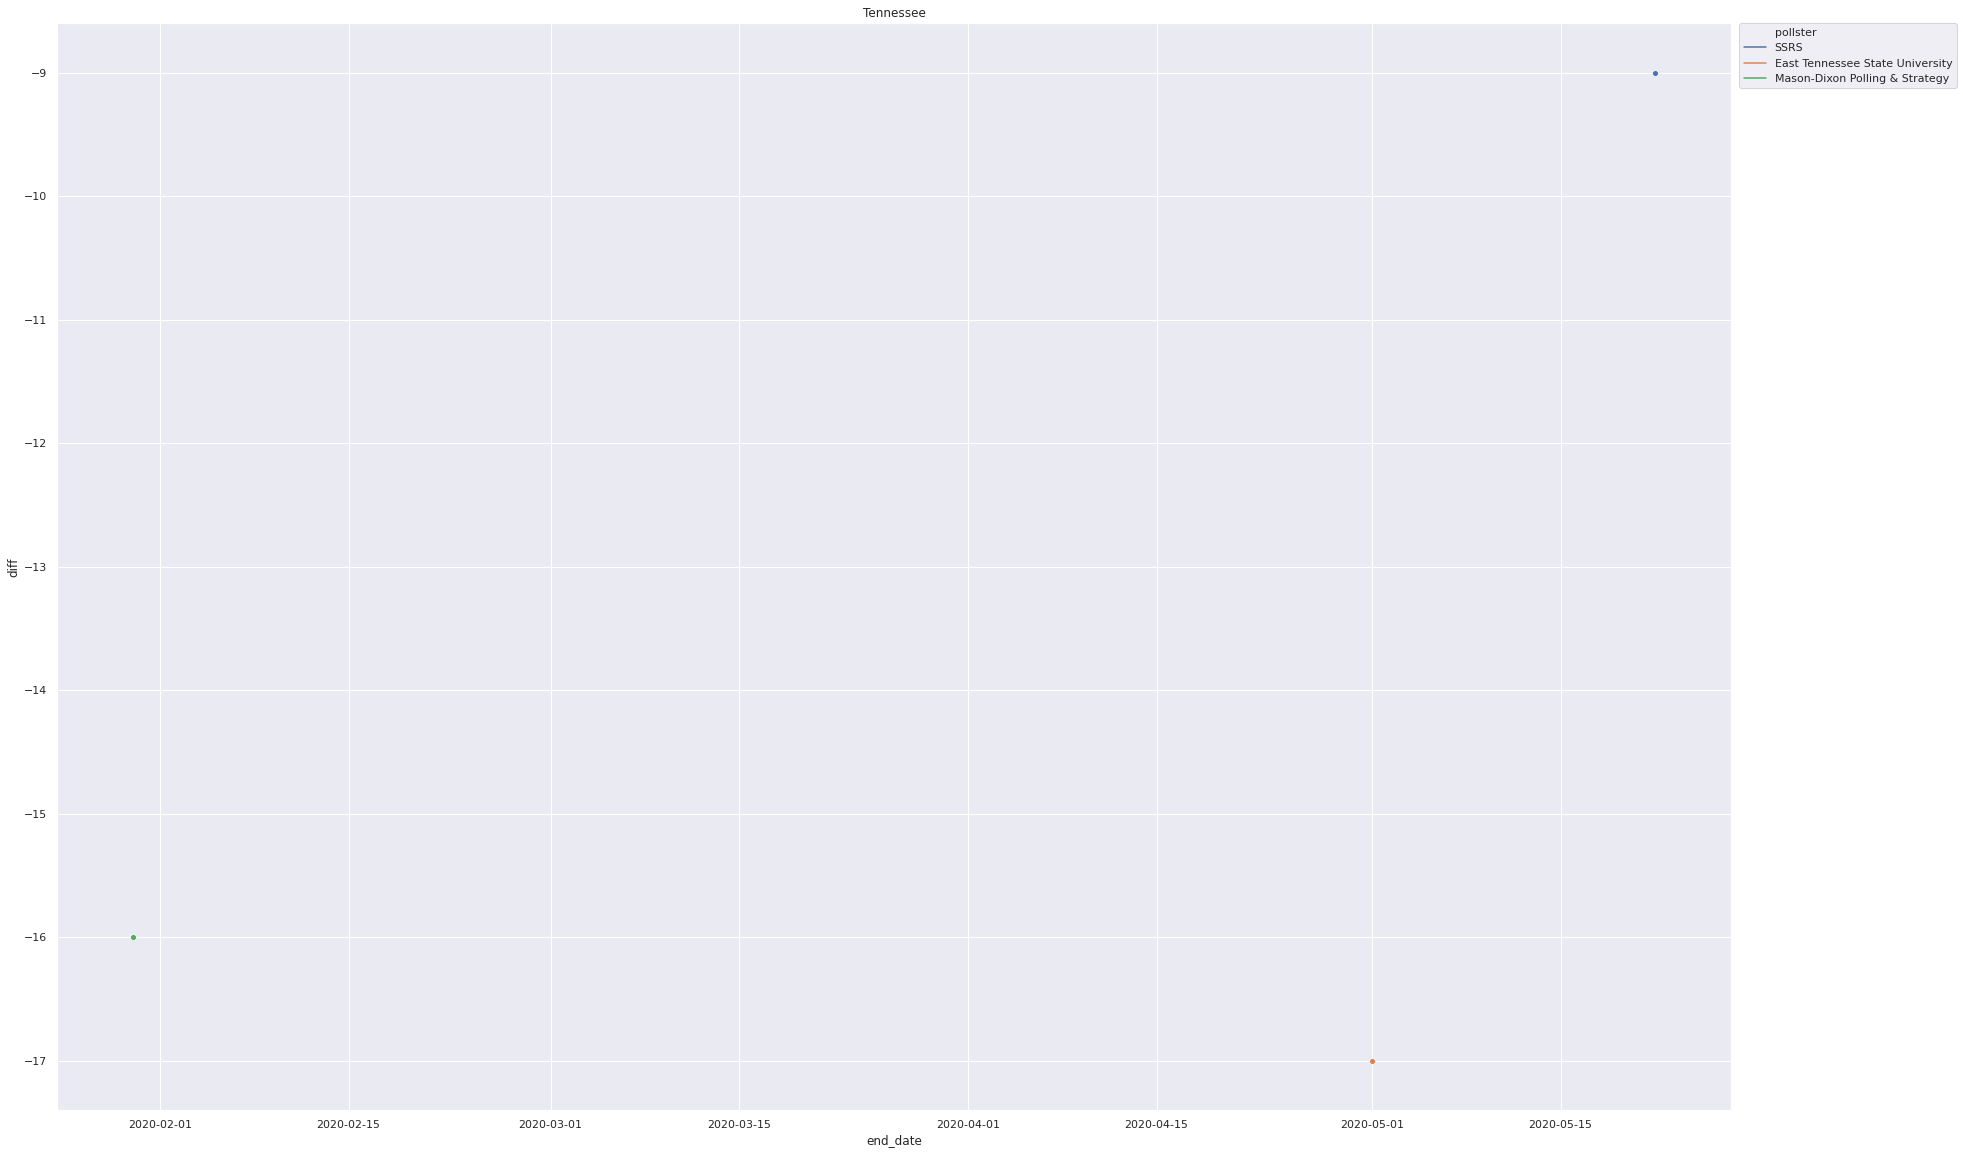

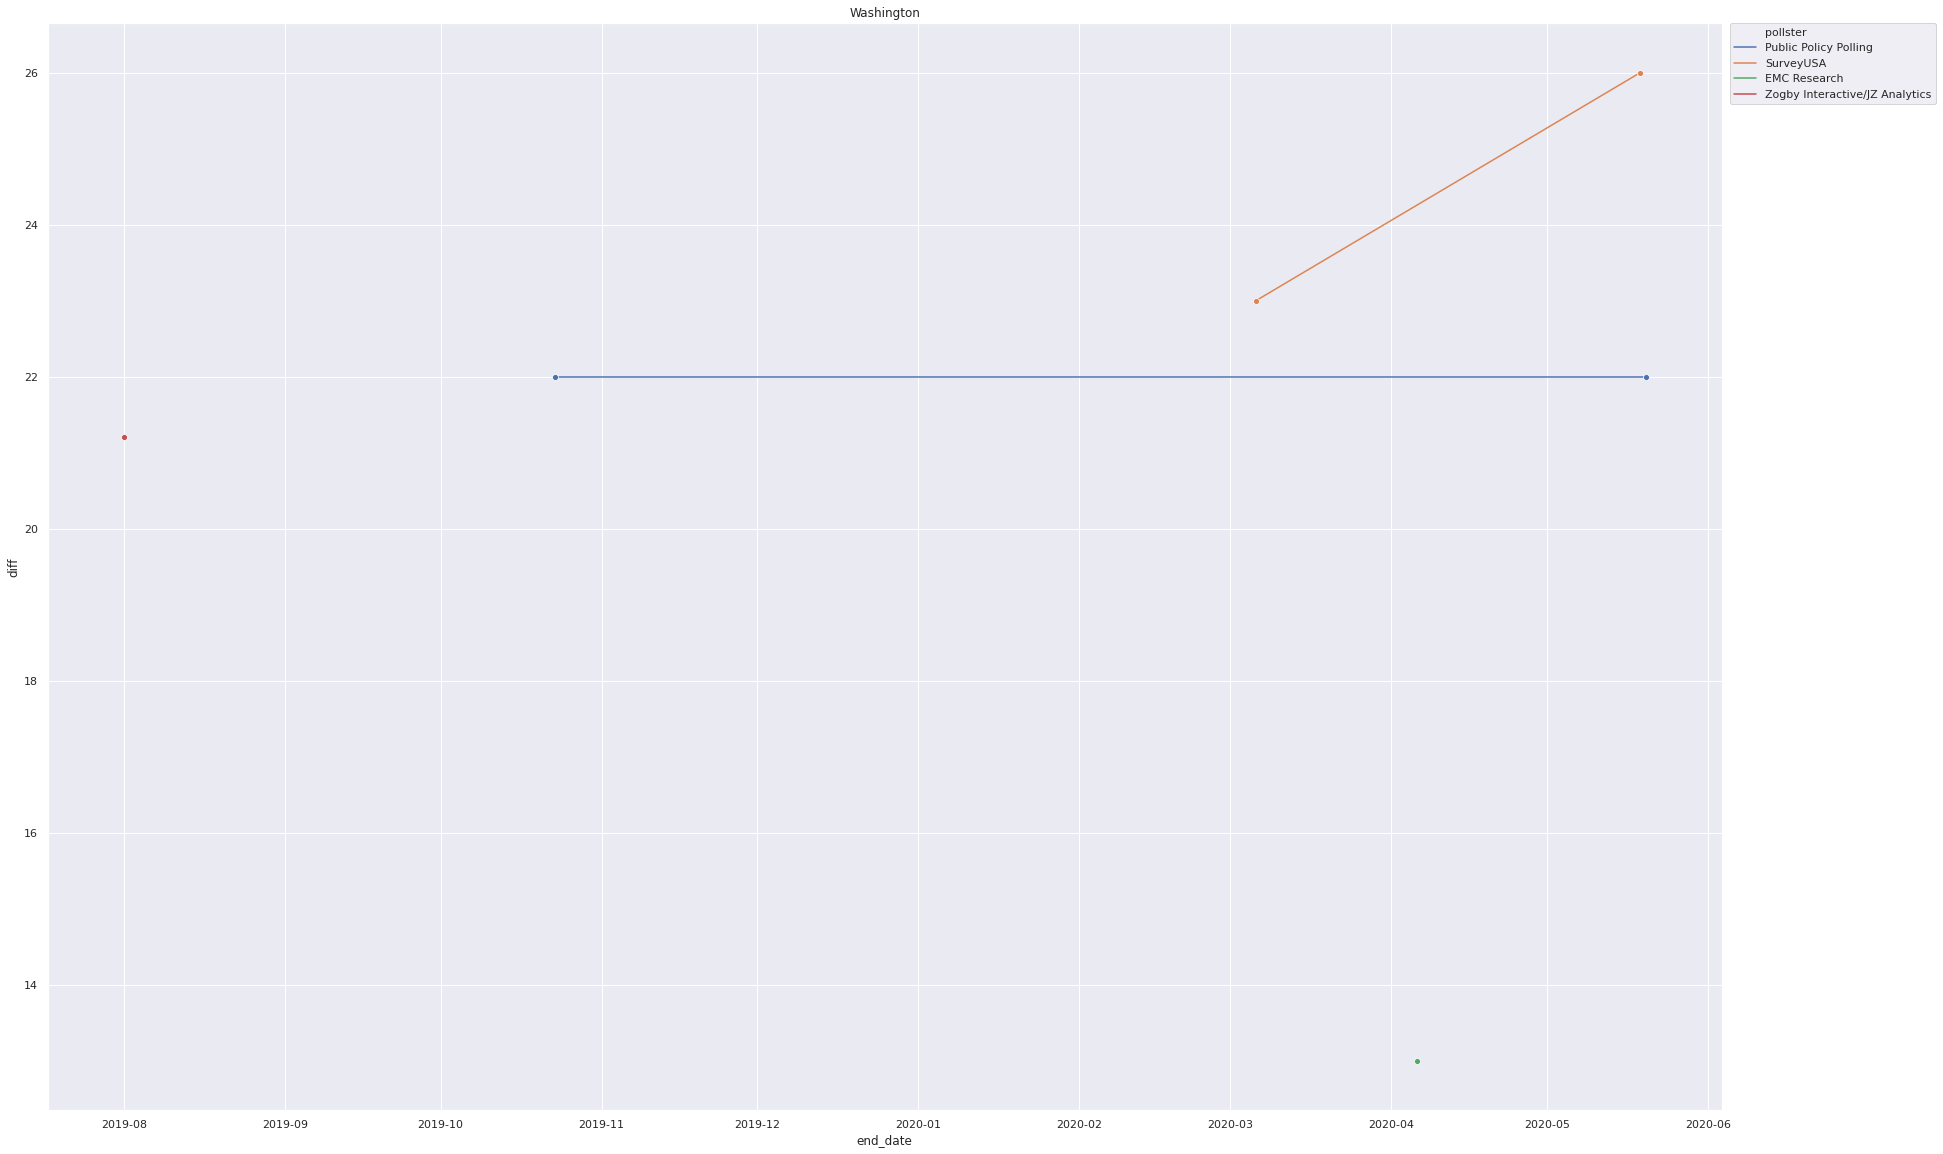

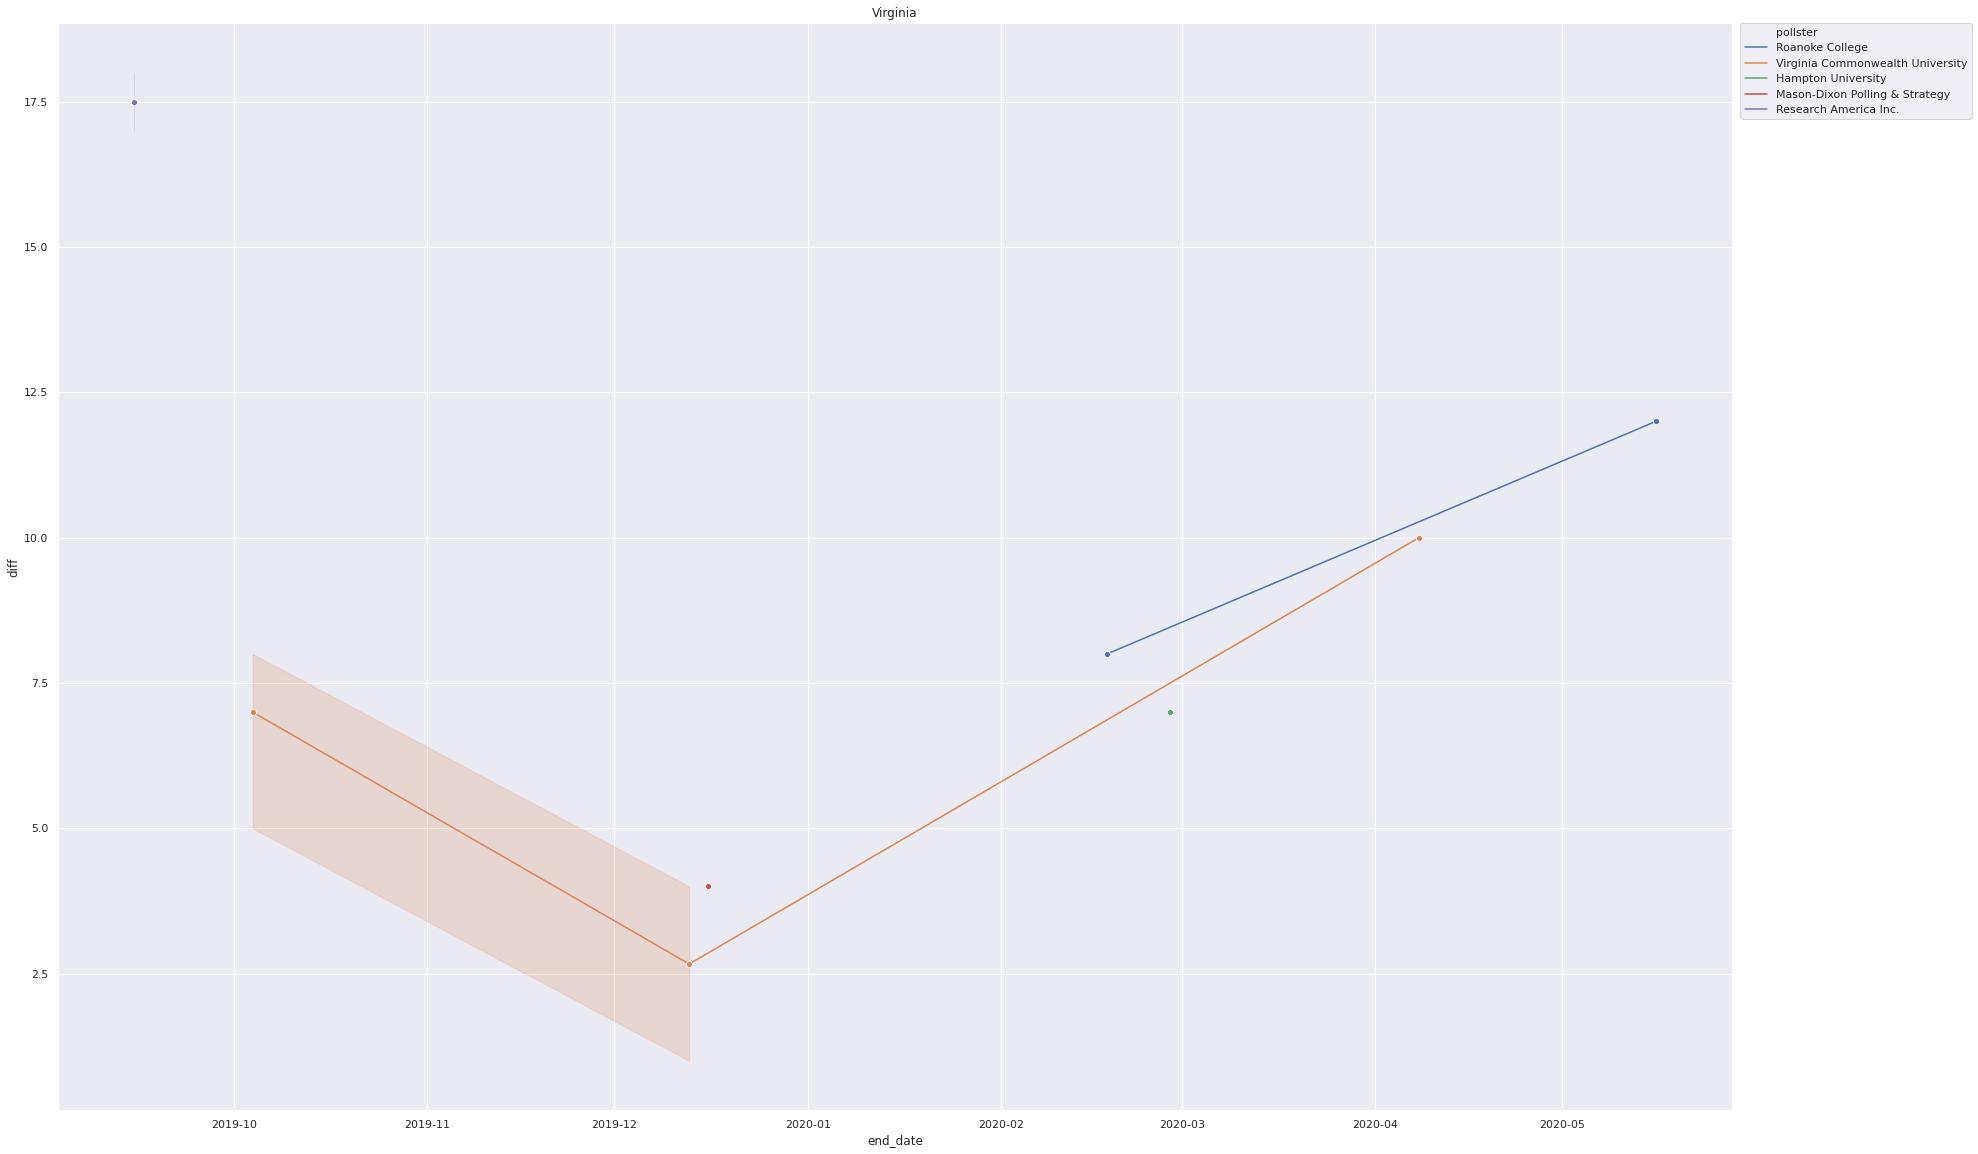

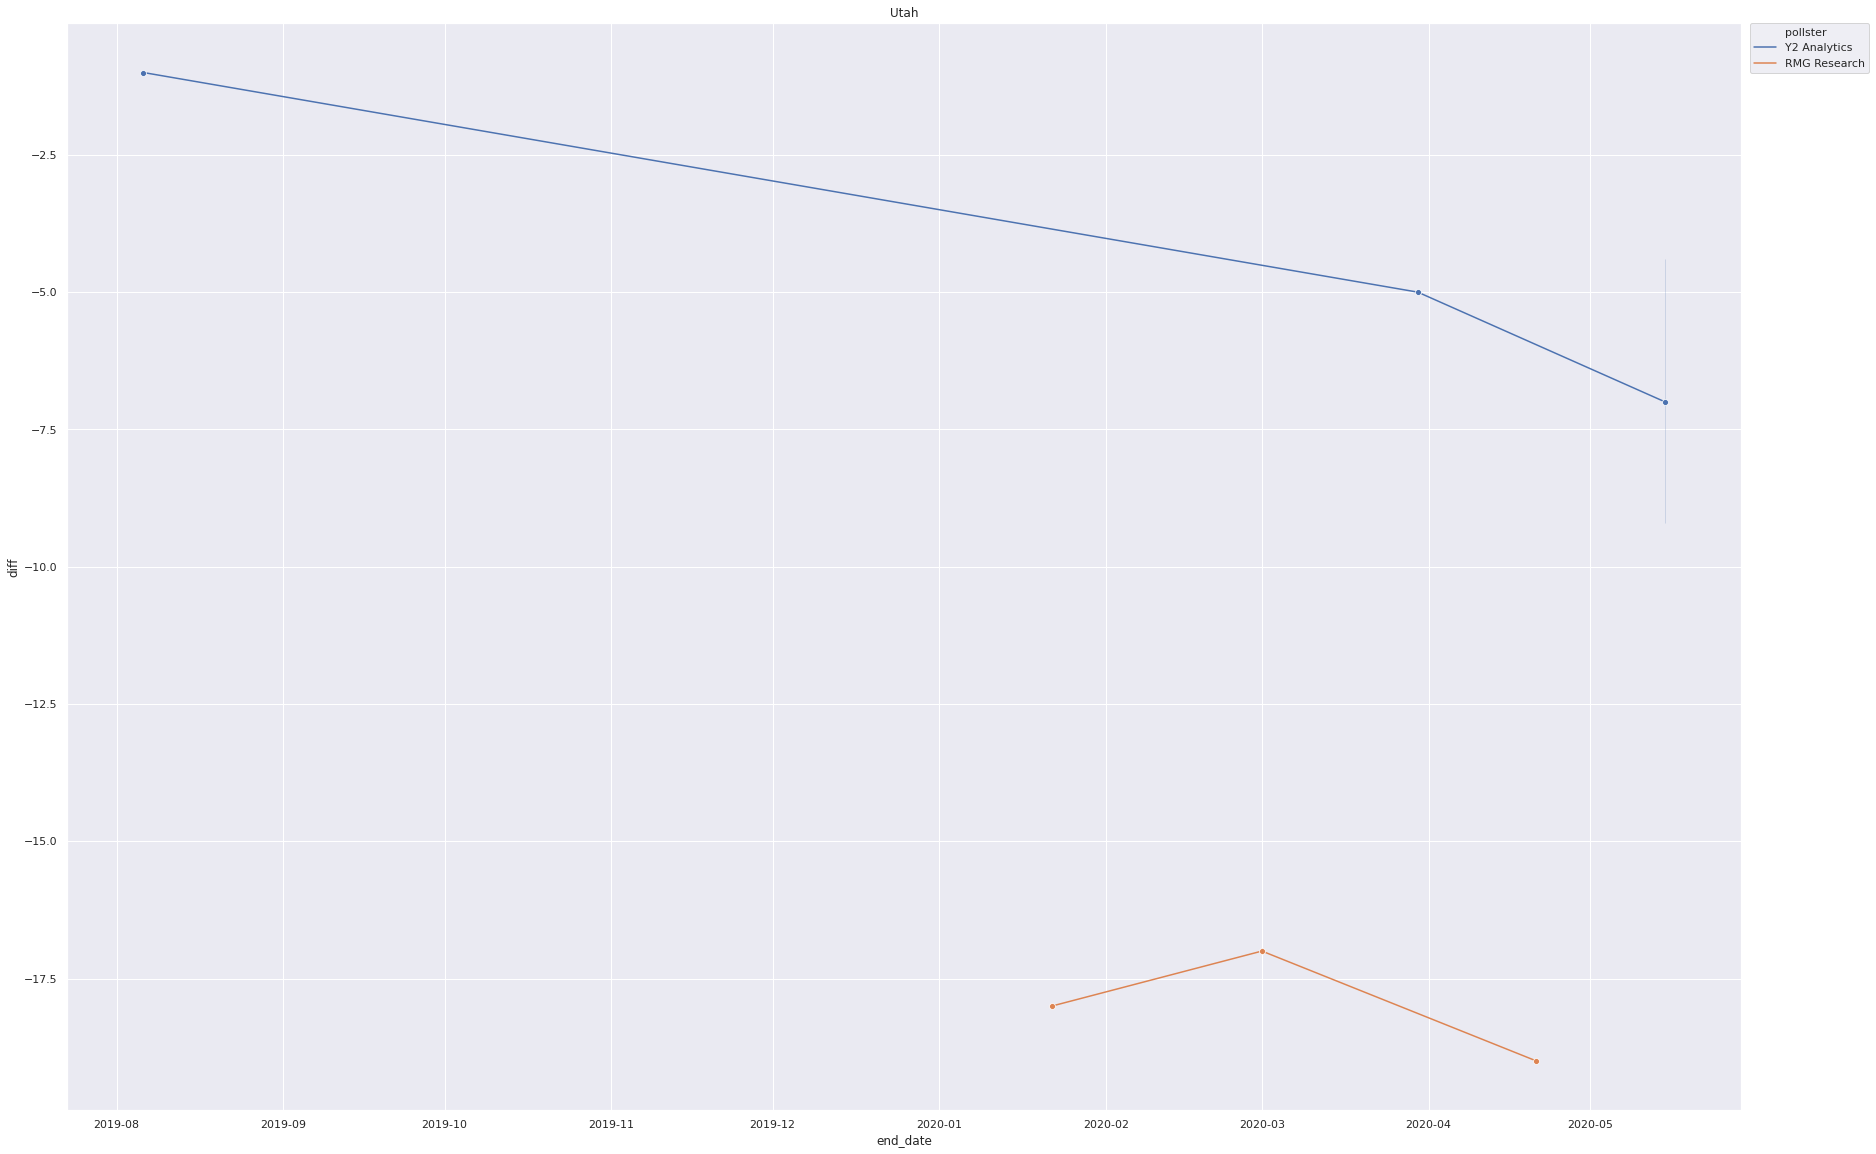

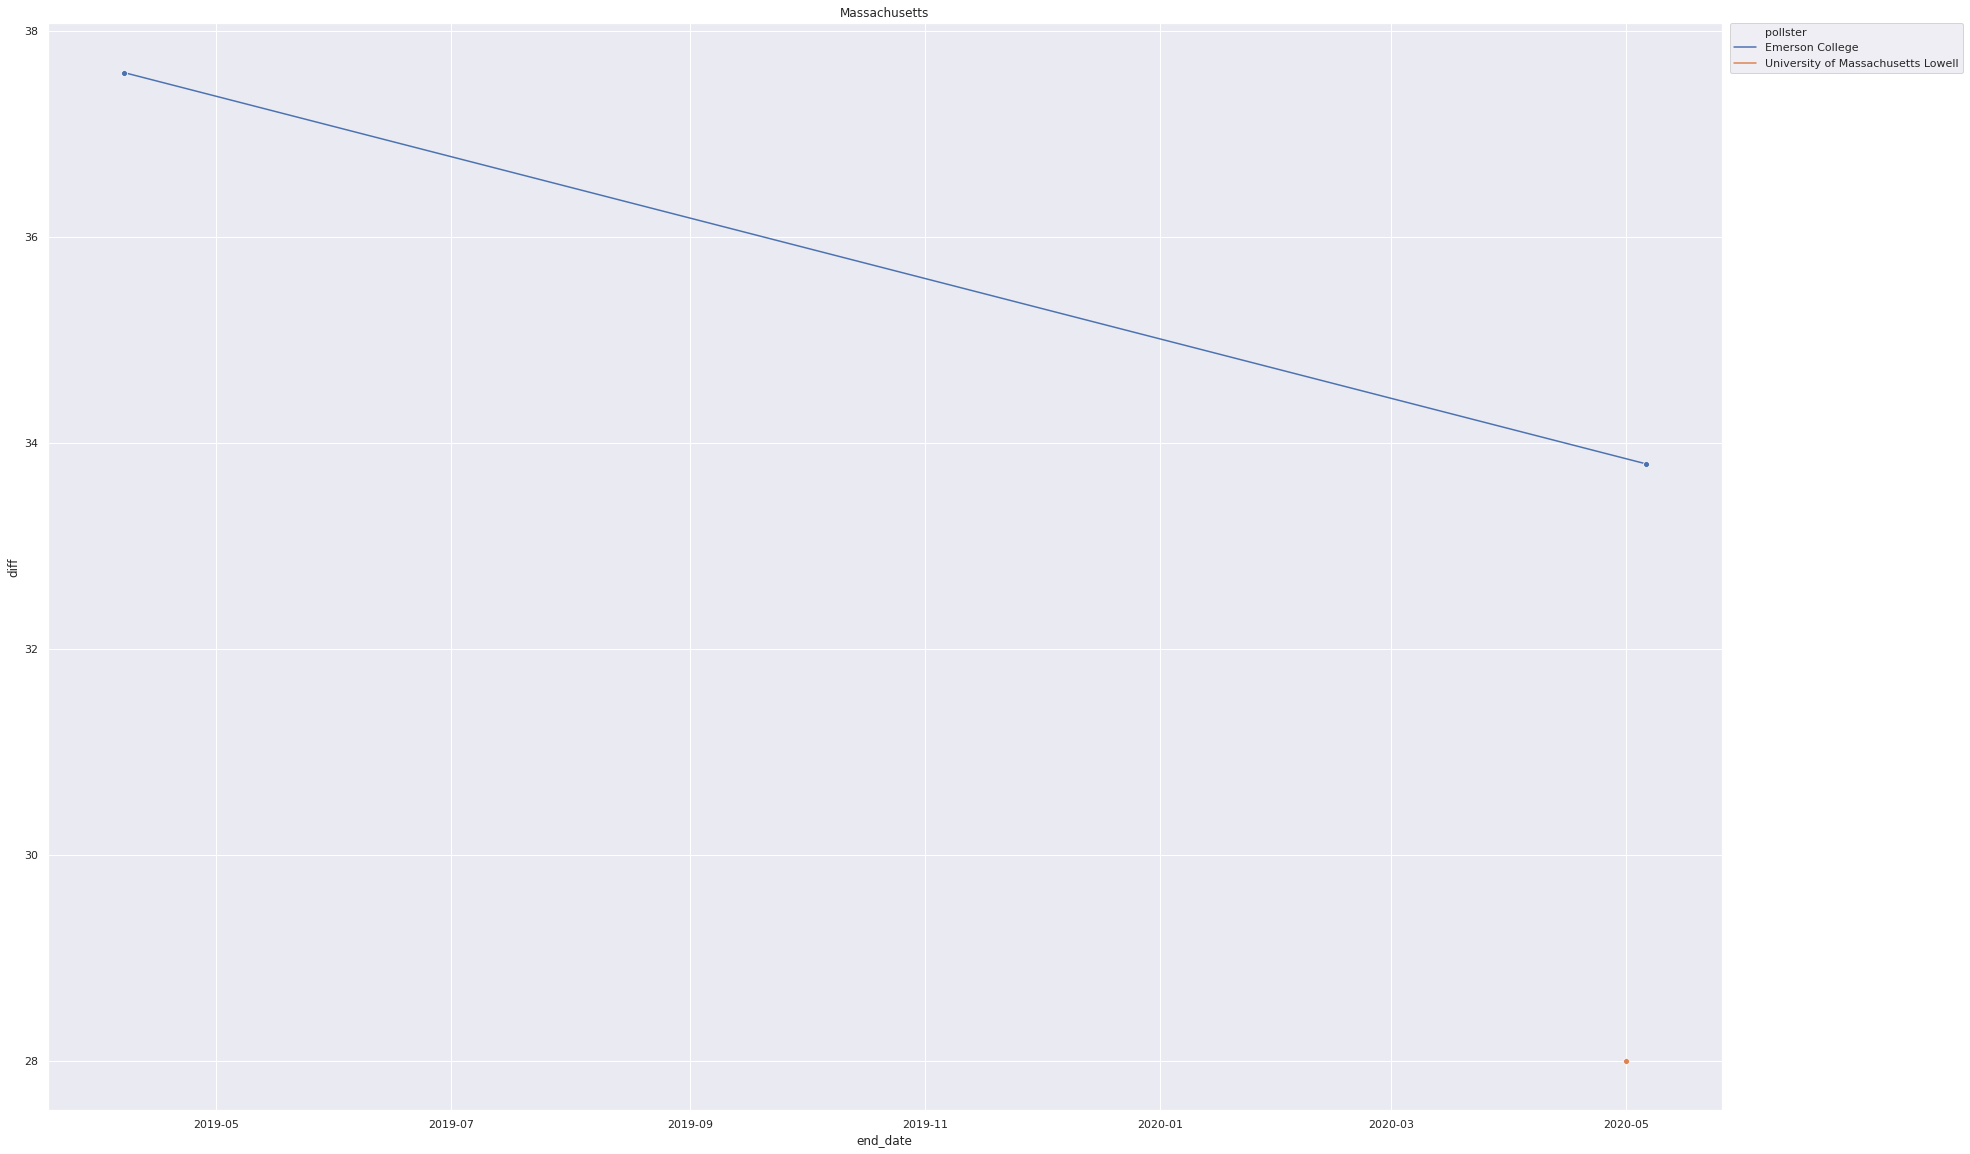

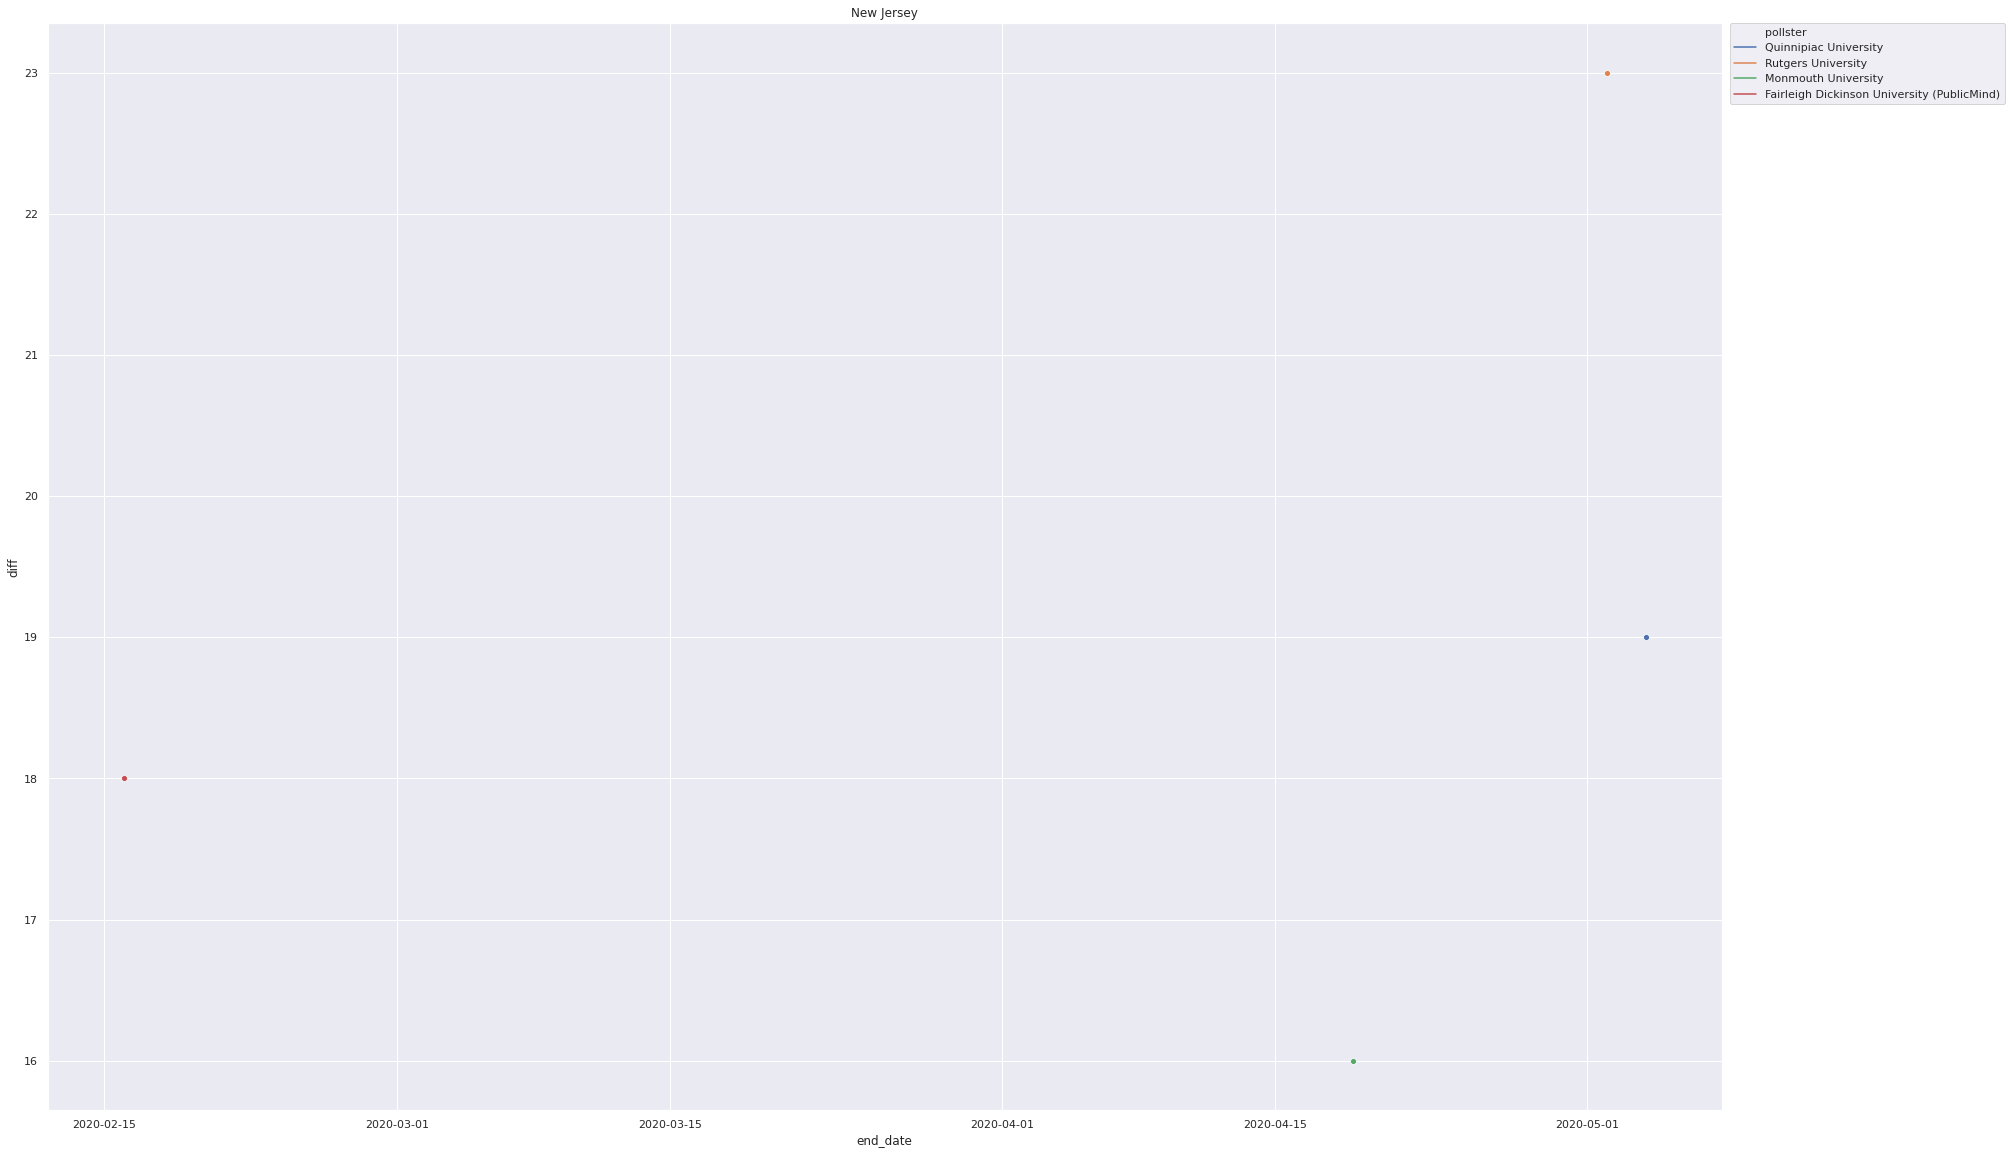

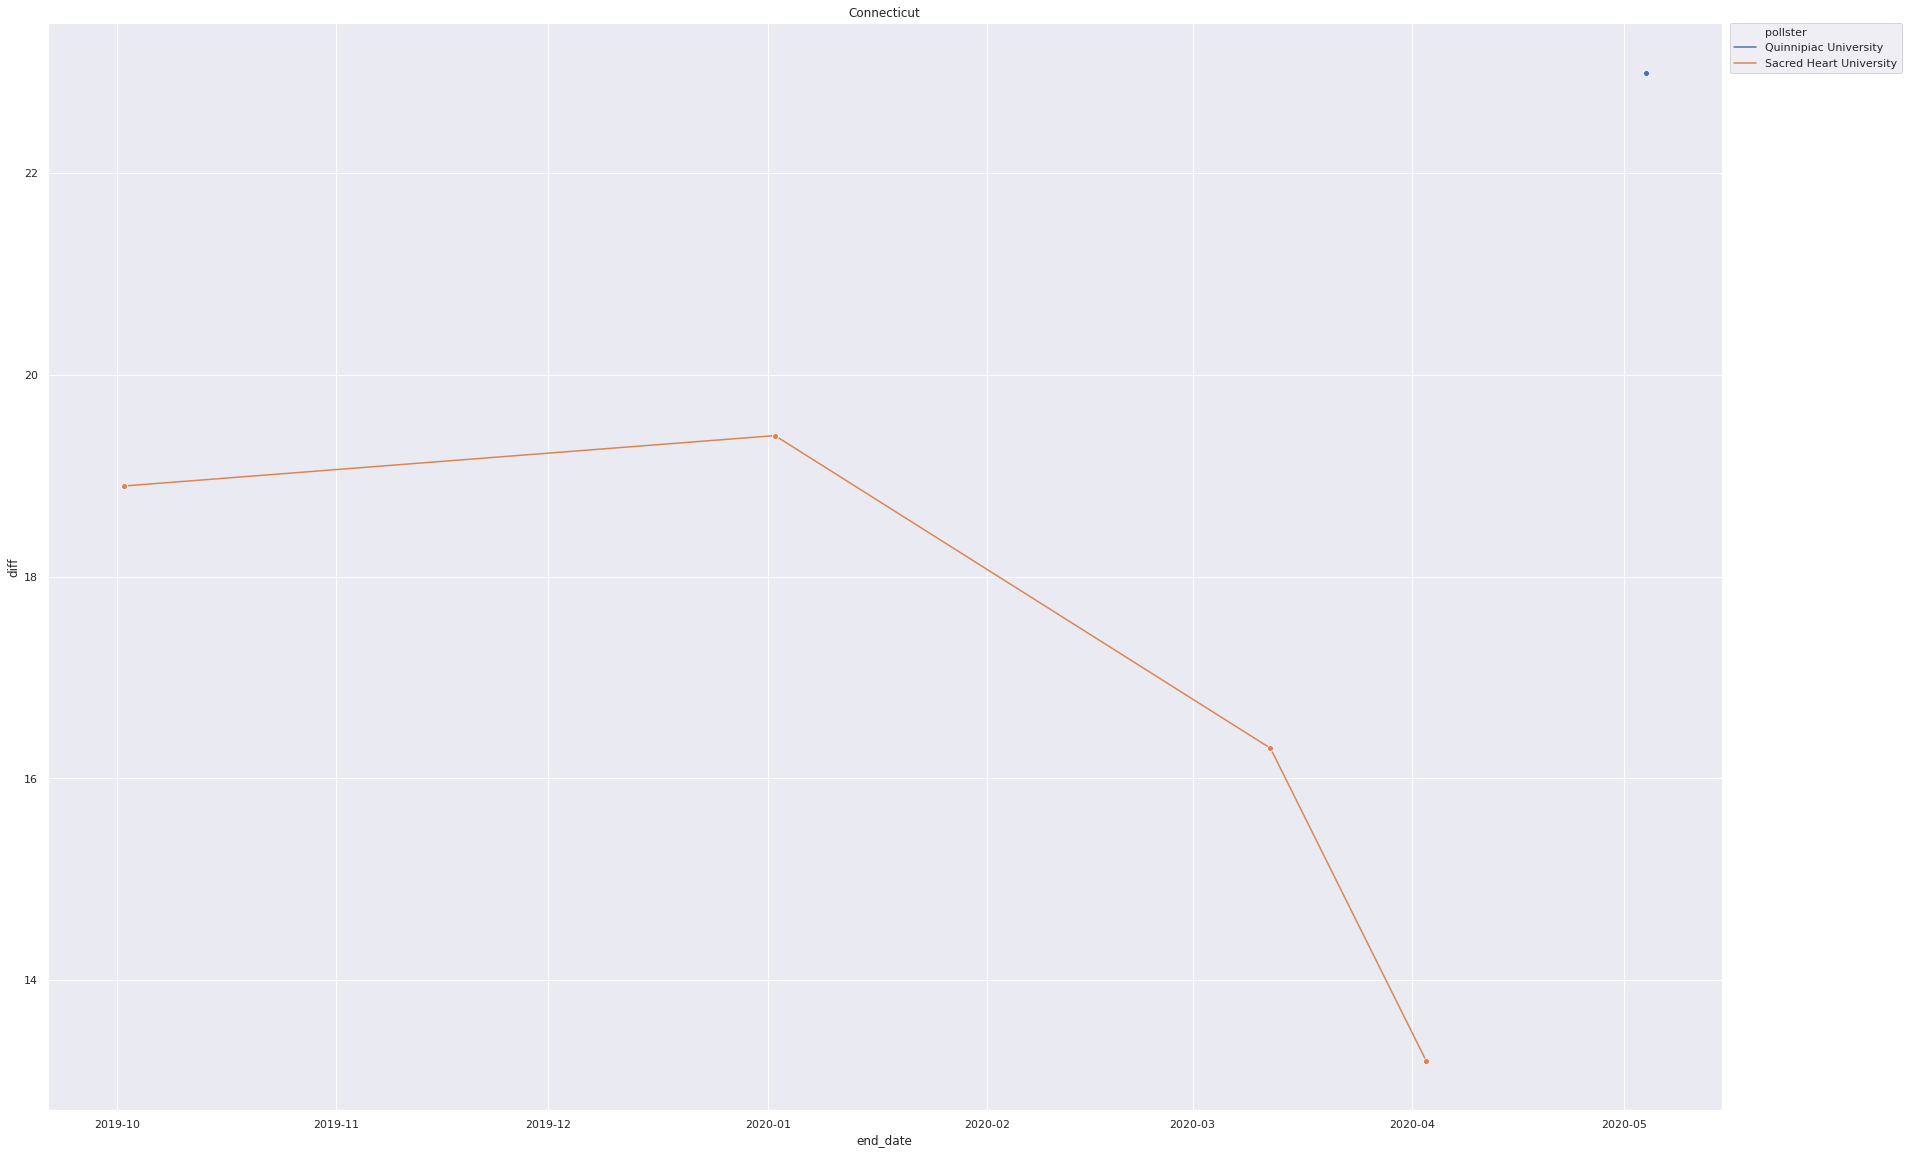

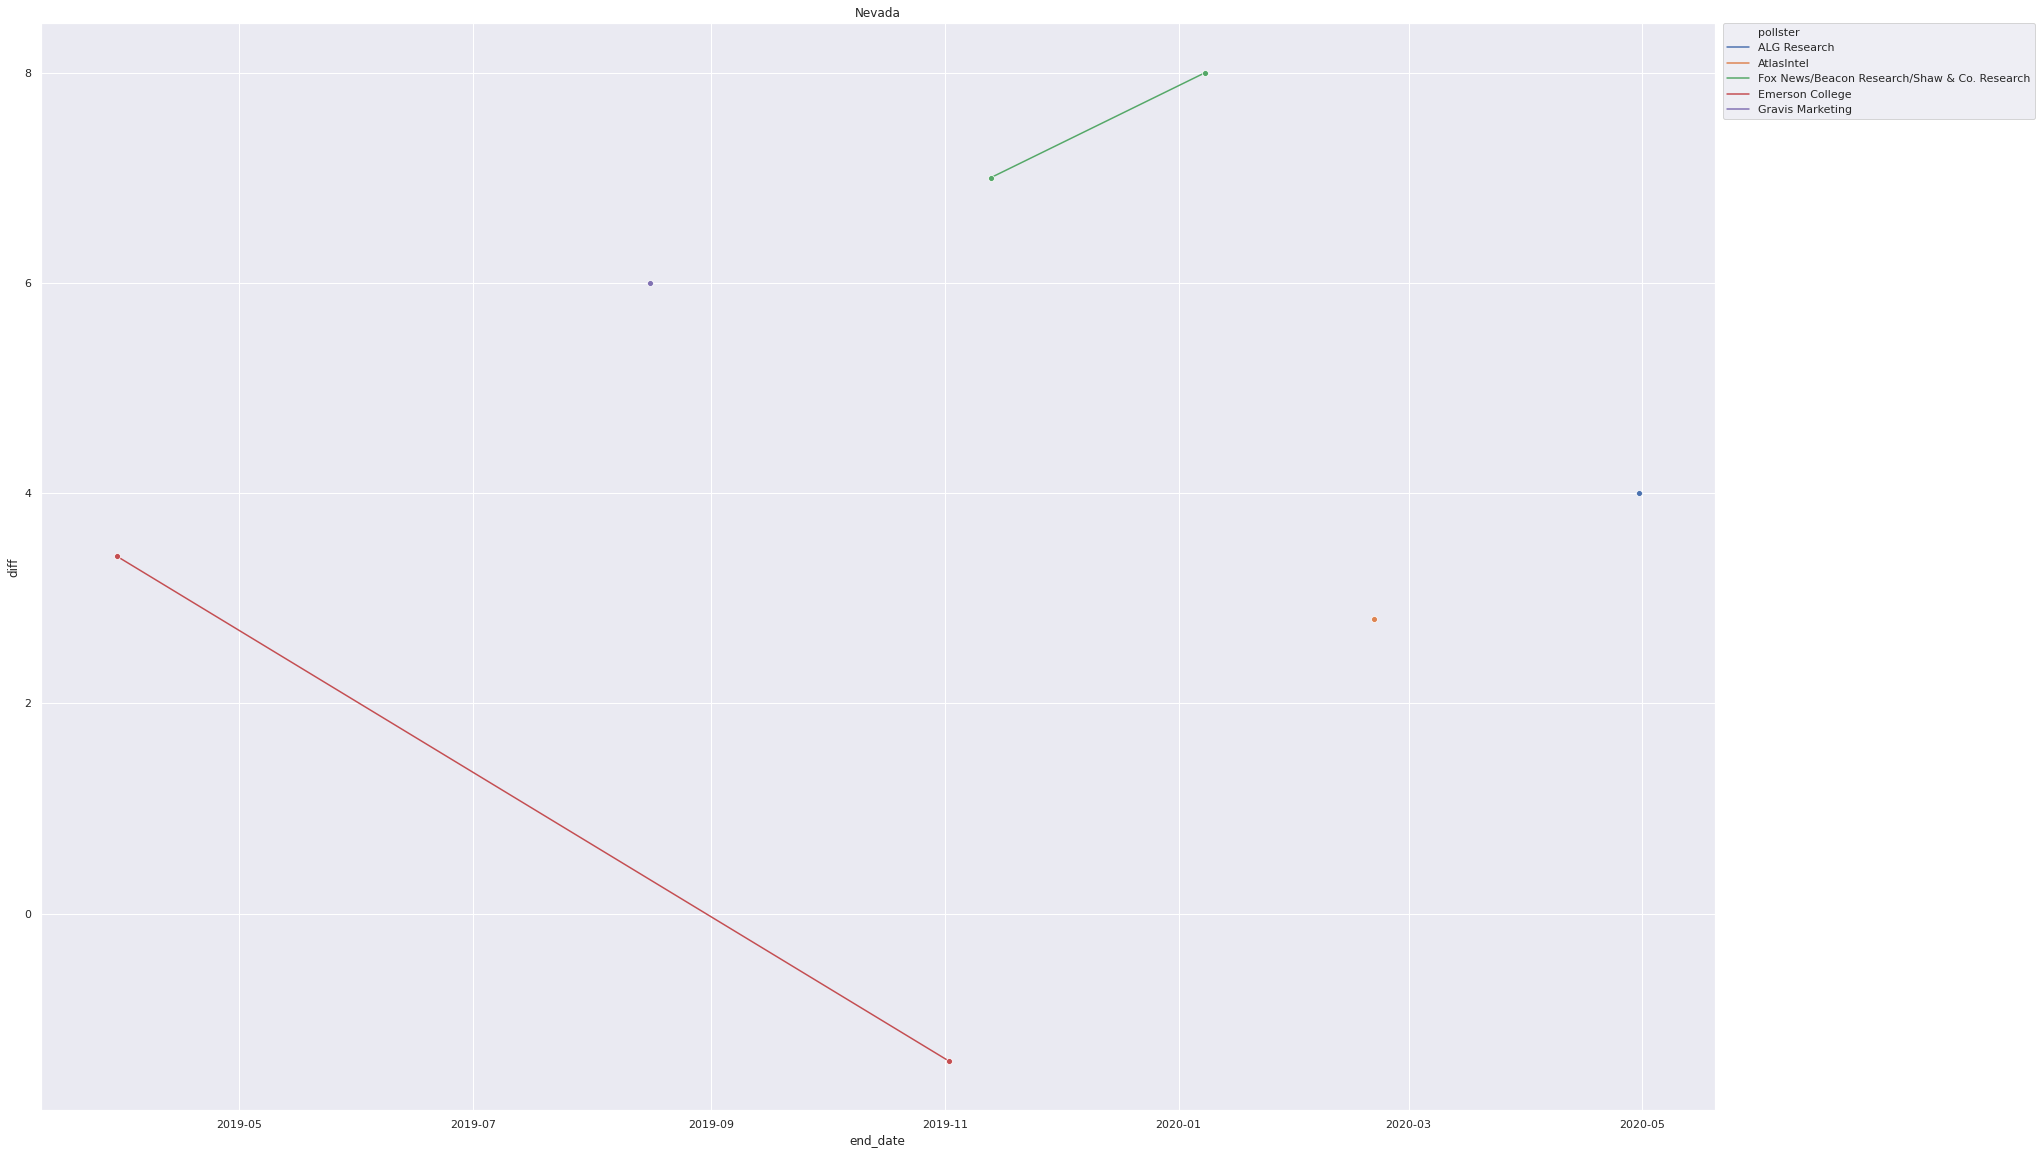

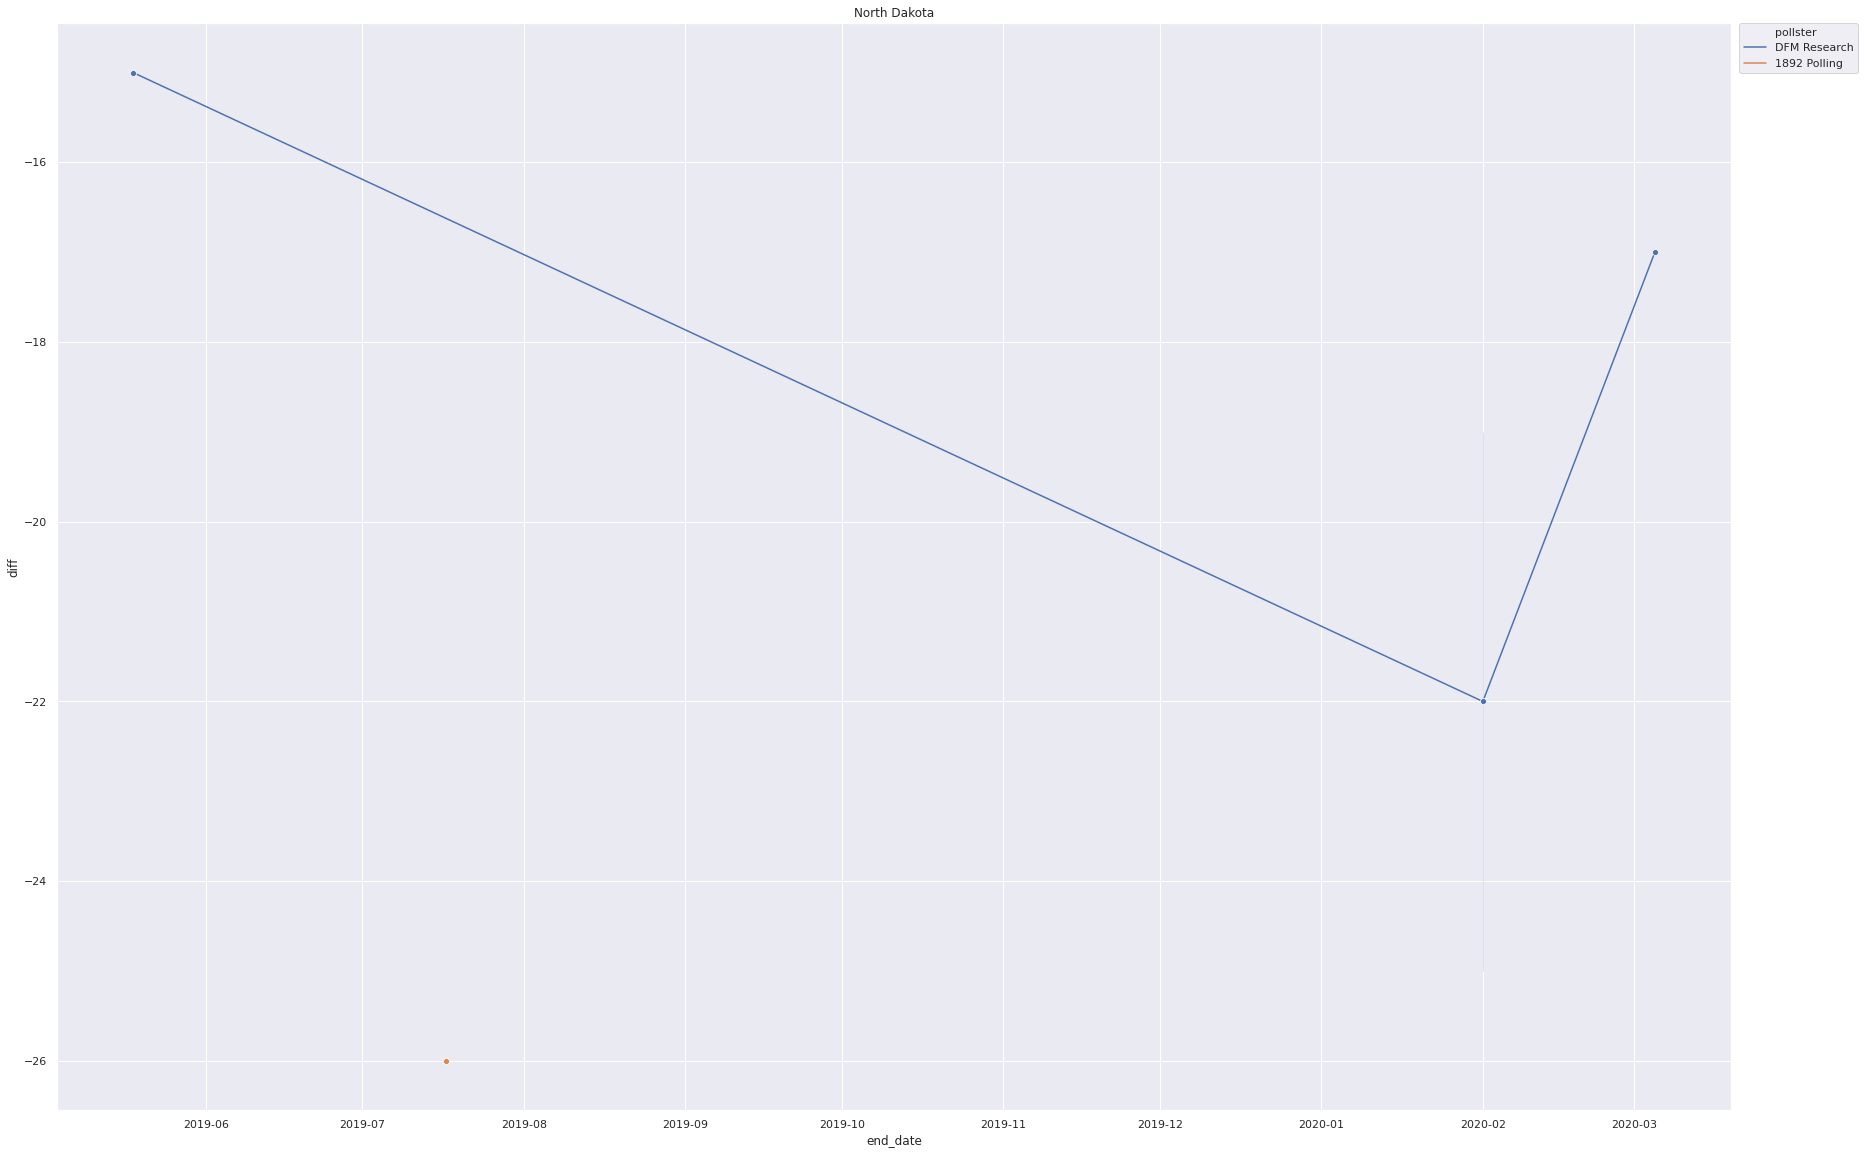

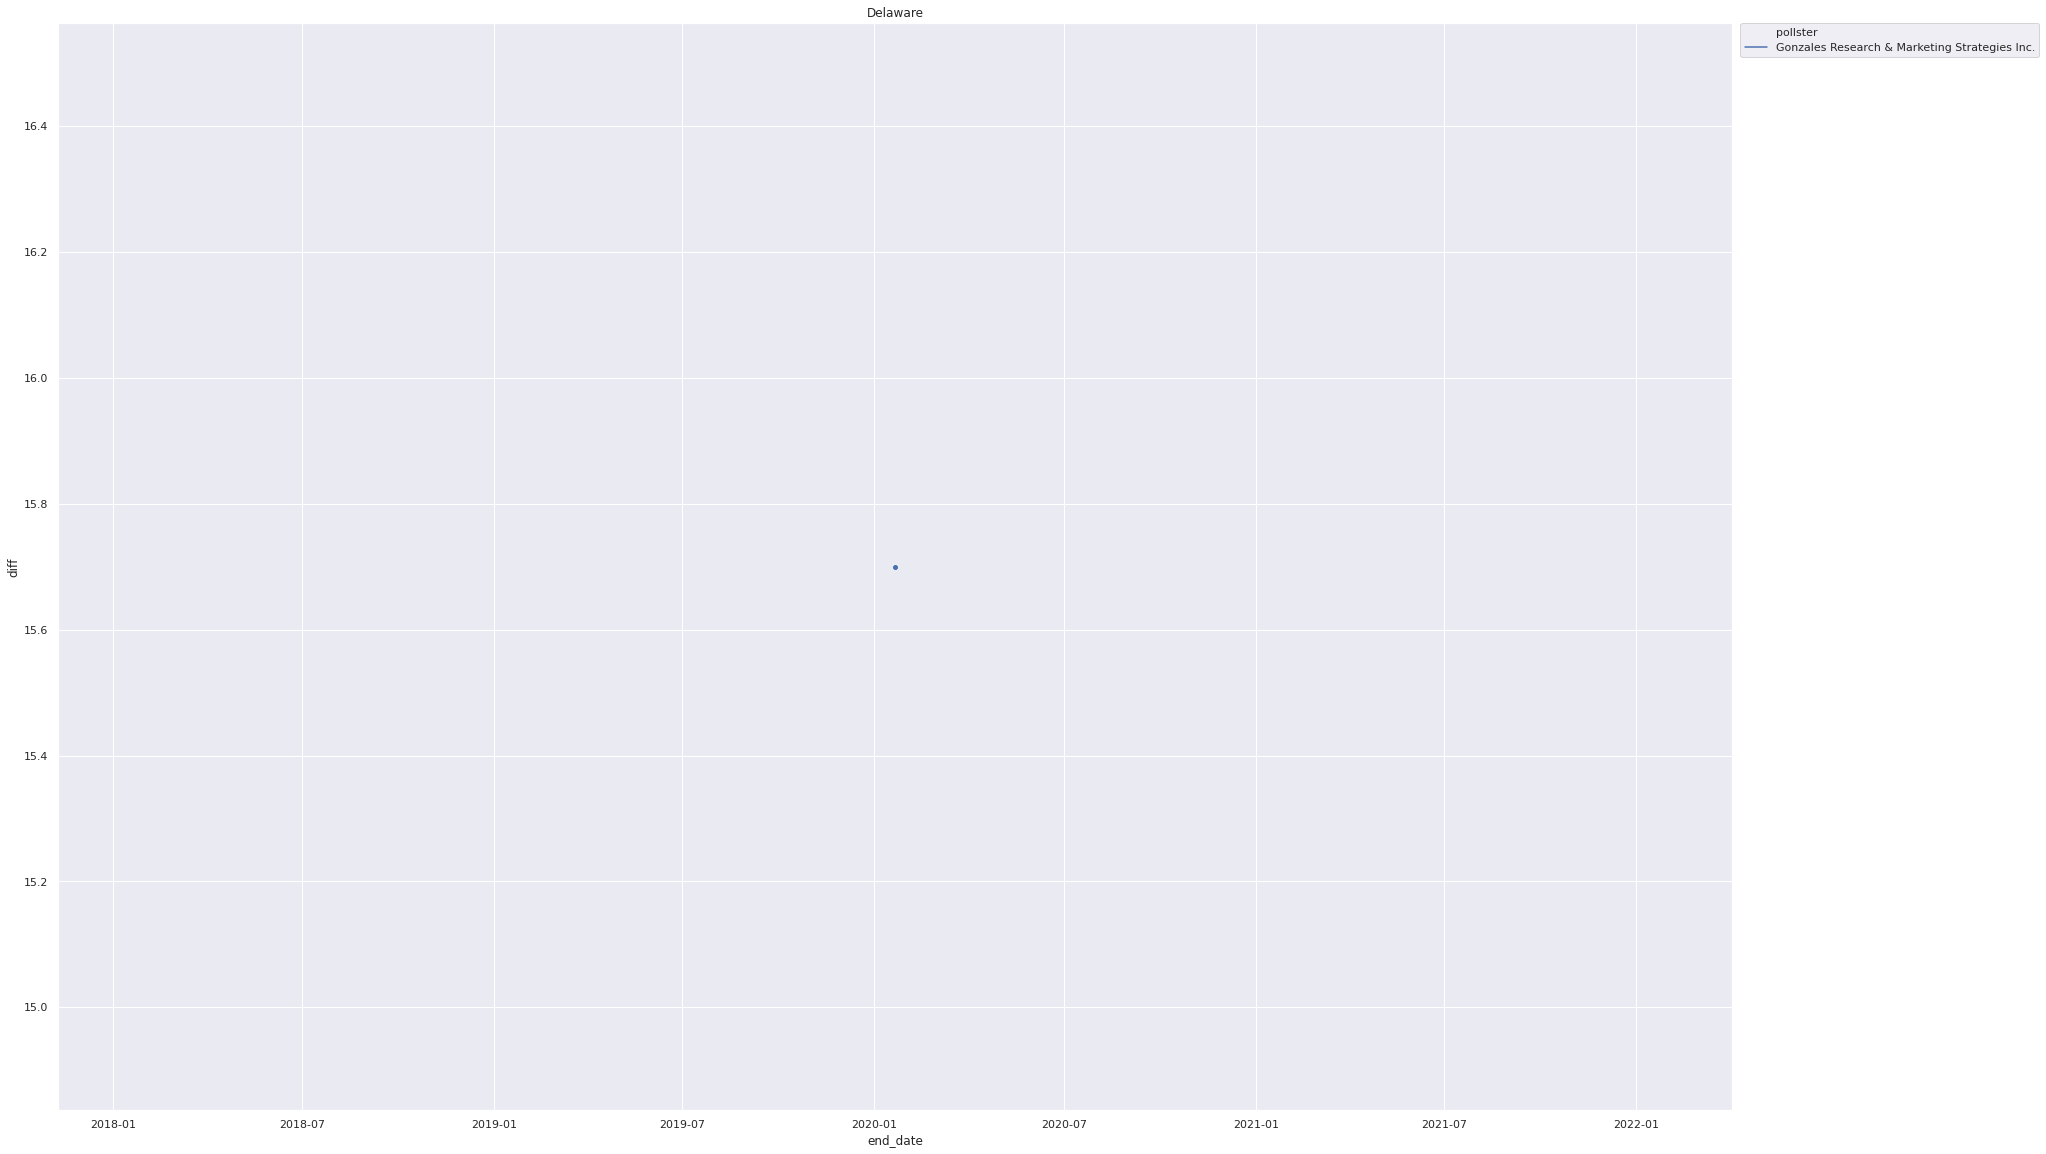

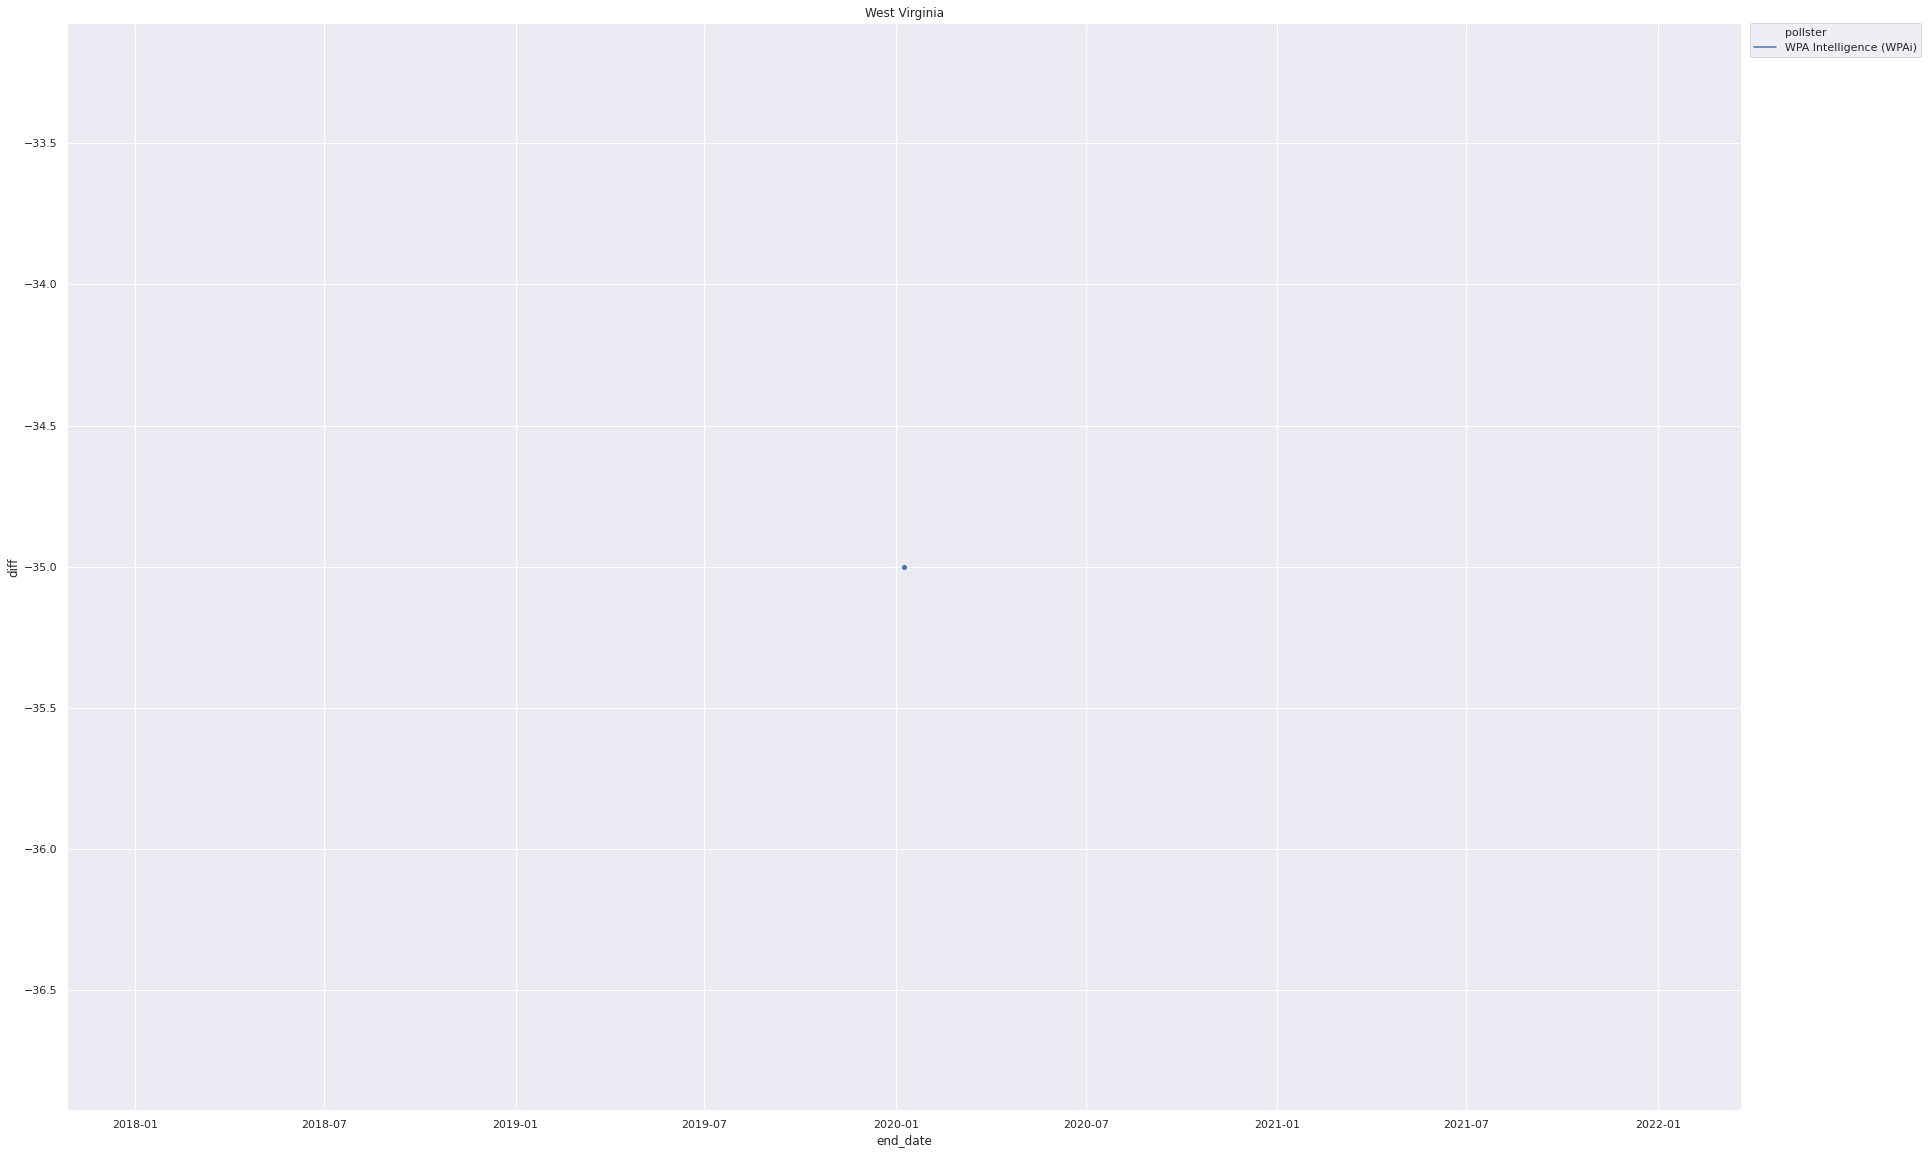

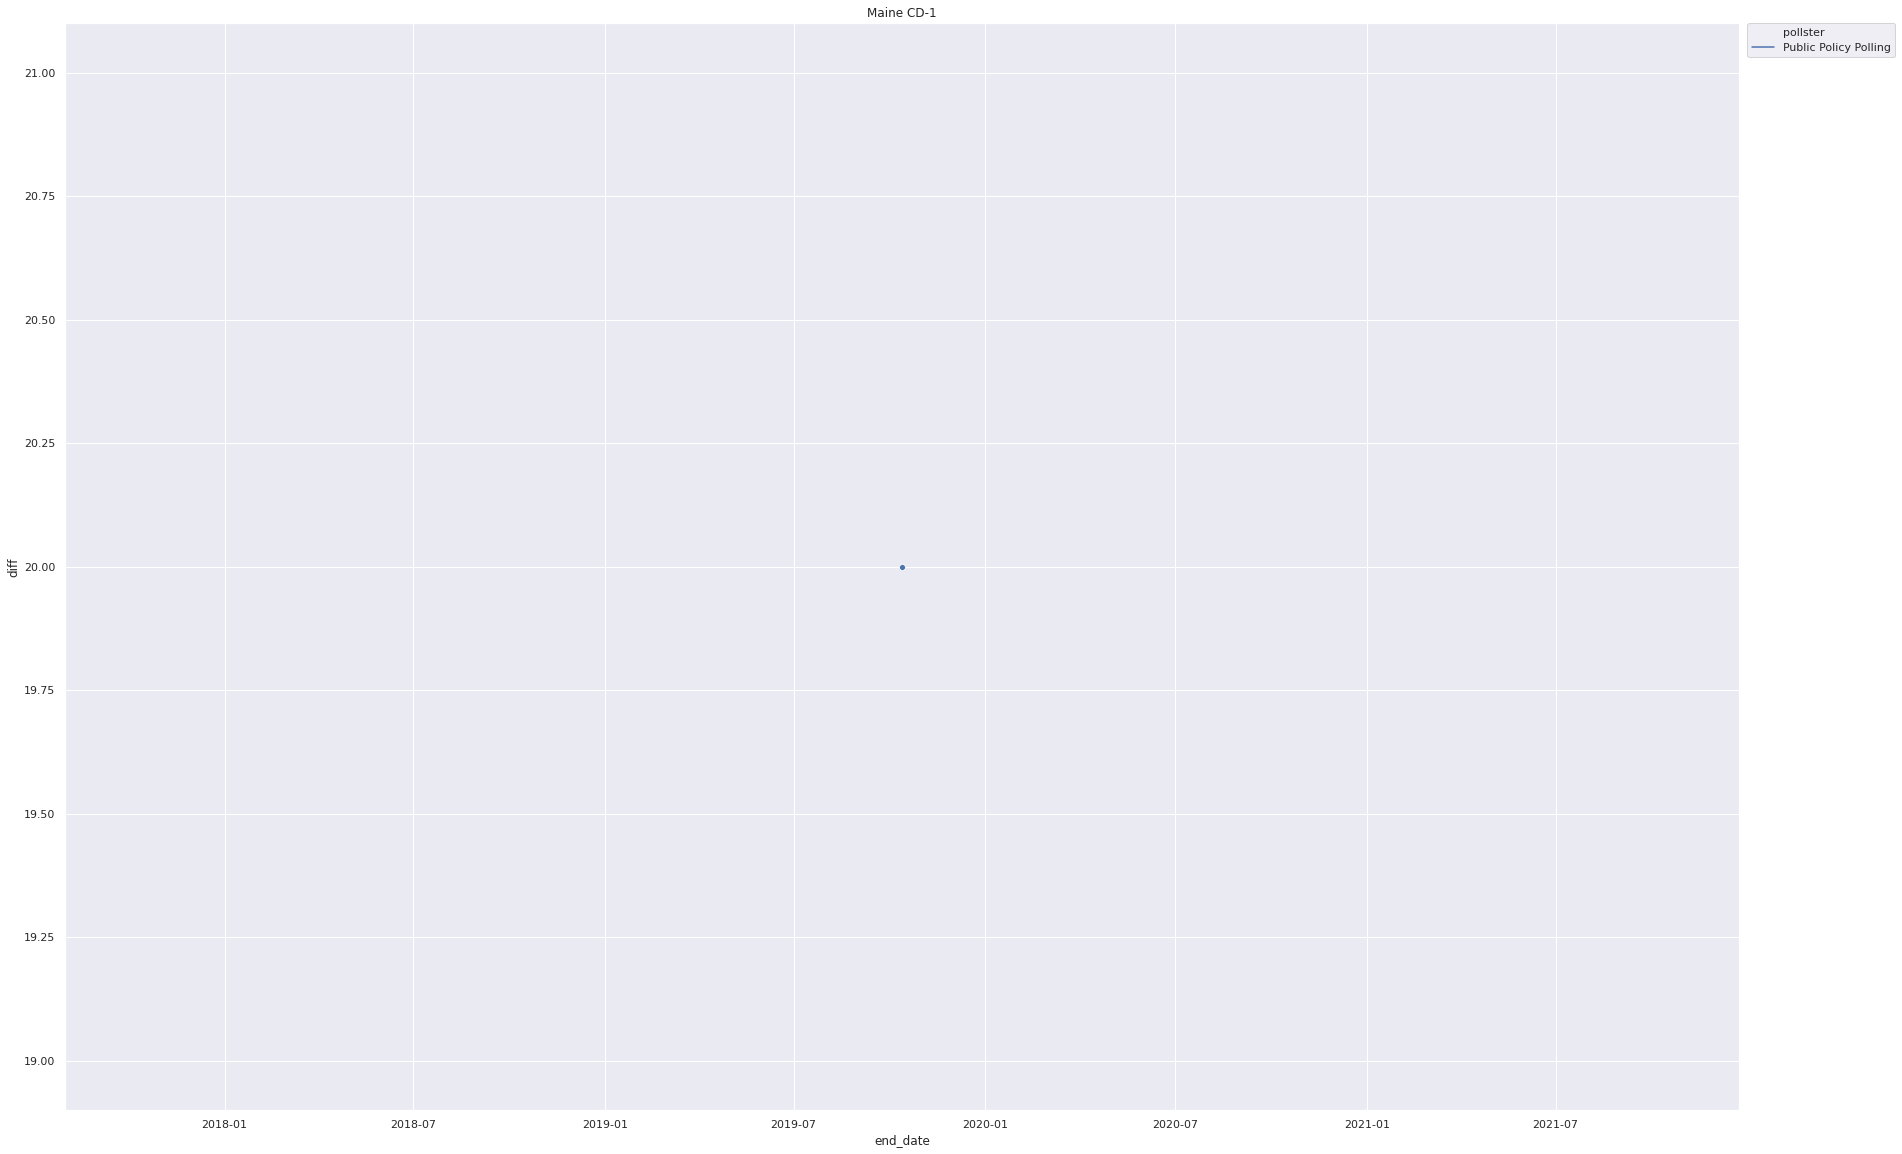

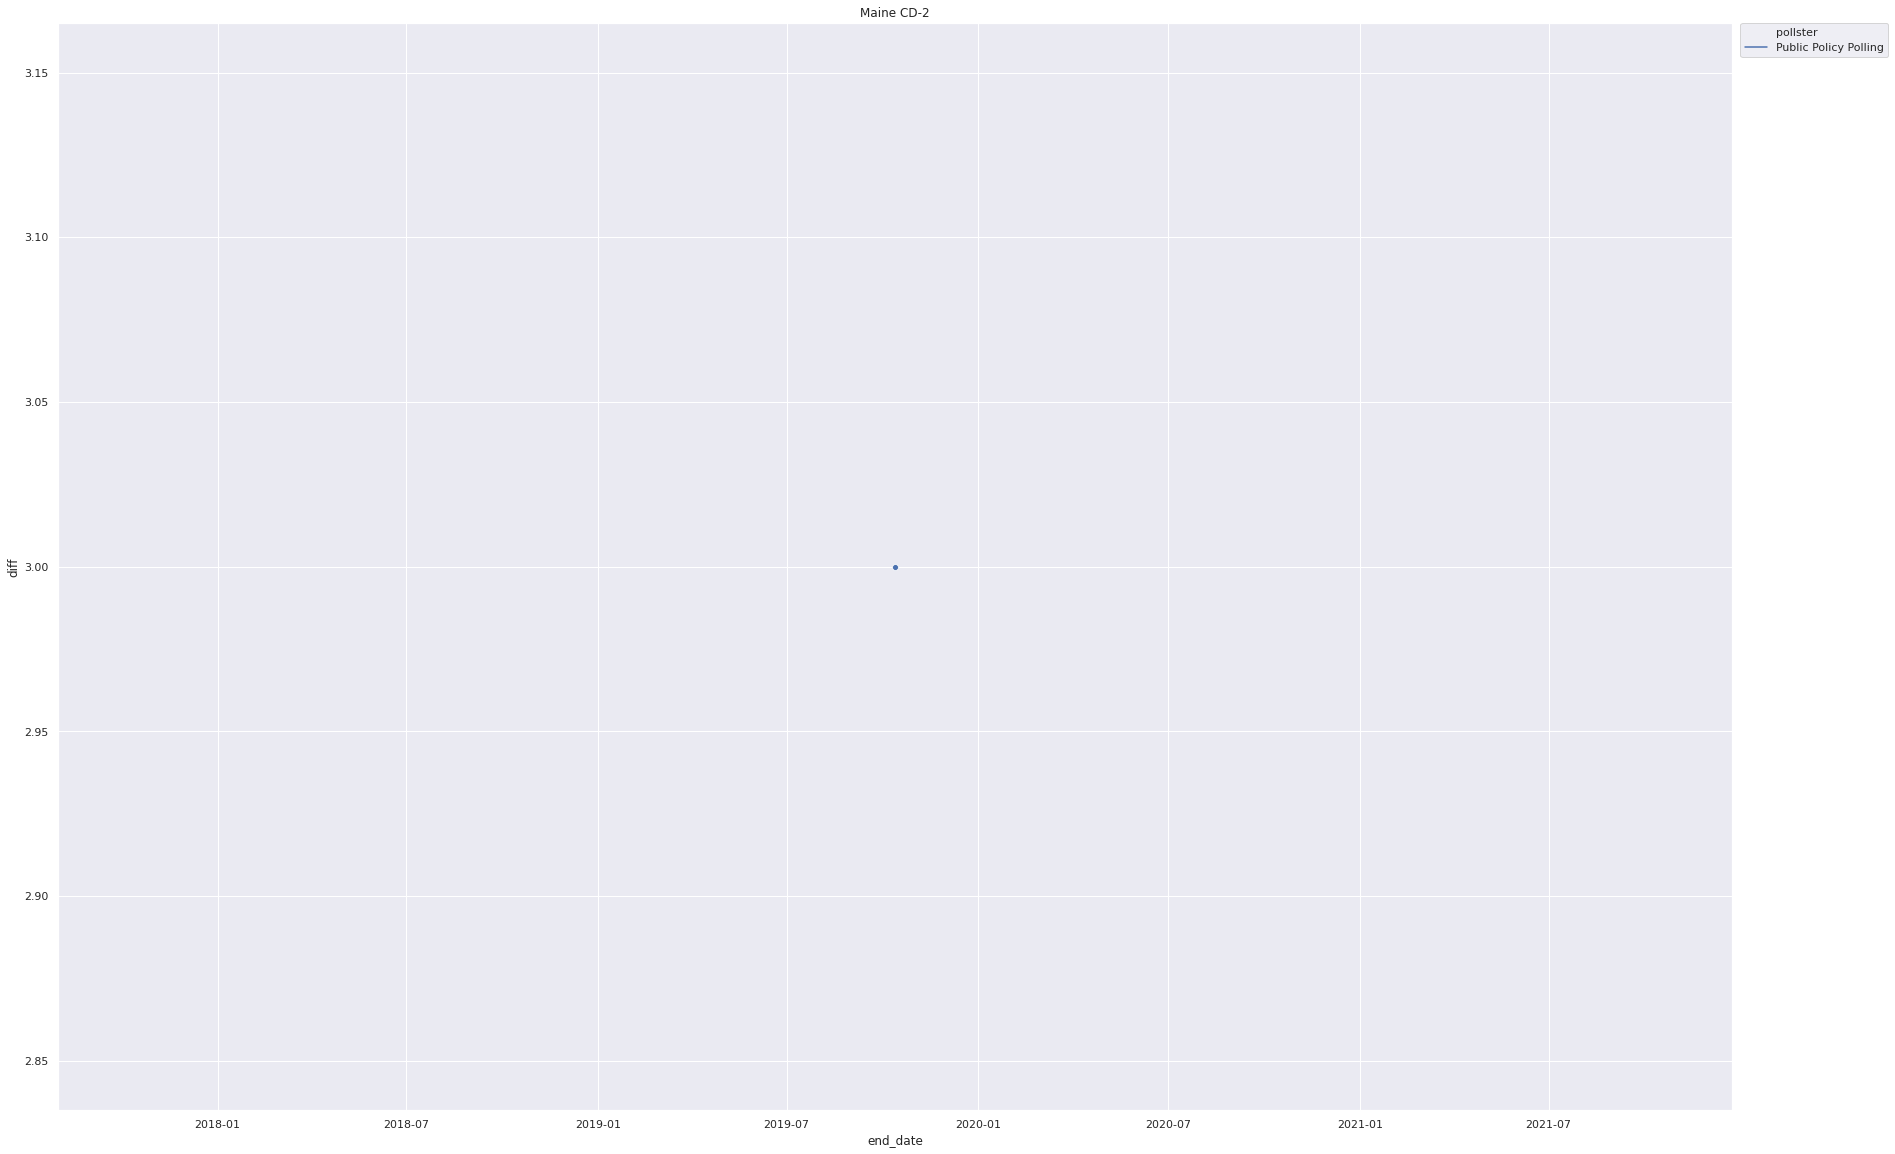

In [59]:
for i, state in enumerate(states):
    polls = statepolls[statepolls['state'] == state]
    plt.figure(i, figsize=(30,20))
    plot = sns.lineplot(x='end_date', y='diff', hue='pollster', marker='o', data=polls).set_title(state)
    plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
    fig = plot.get_figure()
    fig.savefig(f'src/images/states/{state.replace(" ","_").lower()}.png')